In [1]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

In [58]:
a1=np.load("./data/npy_10000/one/generated_5_0_844579_part_1.npy")
a2=np.load("./data/npy_10000/one/generated_5_0_844579_part_2.npy")
a3=np.load("./data/npy_10000/one/generated_5_0_844579_part_3.npy")
a4=np.load("./data/npy_10000/one/generated_5_0_844579_part_4.npy")
a5=np.load("./data/npy_10000/one/generated_5_0_844579_part_5.npy")

In [3]:
a=np.concatenate((a1,a2,a3,a4,a5),axis=0)

In [4]:
x=a[:,0]
y=a[:,1]
z=a[:,2]

In [ ]:
fig2=plt.figure()
ax=fig2.add_subplot(111,projection='3d')
ax.scatter(x,y,z,c='r',marker='o')
plt.show

In [ ]:
def smooth(y,box_pts):
    box=np.ones(box_pts)/box_pts
    y_smooth=np.convolve(y,box,mode='same')
    return y_smooth

In [ ]:
def plot_slice(x, y, z, slice_angle=0):
    print(x.shape, y.shape, z.shape)
    
    if not slice_angle == 0:
        # rotate with the given angle
        _rad = np.deg2rad(slice_angle)
        R = np.array([[np.cos(_rad),0,np.sin(_rad)],[0,1,0],[-np.sin(_rad),0,np.cos(_rad)]])
        # rotation!!
        _rotated = np.array([np.dot(R, d) for d in np.c_[x,y,z]])
        x, y, z = _rotated.transpose()
        
    x = x[z<0.5]
    y = y[z<0.5]
    z = z[z<0.5]
    x = x[z>-0.5]
    y = y[z>-0.5]
    z = z[z>-0.5]
    
    print(x.shape, y.shape, z.shape)
#     p3.figure()
#     p3.scatter(x, y, z, marker='sphere', size=0.2)
#     p3.squarelim()
#     p3.show()
    import pylab as p2
    p2.scatter(x,y, marker='.')
    p2.axis('equal')
    p2.show()
    
plot_slice(x,z,y, slice_angle=45)

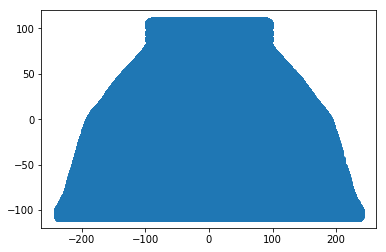

In [5]:
plt.scatter(x,y)

In [16]:
len(a1[:,1])

1090

In [28]:
a_seg=np.zeros((len(a1[:,1]),4), dtype=np.uint8)
temp_seg=[]

In [39]:
for i in range(len(a1[:,1])):
    seg=[0,0,0,0]
    print(a1[i,1])
    if a1[i,1] >= 80:
        seg[0] = 1
    else: 
        seg[0] = 0
    if a1[i,1] >= 7:
        seg[1] = 1
    else: 
        seg[1] = 0
    if a1[i,1] >= -87:
        seg[2] = 1
    else: 
        seg[2] = 0
    if a1[i,1] <-87:
        seg[3] = 1
    else: 
        seg[3] = 0
    temp_seg.append(seg)

-104.41438833333332
-100.07259099999999
-100.07259099999999
-104.19938166666667
-105.45621733333333
-104.19938166666667
-102.37972033333334
-106.25569666666667
-99.22932933333334
-101.644857
-102.00732433333333
-102.85270199999998
-101.644857
-105.65804033333332
-105.65852866666667
-98.40104166666667
-97.190511
-97.85717766666666
-101.644857
-102.00732433333333
-107.981771
-106.33072933333334
-106.25569666666667
-103.761556
-102.85270200000001
-106.528646
-106.528646
-102.37972033333334
-100.07259099999999
-99.63281266666667
-104.386556
-103.53873700000001
-103.761556
-100.197917
-106.05826833333333
-103.761556
-105.45598487030661
-97.31331366666666
-97.85717766666666
-96.64664699999999
-104.83756533333333
-106.80208366666666
-106.83723966666666
-102.85270199999998
-106.83723966666666
-102.85270199999998
-103.761556
-107.760417
-103.08431
-107.22135433333334
-101.392741
-107.981771
-107.760417
-106.33072933333334
-96.64664699999999
-97.31331366666666
-97.85717766666666
-98.344075666666

In [60]:
temp_seg=[0,0,0,0]
for i in range(len(a5[:,1])):
    seg=[0,0,0,0]
    if a5[i,1] >= 80:
        seg[0] = 1
    elif a5[i,1] >= 7:
        seg[1] = 1
    elif a5[i,1] >= -87:
        seg[2] = 1
    elif a5[i,1] < -87:
        seg[3] = 1
    print(a5[i,1], seg)
    for j in range(len(seg)):
        if seg[j] > temp_seg[j]:
            temp_seg[j]=seg[j]
        else:
            temp_seg[j]=temp_seg[j]
print(temp_seg)

84.403646 [1, 0, 0, 0]
6.822265666666667 [0, 0, 1, 0]
49.273437333333334 [0, 1, 0, 0]
24.875 [0, 1, 0, 0]
79.98107900000001 [0, 1, 0, 0]
-101.947917 [0, 0, 0, 1]
49.720703333333326 [0, 1, 0, 0]
60.53881833333333 [0, 1, 0, 0]
-84.891927 [0, 0, 1, 0]
97.25244133333335 [1, 0, 0, 0]
11.152344 [0, 1, 0, 0]
53.356119666666665 [0, 1, 0, 0]
78.24479166666667 [0, 1, 0, 0]
49.00651033333333 [0, 1, 0, 0]
108.34423833333334 [1, 0, 0, 0]
108.73193366666668 [1, 0, 0, 0]
50.43554700000001 [0, 1, 0, 0]
48.65885433333333 [0, 1, 0, 0]
6.822265666666667 [0, 0, 1, 0]
49.720703333333326 [0, 1, 0, 0]
54.78613266666667 [0, 1, 0, 0]
57.899658666666674 [0, 1, 0, 0]
55.24414033333333 [0, 1, 0, 0]
55.24414033333333 [0, 1, 0, 0]
59.49401833333334 [0, 1, 0, 0]
59.49401833333334 [0, 1, 0, 0]
51.18945299999999 [0, 1, 0, 0]
87.95833366666666 [1, 0, 0, 0]
49.51269533333333 [0, 1, 0, 0]
49.19807933333334 [0, 1, 0, 0]
96.86588533333334 [1, 0, 0, 0]
108.37109366666668 [1, 0, 0, 0]
107.89835599999999 [1, 0, 0, 0]
97.51293

105.76993833333334 [1, 0, 0, 0]
80.12902833333334 [1, 0, 0, 0]
98.64973933333333 [1, 0, 0, 0]
108.61572233333334 [1, 0, 0, 0]
101.18375633333333 [1, 0, 0, 0]
108.602051 [1, 0, 0, 0]
95.21240233333333 [1, 0, 0, 0]
98.18424466666666 [1, 0, 0, 0]
40.820312666666666 [0, 1, 0, 0]
102.022868 [1, 0, 0, 0]
98.64973933333333 [1, 0, 0, 0]
96.49414066666667 [1, 0, 0, 0]
16.852864333333333 [0, 1, 0, 0]
107.14160133333333 [1, 0, 0, 0]
24.484375 [0, 1, 0, 0]
95.95898433333333 [1, 0, 0, 0]
108.64941366666666 [1, 0, 0, 0]
47.189778666666676 [0, 1, 0, 0]
106.81168600000001 [1, 0, 0, 0]
28.346028333333333 [0, 1, 0, 0]
23.25 [0, 1, 0, 0]
103.08691433333333 [1, 0, 0, 0]
102.67626966666667 [1, 0, 0, 0]
108.55175799999999 [1, 0, 0, 0]
102.67626966666667 [1, 0, 0, 0]
95.95898433333333 [1, 0, 0, 0]
-54.873698 [0, 0, 1, 0]
96.49414066666667 [1, 0, 0, 0]
107.79199200000001 [1, 0, 0, 0]
108.70019500000001 [1, 0, 0, 0]
84.403646 [1, 0, 0, 0]
107.531087 [1, 0, 0, 0]
73.28645833333333 [0, 1, 0, 0]
96.86588533333334

106.45955400000001 [1, 0, 0, 0]
89.11197933333334 [1, 0, 0, 0]
87.95833366666666 [1, 0, 0, 0]
107.531087 [1, 0, 0, 0]
102.022868 [1, 0, 0, 0]
88.15917966666666 [1, 0, 0, 0]
108.64941366666666 [1, 0, 0, 0]
79.98107900000001 [0, 1, 0, 0]
104.77164733333332 [1, 0, 0, 0]
106.81168600000001 [1, 0, 0, 0]
97.81005866666665 [1, 0, 0, 0]
104.88427766666666 [1, 0, 0, 0]
108.73193366666668 [1, 0, 0, 0]
104.77164733333332 [1, 0, 0, 0]
106.51806633333332 [1, 0, 0, 0]
46.25553366666667 [0, 1, 0, 0]
107.14160133333333 [1, 0, 0, 0]
96.30273433333333 [1, 0, 0, 0]
78.27636700000001 [0, 1, 0, 0]
84.403646 [1, 0, 0, 0]
108.717285 [1, 0, 0, 0]
46.849446666666665 [0, 1, 0, 0]
108.37109366666668 [1, 0, 0, 0]
107.89835599999999 [1, 0, 0, 0]
96.95459 [1, 0, 0, 0]
100.13216133333333 [1, 0, 0, 0]
78.78027333333334 [0, 1, 0, 0]
102.89957699999998 [1, 0, 0, 0]
79.901428 [0, 1, 0, 0]
106.45955400000001 [1, 0, 0, 0]
97.25244133333335 [1, 0, 0, 0]
97.51293966666667 [1, 0, 0, 0]
46.849446666666665 [0, 1, 0, 0]
84.4036

104.88427766666666 [1, 0, 0, 0]
25.538411666666665 [0, 1, 0, 0]
9.416015666666667 [0, 1, 0, 0]
21.921875 [0, 1, 0, 0]
32.831380333333335 [0, 1, 0, 0]
106.51806633333332 [1, 0, 0, 0]
-39.99088533333333 [0, 0, 1, 0]
103.85644566666667 [1, 0, 0, 0]
28.346028333333333 [0, 1, 0, 0]
29.217448 [0, 1, 0, 0]
26.875651 [0, 1, 0, 0]
103.50569666666667 [1, 0, 0, 0]
33.69783533333333 [0, 1, 0, 0]
34.97257466666667 [0, 1, 0, 0]
23.25 [0, 1, 0, 0]
73.09814466666667 [0, 1, 0, 0]
1.7492676666666667 [0, 0, 1, 0]
21.921875 [0, 1, 0, 0]
38.37028 [0, 1, 0, 0]
33.69783533333333 [0, 1, 0, 0]
30.695963666666668 [0, 1, 0, 0]
10.530680333333335 [0, 1, 0, 0]
16.852864333333333 [0, 1, 0, 0]
29.052083 [0, 1, 0, 0]
13.875 [0, 1, 0, 0]
34.00504566666666 [0, 1, 0, 0]
20.5 [0, 1, 0, 0]
105.76855499999999 [1, 0, 0, 0]
105.19433633333334 [1, 0, 0, 0]
31.20442733333333 [0, 1, 0, 0]
27.754557333333334 [0, 1, 0, 0]
29.702474 [0, 1, 0, 0]
44.49601233333334 [0, 1, 0, 0]
70.03808633333334 [0, 1, 0, 0]
43.486897666666664 [0, 1

49.57226566666666 [0, 1, 0, 0]
55.24414033333333 [0, 1, 0, 0]
49.57226566666666 [0, 1, 0, 0]
49.32617200000001 [0, 1, 0, 0]
59.49401833333334 [0, 1, 0, 0]
49.57226566666666 [0, 1, 0, 0]
57.60217333333333 [0, 1, 0, 0]
50.02246133333333 [0, 1, 0, 0]
60.90222166666666 [0, 1, 0, 0]
50.977539 [0, 1, 0, 0]
57.899658666666674 [0, 1, 0, 0]
50.02246133333333 [0, 1, 0, 0]
55.24414033333333 [0, 1, 0, 0]
54.78613266666667 [0, 1, 0, 0]
49.41699233333333 [0, 1, 0, 0]
49.57226566666666 [0, 1, 0, 0]
49.57226566666666 [0, 1, 0, 0]
58.83459466666667 [0, 1, 0, 0]
51.66601533333333 [0, 1, 0, 0]
49.809570666666666 [0, 1, 0, 0]
50.02246133333333 [0, 1, 0, 0]
49.41699233333333 [0, 1, 0, 0]
53.55273433333334 [0, 1, 0, 0]
51.18945299999999 [0, 1, 0, 0]
59.83471666666666 [0, 1, 0, 0]
52.841796666666674 [0, 1, 0, 0]
53.94042966666667 [0, 1, 0, 0]
53.94042966666667 [0, 1, 0, 0]
50.02246133333333 [0, 1, 0, 0]
52.841796666666674 [0, 1, 0, 0]
50.600586 [0, 1, 0, 0]
56.770508 [0, 1, 0, 0]
53.55273433333334 [0, 1, 0, 

46.25553366666667 [0, 1, 0, 0]
77.42822266666667 [0, 1, 0, 0]
80.19732666666667 [1, 0, 0, 0]
71.82519566666666 [0, 1, 0, 0]
45.12500033333333 [0, 1, 0, 0]
73.28645833333333 [0, 1, 0, 0]
47.18977866666666 [0, 1, 0, 0]
47.189778666666676 [0, 1, 0, 0]
97.29231766666668 [1, 0, 0, 0]
79.01318366666668 [0, 1, 0, 0]
47.299967333333335 [0, 1, 0, 0]
78.78027333333334 [0, 1, 0, 0]
46.96451833333333 [0, 1, 0, 0]
78.27636700000001 [0, 1, 0, 0]
40.59375033333333 [0, 1, 0, 0]
41.46875033333333 [0, 1, 0, 0]
43.59375033333333 [0, 1, 0, 0]
40.820312666666666 [0, 1, 0, 0]
42.62500033333333 [0, 1, 0, 0]
25.99056033333333 [0, 1, 0, 0]
41.87500033333333 [0, 1, 0, 0]
47.91813166666666 [0, 1, 0, 0]
41.46875033333333 [0, 1, 0, 0]
58.448812 [0, 1, 0, 0]
108.04589833333334 [1, 0, 0, 0]
44.695312666666666 [0, 1, 0, 0]
79.43798833333334 [0, 1, 0, 0]
27.476236999999998 [0, 1, 0, 0]
47.18977866666666 [0, 1, 0, 0]
45.763997666666675 [0, 1, 0, 0]
76.477539 [0, 1, 0, 0]
79.43798833333334 [0, 1, 0, 0]
46.13362633333333

-2.5118003333333334 [0, 0, 1, 0]
-20.885498 [0, 0, 1, 0]
-18.363281 [0, 0, 1, 0]
-26.545166 [0, 0, 1, 0]
34.97257466666667 [0, 1, 0, 0]
-18.363281 [0, 0, 1, 0]
-5.258952000000001 [0, 0, 1, 0]
42.186361 [0, 1, 0, 0]
-26.545166 [0, 0, 1, 0]
-30.371337666666665 [0, 0, 1, 0]
-8.857747666666667 [0, 0, 1, 0]
-9.410807333333333 [0, 0, 1, 0]
-2.5118003333333334 [0, 0, 1, 0]
-21.372396 [0, 0, 1, 0]
0.8503416666666667 [0, 0, 1, 0]
-4.106852333333333 [0, 0, 1, 0]
-24.744629 [0, 0, 1, 0]
-27.27807633333333 [0, 0, 1, 0]
-26.545166 [0, 0, 1, 0]
-19.361328 [0, 0, 1, 0]
-8.086751 [0, 0, 1, 0]
-25.934082 [0, 0, 1, 0]
-23.692708333333332 [0, 0, 1, 0]
75.43310533333333 [0, 1, 0, 0]
-86.80664066666667 [0, 0, 1, 0]
-43.17919933333334 [0, 0, 1, 0]
-64.38964866666667 [0, 0, 1, 0]
-64.16031933333333 [0, 0, 1, 0]
-64.931478 [0, 0, 1, 0]
-23.037841999999998 [0, 0, 1, 0]
60.75789366666667 [0, 1, 0, 0]
-21.372396 [0, 0, 1, 0]
-50.00260433333333 [0, 0, 1, 0]
-20.885498 [0, 0, 1, 0]
-16.325520666666666 [0, 0, 1, 0]

48.79036466666667 [0, 1, 0, 0]
39.109375 [0, 1, 0, 0]
96.85437033333334 [1, 0, 0, 0]
48.79036466666667 [0, 1, 0, 0]
38.578125 [0, 1, 0, 0]
96.85437033333334 [1, 0, 0, 0]
64.83732083333332 [0, 1, 0, 0]
60.22191005399396 [0, 1, 0, 0]
49.2092285 [0, 1, 0, 0]
66.87956086493294 [0, 1, 0, 0]
49.231526833333334 [0, 1, 0, 0]
48.356771 [0, 1, 0, 0]
107.79199200000001 [1, 0, 0, 0]
104.88427766666666 [1, 0, 0, 0]
11.646565666666667 [0, 1, 0, 0]
103.85644566666667 [1, 0, 0, 0]
9.883219333333335 [0, 1, 0, 0]
26.503255333333332 [0, 1, 0, 0]
17.375 [0, 1, 0, 0]
38.37028 [0, 1, 0, 0]
108.70214866666667 [1, 0, 0, 0]
100.13216133333333 [1, 0, 0, 0]
30.695963666666668 [0, 1, 0, 0]
25.930989666666665 [0, 1, 0, 0]
17.375 [0, 1, 0, 0]
20.186849 [0, 1, 0, 0]
25.40201833333333 [0, 1, 0, 0]
36.567464333333334 [0, 1, 0, 0]
-7.724284333333334 [0, 0, 1, 0]
102.67626966666667 [1, 0, 0, 0]
29.217448 [0, 1, 0, 0]
104.21533233333332 [1, 0, 0, 0]
106.54834 [1, 0, 0, 0]
108.70214866666667 [1, 0, 0, 0]
23.671875 [0, 1, 

85.604167 [1, 0, 0, 0]
97.42236333333334 [1, 0, 0, 0]
97.51293966666667 [1, 0, 0, 0]
89.11197933333334 [1, 0, 0, 0]
97.81005866666665 [1, 0, 0, 0]
97.51293966666667 [1, 0, 0, 0]
95.59895833333333 [1, 0, 0, 0]
98.14819333333332 [1, 0, 0, 0]
98.03076166666666 [1, 0, 0, 0]
97.17309566666667 [1, 0, 0, 0]
97.70678733333334 [1, 0, 0, 0]
98.03076166666666 [1, 0, 0, 0]
92.93229166666667 [1, 0, 0, 0]
97.51293966666667 [1, 0, 0, 0]
97.42236333333334 [1, 0, 0, 0]
96.95459 [1, 0, 0, 0]
98.03076166666666 [1, 0, 0, 0]
89.11197933333334 [1, 0, 0, 0]
95.59895833333333 [1, 0, 0, 0]
98.14819333333332 [1, 0, 0, 0]
92.93229166666667 [1, 0, 0, 0]
85.604167 [1, 0, 0, 0]
95.59895833333333 [1, 0, 0, 0]
98.14819333333332 [1, 0, 0, 0]
97.02416999999998 [1, 0, 0, 0]
97.81005866666665 [1, 0, 0, 0]
97.42236333333334 [1, 0, 0, 0]
97.42236333333334 [1, 0, 0, 0]
85.604167 [1, 0, 0, 0]
98.14819333333332 [1, 0, 0, 0]
95.59895833333333 [1, 0, 0, 0]
85.604167 [1, 0, 0, 0]
98.14819333333332 [1, 0, 0, 0]
95.59895833333333 

49.22037766666667 [0, 1, 0, 0]
49.28124966666667 [0, 1, 0, 0]
96.30273433333333 [1, 0, 0, 0]
62.41927066666667 [0, 1, 0, 0]
60.90222166666666 [0, 1, 0, 0]
49.273437333333334 [0, 1, 0, 0]
57.60217333333333 [0, 1, 0, 0]
49.25797533333334 [0, 1, 0, 0]
49.25032566666667 [0, 1, 0, 0]
63.57291633333333 [0, 1, 0, 0]
59.49401833333334 [0, 1, 0, 0]
63.57291633333333 [0, 1, 0, 0]
60.53881833333333 [0, 1, 0, 0]
49.32617200000001 [0, 1, 0, 0]
63.57291633333333 [0, 1, 0, 0]
63.57291633333333 [0, 1, 0, 0]
62.41927066666667 [0, 1, 0, 0]
62.41927066666667 [0, 1, 0, 0]
49.28124966666667 [0, 1, 0, 0]
56.770508 [0, 1, 0, 0]
50.02246133333333 [0, 1, 0, 0]
49.307617 [0, 1, 0, 0]
49.32617200000001 [0, 1, 0, 0]
49.28124966666667 [0, 1, 0, 0]
53.55273433333334 [0, 1, 0, 0]
59.49401833333334 [0, 1, 0, 0]
60.90222166666666 [0, 1, 0, 0]
58.83459466666667 [0, 1, 0, 0]
50.14648466666667 [0, 1, 0, 0]
58.515869333333335 [0, 1, 0, 0]
49.307617 [0, 1, 0, 0]
58.515869333333335 [0, 1, 0, 0]
58.83459466666667 [0, 1, 0, 0

49.307617 [0, 1, 0, 0]
49.25032566666667 [0, 1, 0, 0]
62.41927066666667 [0, 1, 0, 0]
49.32617200000001 [0, 1, 0, 0]
58.515869333333335 [0, 1, 0, 0]
63.57291633333333 [0, 1, 0, 0]
62.41927066666667 [0, 1, 0, 0]
49.307617 [0, 1, 0, 0]
60.90222166666666 [0, 1, 0, 0]
60.53881833333333 [0, 1, 0, 0]
49.32617200000001 [0, 1, 0, 0]
49.41699233333333 [0, 1, 0, 0]
49.28124966666667 [0, 1, 0, 0]
49.09114566666667 [0, 1, 0, 0]
49.273437333333334 [0, 1, 0, 0]
49.22037766666667 [0, 1, 0, 0]
49.25032566666667 [0, 1, 0, 0]
67.127604 [0, 1, 0, 0]
67.127604 [0, 1, 0, 0]
49.19807933333334 [0, 1, 0, 0]
49.25032566666667 [0, 1, 0, 0]
49.25797533333334 [0, 1, 0, 0]
49.25032566666667 [0, 1, 0, 0]
49.273437333333334 [0, 1, 0, 0]
49.09114566666667 [0, 1, 0, 0]
49.09114566666667 [0, 1, 0, 0]
96.04296866666668 [1, 0, 0, 0]
65.927083 [0, 1, 0, 0]
49.22037766666667 [0, 1, 0, 0]
49.19807933333334 [0, 1, 0, 0]
65.927083 [0, 1, 0, 0]
49.22037766666667 [0, 1, 0, 0]
49.19807933333334 [0, 1, 0, 0]
49.00651033333333 [0, 

58.183492 [0, 1, 0, 0]
102.603109 [1, 0, 0, 0]
48.186198 [0, 1, 0, 0]
76.13915999999999 [0, 1, 0, 0]
97.02416999999998 [1, 0, 0, 0]
95.69140599999999 [1, 0, 0, 0]
60.90222166666666 [0, 1, 0, 0]
49.38085966666667 [0, 1, 0, 0]
47.91813166666666 [0, 1, 0, 0]
47.820638333333335 [0, 1, 0, 0]
48.65885433333333 [0, 1, 0, 0]
95.376953 [1, 0, 0, 0]
49.273437333333334 [0, 1, 0, 0]
95.783203 [1, 0, 0, 0]
96.04296866666668 [1, 0, 0, 0]
49.00651033333333 [0, 1, 0, 0]
49.00651033333333 [0, 1, 0, 0]
49.19807933333334 [0, 1, 0, 0]
64.57291666666667 [0, 1, 0, 0]
49.00651033333333 [0, 1, 0, 0]
49.09114566666667 [0, 1, 0, 0]
49.19807933333334 [0, 1, 0, 0]
67.127604 [0, 1, 0, 0]
64.657552 [0, 1, 0, 0]
49.09114566666667 [0, 1, 0, 0]
49.307617 [0, 1, 0, 0]
48.356771 [0, 1, 0, 0]
95.656901 [1, 0, 0, 0]
79.686198 [0, 1, 0, 0]
64.106771 [0, 1, 0, 0]
48.65885433333333 [0, 1, 0, 0]
80.19732666666667 [1, 0, 0, 0]
64.106771 [0, 1, 0, 0]
48.65885433333333 [0, 1, 0, 0]
48.186198 [0, 1, 0, 0]
47.91813166666666 [0, 1,

57.137532666666665 [0, 1, 0, 0]
63.26171866666667 [0, 1, 0, 0]
41.87500033333333 [0, 1, 0, 0]
57.584391333333336 [0, 1, 0, 0]
41.15055366666667 [0, 1, 0, 0]
57.584391333333336 [0, 1, 0, 0]
40.12500033333333 [0, 1, 0, 0]
39.109375 [0, 1, 0, 0]
37.453125 [0, 1, 0, 0]
61.98575833333334 [0, 1, 0, 0]
40.820312666666666 [0, 1, 0, 0]
36.859375 [0, 1, 0, 0]
40.12500033333333 [0, 1, 0, 0]
63.26171866666667 [0, 1, 0, 0]
61.70589166666667 [0, 1, 0, 0]
40.12500033333333 [0, 1, 0, 0]
61.70589166666667 [0, 1, 0, 0]
48.64436866666667 [0, 1, 0, 0]
41.87500033333333 [0, 1, 0, 0]
66.69677733333334 [0, 1, 0, 0]
60.90222166666666 [0, 1, 0, 0]
43.132812666666666 [0, 1, 0, 0]
27.476236999999998 [0, 1, 0, 0]
57.137532666666665 [0, 1, 0, 0]
37.453125 [0, 1, 0, 0]
71.38720733333334 [0, 1, 0, 0]
44.96875033333333 [0, 1, 0, 0]
42.445312666666666 [0, 1, 0, 0]
71.82519566666666 [0, 1, 0, 0]
42.96875033333333 [0, 1, 0, 0]
70.49365266666668 [0, 1, 0, 0]
40.820312666666666 [0, 1, 0, 0]
41.87500033333333 [0, 1, 0, 0]


63.57291633333333 [0, 1, 0, 0]
60.90222166666666 [0, 1, 0, 0]
49.25797533333334 [0, 1, 0, 0]
60.53881833333333 [0, 1, 0, 0]
49.25797533333334 [0, 1, 0, 0]
63.57291633333333 [0, 1, 0, 0]
49.22037766666667 [0, 1, 0, 0]
60.90222166666666 [0, 1, 0, 0]
60.53881833333333 [0, 1, 0, 0]
62.41927066666667 [0, 1, 0, 0]
65.927083 [0, 1, 0, 0]
49.32617200000001 [0, 1, 0, 0]
49.22037766666667 [0, 1, 0, 0]
73.28645833333333 [0, 1, 0, 0]
65.927083 [0, 1, 0, 0]
65.927083 [0, 1, 0, 0]
49.28124966666667 [0, 1, 0, 0]
62.41927066666667 [0, 1, 0, 0]
49.25032566666667 [0, 1, 0, 0]
70.80729166666667 [0, 1, 0, 0]
49.25797533333334 [0, 1, 0, 0]
49.28124966666667 [0, 1, 0, 0]
49.273437333333334 [0, 1, 0, 0]
49.25032566666667 [0, 1, 0, 0]
70.80729166666667 [0, 1, 0, 0]
63.57291633333333 [0, 1, 0, 0]
62.41927066666667 [0, 1, 0, 0]
65.927083 [0, 1, 0, 0]
65.927083 [0, 1, 0, 0]
49.307617 [0, 1, 0, 0]
49.28124966666667 [0, 1, 0, 0]
49.25032566666667 [0, 1, 0, 0]
49.25797533333334 [0, 1, 0, 0]
49.28124966666667 [0, 1,

96.30273433333333 [1, 0, 0, 0]
70.80729166666667 [0, 1, 0, 0]
64.82617166666667 [0, 1, 0, 0]
70.80729166666667 [0, 1, 0, 0]
96.30273433333333 [1, 0, 0, 0]
73.28645833333333 [0, 1, 0, 0]
70.80729166666667 [0, 1, 0, 0]
73.28645833333333 [0, 1, 0, 0]
80.22395833333333 [1, 0, 0, 0]
49.09114566666667 [0, 1, 0, 0]
96.04296866666668 [1, 0, 0, 0]
95.95898433333333 [1, 0, 0, 0]
96.04296866666668 [1, 0, 0, 0]
95.95898433333333 [1, 0, 0, 0]
96.04296866666668 [1, 0, 0, 0]
80.22395833333333 [1, 0, 0, 0]
96.04296866666668 [1, 0, 0, 0]
95.95898433333333 [1, 0, 0, 0]
97.81005866666668 [1, 0, 0, 0]
96.95459 [1, 0, 0, 0]
84.403646 [1, 0, 0, 0]
95.59895833333333 [1, 0, 0, 0]
98.14819333333332 [1, 0, 0, 0]
92.93229166666667 [1, 0, 0, 0]
104.88427766666666 [1, 0, 0, 0]
97.81005866666665 [1, 0, 0, 0]
73.28645833333333 [0, 1, 0, 0]
73.28645833333333 [0, 1, 0, 0]
96.82373066666666 [1, 0, 0, 0]
96.95459 [1, 0, 0, 0]
97.17309566666667 [1, 0, 0, 0]
97.42236333333334 [1, 0, 0, 0]
97.17309566666667 [1, 0, 0, 0]
97

102.89957699999998 [1, 0, 0, 0]
105.76993833333334 [1, 0, 0, 0]
107.89835599999999 [1, 0, 0, 0]
108.37109366666668 [1, 0, 0, 0]
95.48828099999999 [1, 0, 0, 0]
47.820638333333335 [0, 1, 0, 0]
48.65885433333333 [0, 1, 0, 0]
105.76993833333334 [1, 0, 0, 0]
102.022868 [1, 0, 0, 0]
95.69140599999999 [1, 0, 0, 0]
95.783203 [1, 0, 0, 0]
48.356771 [0, 1, 0, 0]
47.61881533333334 [0, 1, 0, 0]
95.783203 [1, 0, 0, 0]
96.04296866666668 [1, 0, 0, 0]
95.48828099999999 [1, 0, 0, 0]
48.79036466666667 [0, 1, 0, 0]
48.79036466666667 [0, 1, 0, 0]
95.376953 [1, 0, 0, 0]
48.186198 [0, 1, 0, 0]
97.29231766666668 [1, 0, 0, 0]
47.820638333333335 [0, 1, 0, 0]
98.18424466666666 [1, 0, 0, 0]
48.79036466666667 [0, 1, 0, 0]
48.65885433333333 [0, 1, 0, 0]
47.514485666666666 [0, 1, 0, 0]
80.12902833333334 [1, 0, 0, 0]
95.376953 [1, 0, 0, 0]
48.79036466666667 [0, 1, 0, 0]
47.91813166666666 [0, 1, 0, 0]
48.356771 [0, 1, 0, 0]
48.356771 [0, 1, 0, 0]
80.82584633333333 [1, 0, 0, 0]
95.95898433333333 [1, 0, 0, 0]
48.186198

-3.6401369999999997 [0, 0, 1, 0]
2.0872396666666666 [0, 0, 1, 0]
-3.6401369999999997 [0, 0, 1, 0]
3.3594563333333336 [0, 0, 1, 0]
1.2389323333333333 [0, 0, 1, 0]
11.152344 [0, 1, 0, 0]
12.230469 [0, 1, 0, 0]
12.748047 [0, 1, 0, 0]
13.875 [0, 1, 0, 0]
5.883382 [0, 0, 1, 0]
-1.0520023333333333 [0, 0, 1, 0]
-2.05835 [0, 0, 1, 0]
0.3881833333333333 [0, 0, 1, 0]
-2.05835 [0, 0, 1, 0]
-2.575684 [0, 0, 1, 0]
-7.724284333333333 [0, 0, 1, 0]
-1.694254666666667 [0, 0, 1, 0]
-5.344075666666666 [0, 0, 1, 0]
106.73925766666666 [1, 0, 0, 0]
-5.344075666666666 [0, 0, 1, 0]
12.748047 [0, 1, 0, 0]
3.0356446666666668 [0, 0, 1, 0]
2.1860353333333333 [0, 0, 1, 0]
11.646565666666667 [0, 1, 0, 0]
-2.05835 [0, 0, 1, 0]
12.230469 [0, 1, 0, 0]
12.595052 [0, 1, 0, 0]
-0.5629886666666666 [0, 0, 1, 0]
7.503906333333333 [0, 1, 0, 0]
-2.575684 [0, 0, 1, 0]
3.3594563333333336 [0, 0, 1, 0]
2.0872396666666666 [0, 0, 1, 0]
-1.2810873333333335 [0, 0, 1, 0]
-5.344075666666666 [0, 0, 1, 0]
-1.694254666666667 [0, 0, 1, 0]


-51.97526033333333 [0, 0, 1, 0]
-49.087077 [0, 0, 1, 0]
-48.257487000000005 [0, 0, 1, 0]
-47.995931000000006 [0, 0, 1, 0]
-38.388672 [0, 0, 1, 0]
-50.00260433333333 [0, 0, 1, 0]
-56.931315000000005 [0, 0, 1, 0]
-45.362549 [0, 0, 1, 0]
31.057291666666668 [0, 1, 0, 0]
-26.545166 [0, 0, 1, 0]
-45.820800999999996 [0, 0, 1, 0]
-39.15364566666667 [0, 0, 1, 0]
-43.17919933333334 [0, 0, 1, 0]
-46.764160333333336 [0, 0, 1, 0]
47.357015 [0, 1, 0, 0]
-45.820800999999996 [0, 0, 1, 0]
-44.468506 [0, 0, 1, 0]
-37.455729 [0, 0, 1, 0]
-42.761474666666665 [0, 0, 1, 0]
29.052083 [0, 1, 0, 0]
44.49601233333333 [0, 1, 0, 0]
48.64436866666667 [0, 1, 0, 0]
47.77653 [0, 1, 0, 0]
-44.468506 [0, 0, 1, 0]
-36.595052 [0, 0, 1, 0]
-44.032714999999996 [0, 0, 1, 0]
-26.545166 [0, 0, 1, 0]
-34.16259766666666 [0, 0, 1, 0]
-45.362549 [0, 0, 1, 0]
-45.820800999999996 [0, 0, 1, 0]
-43.17919933333334 [0, 0, 1, 0]
-40.746094 [0, 0, 1, 0]
28.121744666666668 [0, 1, 0, 0]
-37.455729 [0, 0, 1, 0]
-36.595052 [0, 0, 1, 0]
45.11

-97.145833 [0, 0, 0, 1]
49.09114566666667 [0, 1, 0, 0]
-94.70703099999999 [0, 0, 0, 1]
-87.30078133333332 [0, 0, 0, 1]
-80.29313133333333 [0, 0, 1, 0]
-80.78719066666666 [0, 0, 1, 0]
-80.78719066666666 [0, 0, 1, 0]
96.04296866666668 [1, 0, 0, 0]
-86.80664066666667 [0, 0, 1, 0]
49.307617 [0, 1, 0, 0]
-85.857422 [0, 0, 1, 0]
-80.29313133333333 [0, 0, 1, 0]
-84.542969 [0, 0, 1, 0]
-80.78719066666666 [0, 0, 1, 0]
-85.40234400000001 [0, 0, 1, 0]
-83.11588533333334 [0, 0, 1, 0]
-85.857422 [0, 0, 1, 0]
-83.08072933333334 [0, 0, 1, 0]
-93.66015599999999 [0, 0, 0, 1]
-87.30078133333332 [0, 0, 0, 1]
-85.750651 [0, 0, 1, 0]
-85.750651 [0, 0, 1, 0]
-82.19856766666668 [0, 0, 1, 0]
-82.19856766666668 [0, 0, 1, 0]
-88.83789066666667 [0, 0, 0, 1]
-83.08072933333334 [0, 0, 1, 0]
-80.29313133333333 [0, 0, 1, 0]
-87.30078133333332 [0, 0, 0, 1]
-80.78719066666666 [0, 0, 1, 0]
-78.74943 [0, 0, 1, 0]
-80.372396 [0, 0, 1, 0]
-84.891927 [0, 0, 1, 0]
-83.11588533333334 [0, 0, 1, 0]
-87.30078133333332 [0, 0, 0,

49.22037766666667 [0, 1, 0, 0]
50.02246133333333 [0, 1, 0, 0]
49.273437333333334 [0, 1, 0, 0]
49.25032566666667 [0, 1, 0, 0]
-76.71354166666667 [0, 0, 1, 0]
49.28124966666667 [0, 1, 0, 0]
62.41927066666667 [0, 1, 0, 0]
49.28124966666667 [0, 1, 0, 0]
63.57291633333333 [0, 1, 0, 0]
50.43554700000001 [0, 1, 0, 0]
53.55273433333334 [0, 1, 0, 0]
53.94042966666667 [0, 1, 0, 0]
49.41699233333333 [0, 1, 0, 0]
49.57226566666666 [0, 1, 0, 0]
49.57226566666666 [0, 1, 0, 0]
49.25797533333334 [0, 1, 0, 0]
60.53881833333333 [0, 1, 0, 0]
50.14648466666667 [0, 1, 0, 0]
57.60217333333333 [0, 1, 0, 0]
-64.16031933333333 [0, 0, 1, 0]
-71.528646 [0, 0, 1, 0]
58.83459466666667 [0, 1, 0, 0]
57.899658666666674 [0, 1, 0, 0]
-40.746094 [0, 0, 1, 0]
49.41699233333333 [0, 1, 0, 0]
63.57291633333333 [0, 1, 0, 0]
58.515869333333335 [0, 1, 0, 0]
-91.515625 [0, 0, 0, 1]
65.927083 [0, 1, 0, 0]
56.770508 [0, 1, 0, 0]
59.49401833333334 [0, 1, 0, 0]
49.307617 [0, 1, 0, 0]
-88.31640633333332 [0, 0, 0, 1]
-80.293131333333

-107.981771 [0, 0, 0, 1]
-101.644857 [0, 0, 0, 1]
-107.22135433333334 [0, 0, 0, 1]
-106.83723966666666 [0, 0, 0, 1]
-105.45621733333333 [0, 0, 0, 1]
-100.61295566666666 [0, 0, 0, 1]
-101.644857 [0, 0, 0, 1]
-107.981771 [0, 0, 0, 1]
-101.947917 [0, 0, 0, 1]
-106.33072933333334 [0, 0, 0, 1]
-99.79606100000001 [0, 0, 0, 1]
-100.07259099999999 [0, 0, 0, 1]
-104.41438833333332 [0, 0, 0, 1]
-98.93912766666666 [0, 0, 0, 1]
-104.41438833333332 [0, 0, 0, 1]
-106.05826833333333 [0, 0, 0, 1]
-98.93912766666666 [0, 0, 0, 1]
-105.65852866666667 [0, 0, 0, 1]
-104.83756533333333 [0, 0, 0, 1]
-102.85270199999998 [0, 0, 0, 1]
-104.90104166666667 [0, 0, 0, 1]
-105.04573566666666 [0, 0, 0, 1]
-106.05826833333333 [0, 0, 0, 1]
-99.10677066666666 [0, 0, 0, 1]
-107.22135433333334 [0, 0, 0, 1]
-103.53873700000001 [0, 0, 0, 1]
-103.53873700000001 [0, 0, 0, 1]
-106.33072933333334 [0, 0, 0, 1]
-103.08431 [0, 0, 0, 1]
-106.80208366666666 [0, 0, 0, 1]
-105.65852866666667 [0, 0, 0, 1]
-104.83756533333333 [0, 0, 0, 

11.353678333333335 [0, 1, 0, 0]
-0.5629886666666666 [0, 0, 1, 0]
11.152344 [0, 1, 0, 0]
7.525309333333333 [0, 1, 0, 0]
28.346028333333333 [0, 1, 0, 0]
1.2389323333333333 [0, 0, 1, 0]
2.0872396666666666 [0, 0, 1, 0]
5.048258333333333 [0, 0, 1, 0]
1.2389323333333333 [0, 0, 1, 0]
-1.0520023333333333 [0, 0, 1, 0]
6.298013999999999 [0, 0, 1, 0]
8.32723 [0, 1, 0, 0]
-1.0520023333333333 [0, 0, 1, 0]
5.883382 [0, 0, 1, 0]
3.783365666666667 [0, 0, 1, 0]
3.7833656666666666 [0, 0, 1, 0]
3.3594563333333336 [0, 0, 1, 0]
-2.575684 [0, 0, 1, 0]
10.530680333333335 [0, 1, 0, 0]
-1.0520023333333333 [0, 0, 1, 0]
12.595052 [0, 1, 0, 0]
8.800781333333333 [0, 1, 0, 0]
-4.1872560000000005 [0, 0, 1, 0]
1.7492676666666667 [0, 0, 1, 0]
3.3594563333333336 [0, 0, 1, 0]
-0.02889000000000001 [0, 0, 1, 0]
-3.6401369999999997 [0, 0, 1, 0]
-0.02889000000000001 [0, 0, 1, 0]
-2.575684 [0, 0, 1, 0]
-0.448405 [0, 0, 1, 0]
3.7833656666666666 [0, 0, 1, 0]
0.3881833333333334 [0, 0, 1, 0]
-0.5629886666666666 [0, 0, 1, 0]
4.62

-2.575684 [0, 0, 1, 0]
1.2389323333333333 [0, 0, 1, 0]
2.0872396666666666 [0, 0, 1, 0]
-0.5629886666666666 [0, 0, 1, 0]
5.883382 [0, 0, 1, 0]
26.796224 [0, 1, 0, 0]
-0.02889000000000001 [0, 0, 1, 0]
-2.575684 [0, 0, 1, 0]
-4.1872560000000005 [0, 0, 1, 0]
3.3594563333333336 [0, 0, 1, 0]
-3.6401369999999997 [0, 0, 1, 0]
-3.6401369999999997 [0, 0, 1, 0]
-0.02889000000000001 [0, 0, 1, 0]
-0.448405 [0, 0, 1, 0]
7.118977666666667 [0, 1, 0, 0]
23.25 [0, 1, 0, 0]
4.627766666666666 [0, 0, 1, 0]
3.7833656666666666 [0, 0, 1, 0]
-2.05835 [0, 0, 1, 0]
5.048258333333333 [0, 0, 1, 0]
-1.0520023333333333 [0, 0, 1, 0]
-2.575684 [0, 0, 1, 0]
-2.05835 [0, 0, 1, 0]
2.0872396666666666 [0, 0, 1, 0]
78.00537100000001 [0, 1, 0, 0]
104.88427766666666 [1, 0, 0, 0]
-0.5629886666666666 [0, 0, 1, 0]
6.298013999999999 [0, 0, 1, 0]
-1.0520023333333333 [0, 0, 1, 0]
5.883382 [0, 0, 1, 0]
20.984375 [0, 1, 0, 0]
106.032715 [1, 0, 0, 0]
3.783365666666667 [0, 0, 1, 0]
106.51806633333332 [1, 0, 0, 0]
20.5 [0, 1, 0, 0]
20.9

108.04589833333334 [1, 0, 0, 0]
108.15576166666666 [1, 0, 0, 0]
97.25244133333335 [1, 0, 0, 0]
108.72949233333334 [1, 0, 0, 0]
108.70214866666667 [1, 0, 0, 0]
108.70214866666667 [1, 0, 0, 0]
79.901428 [0, 1, 0, 0]
96.21484366666668 [1, 0, 0, 0]
105.76993833333334 [1, 0, 0, 0]
108.70019500000001 [1, 0, 0, 0]
108.70214866666667 [1, 0, 0, 0]
108.72949233333334 [1, 0, 0, 0]
104.77164733333332 [1, 0, 0, 0]
106.81168600000001 [1, 0, 0, 0]
108.47656233333333 [1, 0, 0, 0]
108.70019500000001 [1, 0, 0, 0]
108.67724633333334 [1, 0, 0, 0]
108.47656233333333 [1, 0, 0, 0]
100.13216133333333 [1, 0, 0, 0]
101.73909499999998 [1, 0, 0, 0]
108.61572233333334 [1, 0, 0, 0]
108.47656233333333 [1, 0, 0, 0]
108.72949233333334 [1, 0, 0, 0]
105.76993833333334 [1, 0, 0, 0]
105.43245466666667 [1, 0, 0, 0]
106.45955400000001 [1, 0, 0, 0]
103.50569666666667 [1, 0, 0, 0]
107.531087 [1, 0, 0, 0]
108.47656233333333 [1, 0, 0, 0]
96.86588533333334 [1, 0, 0, 0]
108.61572233333334 [1, 0, 0, 0]
80.12902833333334 [1, 0, 0, 

108.04589833333334 [1, 0, 0, 0]
106.73925766666666 [1, 0, 0, 0]
106.032715 [1, 0, 0, 0]
104.88427766666666 [1, 0, 0, 0]
106.73925766666666 [1, 0, 0, 0]
105.76855499999999 [1, 0, 0, 0]
105.19433633333334 [1, 0, 0, 0]
96.04817700000001 [1, 0, 0, 0]
106.51806633333332 [1, 0, 0, 0]
106.032715 [1, 0, 0, 0]
103.08691433333333 [1, 0, 0, 0]
103.85644566666667 [1, 0, 0, 0]
104.88427766666666 [1, 0, 0, 0]
102.67626966666667 [1, 0, 0, 0]
108.70019500000001 [1, 0, 0, 0]
108.15576166666666 [1, 0, 0, 0]
106.51806633333332 [1, 0, 0, 0]
41.87500033333333 [0, 1, 0, 0]
107.32275366666666 [1, 0, 0, 0]
104.21533233333332 [1, 0, 0, 0]
102.67626966666667 [1, 0, 0, 0]
104.88427766666666 [1, 0, 0, 0]
104.21533233333332 [1, 0, 0, 0]
107.14160133333333 [1, 0, 0, 0]
96.04817700000001 [1, 0, 0, 0]
103.85644566666667 [1, 0, 0, 0]
106.51806633333332 [1, 0, 0, 0]
104.21533233333332 [1, 0, 0, 0]
104.88427766666666 [1, 0, 0, 0]
106.032715 [1, 0, 0, 0]
107.32275366666666 [1, 0, 0, 0]
51.440755333333335 [0, 1, 0, 0]
105

80.72395833333333 [1, 0, 0, 0]
84.403646 [1, 0, 0, 0]
96.76245133333333 [1, 0, 0, 0]
96.30273433333333 [1, 0, 0, 0]
80.72395833333333 [1, 0, 0, 0]
96.49414066666667 [1, 0, 0, 0]
96.82373066666666 [1, 0, 0, 0]
96.59765633333332 [1, 0, 0, 0]
96.59765633333332 [1, 0, 0, 0]
96.82373066666666 [1, 0, 0, 0]
96.76245133333333 [1, 0, 0, 0]
96.82373066666666 [1, 0, 0, 0]
96.76245133333333 [1, 0, 0, 0]
73.28645833333333 [0, 1, 0, 0]
96.30273433333333 [1, 0, 0, 0]
96.21484366666668 [1, 0, 0, 0]
48.65885433333333 [0, 1, 0, 0]
96.30273433333333 [1, 0, 0, 0]
96.21484366666668 [1, 0, 0, 0]
96.82373066666666 [1, 0, 0, 0]
80.72395833333333 [1, 0, 0, 0]
96.59765633333332 [1, 0, 0, 0]
96.49414066666667 [1, 0, 0, 0]
95.95898433333333 [1, 0, 0, 0]
78.24479166666667 [0, 1, 0, 0]
70.80729166666667 [0, 1, 0, 0]
78.24479166666667 [0, 1, 0, 0]
78.24479166666667 [0, 1, 0, 0]
96.30273433333333 [1, 0, 0, 0]
78.24479166666667 [0, 1, 0, 0]
95.95898433333333 [1, 0, 0, 0]
49.09114566666667 [0, 1, 0, 0]
67.127604 [0, 1,

49.809570666666666 [0, 1, 0, 0]
60.90222166666666 [0, 1, 0, 0]
62.41927066666667 [0, 1, 0, 0]
49.32617200000001 [0, 1, 0, 0]
59.83471666666666 [0, 1, 0, 0]
60.53881833333333 [0, 1, 0, 0]
58.83459466666667 [0, 1, 0, 0]
63.57291633333333 [0, 1, 0, 0]
60.90222166666666 [0, 1, 0, 0]
62.41927066666667 [0, 1, 0, 0]
59.49401833333334 [0, 1, 0, 0]
49.25032566666667 [0, 1, 0, 0]
49.25797533333334 [0, 1, 0, 0]
49.22037766666667 [0, 1, 0, 0]
62.41927066666667 [0, 1, 0, 0]
65.927083 [0, 1, 0, 0]
49.09114566666667 [0, 1, 0, 0]
65.927083 [0, 1, 0, 0]
65.927083 [0, 1, 0, 0]
49.32617200000001 [0, 1, 0, 0]
49.38085966666667 [0, 1, 0, 0]
60.53881833333333 [0, 1, 0, 0]
65.927083 [0, 1, 0, 0]
49.32617200000001 [0, 1, 0, 0]
49.22037766666667 [0, 1, 0, 0]
49.28124966666667 [0, 1, 0, 0]
49.273437333333334 [0, 1, 0, 0]
49.38085966666667 [0, 1, 0, 0]
49.19807933333334 [0, 1, 0, 0]
49.28124966666667 [0, 1, 0, 0]
49.25032566666667 [0, 1, 0, 0]
95.48828099999999 [1, 0, 0, 0]
62.41927066666667 [0, 1, 0, 0]
49.2503

80.19732666666667 [1, 0, 0, 0]
99.62369766666666 [1, 0, 0, 0]
80.54573566666666 [1, 0, 0, 0]
100.91219066666667 [1, 0, 0, 0]
70.03808633333334 [0, 1, 0, 0]
102.89957699999998 [1, 0, 0, 0]
98.64973933333333 [1, 0, 0, 0]
96.86588533333334 [1, 0, 0, 0]
80.82584633333333 [1, 0, 0, 0]
96.86588533333334 [1, 0, 0, 0]
80.19732666666667 [1, 0, 0, 0]
75.43310533333333 [0, 1, 0, 0]
44.37500033333333 [0, 1, 0, 0]
74.303711 [0, 1, 0, 0]
44.882812666666666 [0, 1, 0, 0]
76.13915999999999 [0, 1, 0, 0]
75.43310533333333 [0, 1, 0, 0]
45.12500033333333 [0, 1, 0, 0]
79.01318366666666 [0, 1, 0, 0]
43.87500033333333 [0, 1, 0, 0]
44.695312666666666 [0, 1, 0, 0]
45.51529966666667 [0, 1, 0, 0]
78.00537100000001 [0, 1, 0, 0]
45.51529966666667 [0, 1, 0, 0]
78.00537100000001 [0, 1, 0, 0]
80.82584633333333 [1, 0, 0, 0]
77.12207033333334 [0, 1, 0, 0]
44.257812666666666 [0, 1, 0, 0]
80.54573566666666 [1, 0, 0, 0]
76.13915999999999 [0, 1, 0, 0]
74.303711 [0, 1, 0, 0]
43.87500033333333 [0, 1, 0, 0]
98.64973933333333 [

47.189778666666676 [0, 1, 0, 0]
79.62988266666666 [0, 1, 0, 0]
47.299967333333335 [0, 1, 0, 0]
46.96451833333333 [0, 1, 0, 0]
95.656901 [1, 0, 0, 0]
47.299967333333335 [0, 1, 0, 0]
79.901428 [0, 1, 0, 0]
47.299967333333335 [0, 1, 0, 0]
79.62988266666666 [0, 1, 0, 0]
46.25553366666667 [0, 1, 0, 0]
46.615397 [0, 1, 0, 0]
46.849446666666665 [0, 1, 0, 0]
46.13362633333333 [0, 1, 0, 0]
47.820638333333335 [0, 1, 0, 0]
96.04817700000001 [1, 0, 0, 0]
46.96451833333333 [0, 1, 0, 0]
79.98107900000001 [0, 1, 0, 0]
46.496419 [0, 1, 0, 0]
26.325846666666667 [0, 1, 0, 0]
46.849446666666665 [0, 1, 0, 0]
79.43798833333334 [0, 1, 0, 0]
46.13362633333333 [0, 1, 0, 0]
46.13362633333333 [0, 1, 0, 0]
79.43798833333334 [0, 1, 0, 0]
46.615397 [0, 1, 0, 0]
46.849446666666665 [0, 1, 0, 0]
46.849446666666665 [0, 1, 0, 0]
46.849446666666665 [0, 1, 0, 0]
46.496419 [0, 1, 0, 0]
78.27636700000001 [0, 1, 0, 0]
95.656901 [1, 0, 0, 0]
96.04817700000001 [1, 0, 0, 0]
79.01318366666666 [0, 1, 0, 0]
79.62988266666666 [0, 

75.06542966666667 [0, 1, 0, 0]
76.13915999999999 [0, 1, 0, 0]
75.06542966666667 [0, 1, 0, 0]
74.303711 [0, 1, 0, 0]
43.132812666666666 [0, 1, 0, 0]
44.695312666666666 [0, 1, 0, 0]
66.69677733333334 [0, 1, 0, 0]
64.25781233333333 [0, 1, 0, 0]
41.87500033333333 [0, 1, 0, 0]
37.453125 [0, 1, 0, 0]
64.25781233333333 [0, 1, 0, 0]
42.445312666666666 [0, 1, 0, 0]
68.13964866666667 [0, 1, 0, 0]
44.695312666666666 [0, 1, 0, 0]
66.69677733333334 [0, 1, 0, 0]
42.070312666666666 [0, 1, 0, 0]
42.445312666666666 [0, 1, 0, 0]
40.820312666666666 [0, 1, 0, 0]
40.12500033333333 [0, 1, 0, 0]
75.43310533333333 [0, 1, 0, 0]
75.43310533333333 [0, 1, 0, 0]
44.37500033333333 [0, 1, 0, 0]
44.695312666666666 [0, 1, 0, 0]
44.007812666666666 [0, 1, 0, 0]
71.38720733333334 [0, 1, 0, 0]
43.132812666666666 [0, 1, 0, 0]
73.09814466666667 [0, 1, 0, 0]
44.007812666666666 [0, 1, 0, 0]
76.477539 [0, 1, 0, 0]
76.477539 [0, 1, 0, 0]
44.882812666666666 [0, 1, 0, 0]
43.445312666666666 [0, 1, 0, 0]
70.03808633333334 [0, 1, 0,

49.19807933333334 [0, 1, 0, 0]
96.04296866666668 [1, 0, 0, 0]
48.356771 [0, 1, 0, 0]
95.48828099999999 [1, 0, 0, 0]
49.273437333333334 [0, 1, 0, 0]
95.783203 [1, 0, 0, 0]
48.79036466666667 [0, 1, 0, 0]
48.65885433333333 [0, 1, 0, 0]
95.69140599999999 [1, 0, 0, 0]
95.69140599999999 [1, 0, 0, 0]
49.00651033333333 [0, 1, 0, 0]
95.783203 [1, 0, 0, 0]
95.48828099999999 [1, 0, 0, 0]
95.48828099999999 [1, 0, 0, 0]
49.25797533333334 [0, 1, 0, 0]
48.186198 [0, 1, 0, 0]
48.65885433333333 [0, 1, 0, 0]
48.79036466666667 [0, 1, 0, 0]
49.57226566666666 [0, 1, 0, 0]
48.186198 [0, 1, 0, 0]
48.186198 [0, 1, 0, 0]
48.356771 [0, 1, 0, 0]
48.356771 [0, 1, 0, 0]
60.53881833333333 [0, 1, 0, 0]
57.899658666666674 [0, 1, 0, 0]
49.41699233333333 [0, 1, 0, 0]
49.38085966666667 [0, 1, 0, 0]
57.60217333333333 [0, 1, 0, 0]
49.38085966666667 [0, 1, 0, 0]
56.770508 [0, 1, 0, 0]
60.90222166666666 [0, 1, 0, 0]
49.38085966666667 [0, 1, 0, 0]
95.69140599999999 [1, 0, 0, 0]
60.53881833333333 [0, 1, 0, 0]
58.8345946666666

51.93066366666667 [0, 1, 0, 0]
52.518554333333334 [0, 1, 0, 0]
51.66601533333333 [0, 1, 0, 0]
52.841796666666674 [0, 1, 0, 0]
52.518554333333334 [0, 1, 0, 0]
51.93066366666667 [0, 1, 0, 0]
51.18945299999999 [0, 1, 0, 0]
53.55273433333334 [0, 1, 0, 0]
55.24414033333333 [0, 1, 0, 0]
50.43554700000001 [0, 1, 0, 0]
53.55273433333334 [0, 1, 0, 0]
54.78613266666667 [0, 1, 0, 0]
55.24414033333333 [0, 1, 0, 0]
54.78613266666667 [0, 1, 0, 0]
53.94042966666667 [0, 1, 0, 0]
50.43554700000001 [0, 1, 0, 0]
55.24414033333333 [0, 1, 0, 0]
50.43554700000001 [0, 1, 0, 0]
54.78613266666667 [0, 1, 0, 0]
50.600586 [0, 1, 0, 0]
54.78613266666667 [0, 1, 0, 0]
50.600586 [0, 1, 0, 0]
52.841796666666674 [0, 1, 0, 0]
51.93066366666667 [0, 1, 0, 0]
52.518554333333334 [0, 1, 0, 0]
53.55273433333334 [0, 1, 0, 0]
53.94042966666667 [0, 1, 0, 0]
52.841796666666674 [0, 1, 0, 0]
54.78613266666667 [0, 1, 0, 0]
51.93066366666667 [0, 1, 0, 0]
52.518554333333334 [0, 1, 0, 0]
52.518554333333334 [0, 1, 0, 0]
51.9306636666666

24.875 [0, 1, 0, 0]
27.499918666666662 [0, 1, 0, 0]
43.70817033333333 [0, 1, 0, 0]
39.702067 [0, 1, 0, 0]
39.702067 [0, 1, 0, 0]
26.875651 [0, 1, 0, 0]
25.538411666666665 [0, 1, 0, 0]
29.052083 [0, 1, 0, 0]
25.832682666666667 [0, 1, 0, 0]
34.97257466666667 [0, 1, 0, 0]
26.325846666666667 [0, 1, 0, 0]
25.99056033333333 [0, 1, 0, 0]
25.832682666666667 [0, 1, 0, 0]
25.40201833333333 [0, 1, 0, 0]
25.40201833333333 [0, 1, 0, 0]
25.538411666666665 [0, 1, 0, 0]
25.99056033333333 [0, 1, 0, 0]
53.356119666666665 [0, 1, 0, 0]
25.832682666666667 [0, 1, 0, 0]
34.64241533333333 [0, 1, 0, 0]
37.950765 [0, 1, 0, 0]
25.99056033333333 [0, 1, 0, 0]
35.239583 [0, 1, 0, 0]
53.356119666666665 [0, 1, 0, 0]
37.950765 [0, 1, 0, 0]
50.490885666666664 [0, 1, 0, 0]
39.245931 [0, 1, 0, 0]
45.453287666666675 [0, 1, 0, 0]
27.686849 [0, 1, 0, 0]
47.77653 [0, 1, 0, 0]
31.057291666666668 [0, 1, 0, 0]
23.25 [0, 1, 0, 0]
43.70817033333333 [0, 1, 0, 0]
36.758626 [0, 1, 0, 0]
27.476236999999998 [0, 1, 0, 0]
46.17268866666

16.852864333333333 [0, 1, 0, 0]
14.484375 [0, 1, 0, 0]
26.598307333333334 [0, 1, 0, 0]
29.217448 [0, 1, 0, 0]
13.875 [0, 1, 0, 0]
17.375 [0, 1, 0, 0]
20.5 [0, 1, 0, 0]
26.598307333333334 [0, 1, 0, 0]
16.25 [0, 1, 0, 0]
17.921875 [0, 1, 0, 0]
19.5 [0, 1, 0, 0]
19.5 [0, 1, 0, 0]
29.217448 [0, 1, 0, 0]
22.375 [0, 1, 0, 0]
29.702474 [0, 1, 0, 0]
21.921875 [0, 1, 0, 0]
31.20442733333333 [0, 1, 0, 0]
31.20442733333333 [0, 1, 0, 0]
24.529948 [0, 1, 0, 0]
27.754557333333334 [0, 1, 0, 0]
28.243489666666665 [0, 1, 0, 0]
3.4484863333333333 [0, 0, 1, 0]
17.921875 [0, 1, 0, 0]
14.484375 [0, 1, 0, 0]
17.921875 [0, 1, 0, 0]
20.5 [0, 1, 0, 0]
20.984375 [0, 1, 0, 0]
25.930989666666665 [0, 1, 0, 0]
17.375 [0, 1, 0, 0]
18.984375 [0, 1, 0, 0]
18.984375 [0, 1, 0, 0]
18.984375 [0, 1, 0, 0]
26.598307333333334 [0, 1, 0, 0]
28.243489666666665 [0, 1, 0, 0]
19.5 [0, 1, 0, 0]
23.796224 [0, 1, 0, 0]
27.754557333333334 [0, 1, 0, 0]
20.984375 [0, 1, 0, 0]
20.5 [0, 1, 0, 0]
13.875 [0, 1, 0, 0]
17.375 [0, 1, 0, 0]
14.

33.73697933333333 [0, 1, 0, 0]
25.832682666666667 [0, 1, 0, 0]
29.49056 [0, 1, 0, 0]
25.538411666666665 [0, 1, 0, 0]
103.08691433333333 [1, 0, 0, 0]
24.875 [0, 1, 0, 0]
104.88427766666666 [1, 0, 0, 0]
103.08691433333333 [1, 0, 0, 0]
108.70214866666667 [1, 0, 0, 0]
108.67724633333334 [1, 0, 0, 0]
105.19433633333334 [1, 0, 0, 0]
105.76855499999999 [1, 0, 0, 0]
54.321614333333336 [0, 1, 0, 0]
107.14160133333333 [1, 0, 0, 0]
106.51806633333332 [1, 0, 0, 0]
107.32275366666666 [1, 0, 0, 0]
106.51806633333332 [1, 0, 0, 0]
106.032715 [1, 0, 0, 0]
104.88427766666666 [1, 0, 0, 0]
106.73925766666666 [1, 0, 0, 0]
106.032715 [1, 0, 0, 0]
106.73925766666666 [1, 0, 0, 0]
25.538411666666665 [0, 1, 0, 0]
25.40201833333333 [0, 1, 0, 0]
27.070638000000002 [0, 1, 0, 0]
23.796224 [0, 1, 0, 0]
24.484375 [0, 1, 0, 0]
25.832682666666667 [0, 1, 0, 0]
25.832682666666667 [0, 1, 0, 0]
37.950765 [0, 1, 0, 0]
26.325846666666667 [0, 1, 0, 0]
26.325846666666667 [0, 1, 0, 0]
25.99056033333333 [0, 1, 0, 0]
25.538411666

53.94042966666667 [0, 1, 0, 0]
54.78613266666667 [0, 1, 0, 0]
50.14648466666667 [0, 1, 0, 0]
53.94042966666667 [0, 1, 0, 0]
50.600586 [0, 1, 0, 0]
51.93066366666667 [0, 1, 0, 0]
52.518554333333334 [0, 1, 0, 0]
53.94042966666667 [0, 1, 0, 0]
58.515869333333335 [0, 1, 0, 0]
50.43554700000001 [0, 1, 0, 0]
53.94042966666667 [0, 1, 0, 0]
49.41699233333333 [0, 1, 0, 0]
55.24414033333333 [0, 1, 0, 0]
49.809570666666666 [0, 1, 0, 0]
55.24414033333333 [0, 1, 0, 0]
53.55273433333334 [0, 1, 0, 0]
53.55273433333334 [0, 1, 0, 0]
50.977539 [0, 1, 0, 0]
53.94042966666667 [0, 1, 0, 0]
53.94042966666667 [0, 1, 0, 0]
51.18945299999999 [0, 1, 0, 0]
50.977539 [0, 1, 0, 0]
52.518554333333334 [0, 1, 0, 0]
51.93066366666667 [0, 1, 0, 0]
51.66601533333333 [0, 1, 0, 0]
52.518554333333334 [0, 1, 0, 0]
51.93066366666667 [0, 1, 0, 0]
53.55273433333334 [0, 1, 0, 0]
51.18945299999999 [0, 1, 0, 0]
53.55273433333334 [0, 1, 0, 0]
50.977539 [0, 1, 0, 0]
53.94042966666667 [0, 1, 0, 0]
51.18945299999999 [0, 1, 0, 0]
53.5

60.043864000000006 [0, 1, 0, 0]
35.239583 [0, 1, 0, 0]
47.77653 [0, 1, 0, 0]
45.11629233333334 [0, 1, 0, 0]
48.64436866666667 [0, 1, 0, 0]
23.671875 [0, 1, 0, 0]
45.11629233333334 [0, 1, 0, 0]
46.55509433333333 [0, 1, 0, 0]
45.453287666666675 [0, 1, 0, 0]
45.11629233333334 [0, 1, 0, 0]
47.77653 [0, 1, 0, 0]
32.098958333333336 [0, 1, 0, 0]
46.172688666666666 [0, 1, 0, 0]
47.77653 [0, 1, 0, 0]
41.15055366666667 [0, 1, 0, 0]
47.77653 [0, 1, 0, 0]
41.15055366666667 [0, 1, 0, 0]
40.654378333333334 [0, 1, 0, 0]
36.015787333333336 [0, 1, 0, 0]
29.052083 [0, 1, 0, 0]
47.357015 [0, 1, 0, 0]
32.098958333333336 [0, 1, 0, 0]
45.453287666666675 [0, 1, 0, 0]
45.453287666666675 [0, 1, 0, 0]
43.70817033333333 [0, 1, 0, 0]
42.725992999999995 [0, 1, 0, 0]
43.486897666666664 [0, 1, 0, 0]
42.186361 [0, 1, 0, 0]
28.346028333333333 [0, 1, 0, 0]
28.121744666666668 [0, 1, 0, 0]
31.057291666666668 [0, 1, 0, 0]
46.55509433333333 [0, 1, 0, 0]
41.15055366666667 [0, 1, 0, 0]
43.486897666666664 [0, 1, 0, 0]
42.7259

95.48828099999999 [1, 0, 0, 0]
47.91813166666666 [0, 1, 0, 0]
42.96875033333333 [0, 1, 0, 0]
42.445312666666666 [0, 1, 0, 0]
43.132812666666666 [0, 1, 0, 0]
41.46875033333333 [0, 1, 0, 0]
108.602051 [1, 0, 0, 0]
70.03808633333334 [0, 1, 0, 0]
44.007812666666666 [0, 1, 0, 0]
70.49365266666666 [0, 1, 0, 0]
61.70589166666667 [0, 1, 0, 0]
40.820312666666666 [0, 1, 0, 0]
108.42285166666666 [1, 0, 0, 0]
42.62500033333333 [0, 1, 0, 0]
43.445312666666666 [0, 1, 0, 0]
44.257812666666666 [0, 1, 0, 0]
68.13964866666667 [0, 1, 0, 0]
43.445312666666666 [0, 1, 0, 0]
70.03808633333334 [0, 1, 0, 0]
41.87500033333333 [0, 1, 0, 0]
108.04589833333334 [1, 0, 0, 0]
108.602051 [1, 0, 0, 0]
44.007812666666666 [0, 1, 0, 0]
43.87500033333333 [0, 1, 0, 0]
71.38720733333334 [0, 1, 0, 0]
68.13964866666667 [0, 1, 0, 0]
71.82519566666666 [0, 1, 0, 0]
106.73925766666666 [1, 0, 0, 0]
74.303711 [0, 1, 0, 0]
41.46875033333333 [0, 1, 0, 0]
108.72949233333334 [1, 0, 0, 0]
43.132812666666666 [0, 1, 0, 0]
70.49365266666666

57.584391333333336 [0, 1, 0, 0]
41.46875033333333 [0, 1, 0, 0]
41.87500033333333 [0, 1, 0, 0]
41.87500033333333 [0, 1, 0, 0]
40.59375033333333 [0, 1, 0, 0]
53.356119666666665 [0, 1, 0, 0]
55.754964 [0, 1, 0, 0]
71.38720733333334 [0, 1, 0, 0]
42.070312666666666 [0, 1, 0, 0]
41.87500033333333 [0, 1, 0, 0]
41.257812666666666 [0, 1, 0, 0]
40.820312666666666 [0, 1, 0, 0]
63.26171866666667 [0, 1, 0, 0]
40.59375033333333 [0, 1, 0, 0]
64.25781233333333 [0, 1, 0, 0]
42.62500033333333 [0, 1, 0, 0]
54.321614333333336 [0, 1, 0, 0]
102.67626966666667 [1, 0, 0, 0]
56.222818999999994 [0, 1, 0, 0]
37.453125 [0, 1, 0, 0]
36.859375 [0, 1, 0, 0]
53.356119666666665 [0, 1, 0, 0]
61.70589166666667 [0, 1, 0, 0]
36.859375 [0, 1, 0, 0]
55.754964 [0, 1, 0, 0]
37.453125 [0, 1, 0, 0]
54.321614333333336 [0, 1, 0, 0]
54.321614333333336 [0, 1, 0, 0]
37.453125 [0, 1, 0, 0]
56.222818999999994 [0, 1, 0, 0]
37.453125 [0, 1, 0, 0]
58.866374 [0, 1, 0, 0]
108.72949233333334 [1, 0, 0, 0]
56.222818999999994 [0, 1, 0, 0]
37.4

98.64973933333333 [1, 0, 0, 0]
79.98107900000001 [0, 1, 0, 0]
79.901428 [0, 1, 0, 0]
47.189778666666676 [0, 1, 0, 0]
79.62988266666666 [0, 1, 0, 0]
80.12902833333334 [1, 0, 0, 0]
47.18977866666666 [0, 1, 0, 0]
78.78027333333334 [0, 1, 0, 0]
79.01318366666668 [0, 1, 0, 0]
45.887858333333334 [0, 1, 0, 0]
79.62988266666666 [0, 1, 0, 0]
79.01318366666666 [0, 1, 0, 0]
46.849446666666665 [0, 1, 0, 0]
79.43798833333334 [0, 1, 0, 0]
78.27636700000001 [0, 1, 0, 0]
46.96451833333333 [0, 1, 0, 0]
79.901428 [0, 1, 0, 0]
47.299967333333335 [0, 1, 0, 0]
44.59375033333333 [0, 1, 0, 0]
46.615397 [0, 1, 0, 0]
46.496419 [0, 1, 0, 0]
79.43798833333334 [0, 1, 0, 0]
45.763997666666675 [0, 1, 0, 0]
46.13362633333333 [0, 1, 0, 0]
106.032715 [1, 0, 0, 0]
48.356771 [0, 1, 0, 0]
44.695312666666666 [0, 1, 0, 0]
46.849446666666665 [0, 1, 0, 0]
79.98107900000001 [0, 1, 0, 0]
46.96451833333333 [0, 1, 0, 0]
44.695312666666666 [0, 1, 0, 0]
78.27636700000001 [0, 1, 0, 0]
46.25553366666667 [0, 1, 0, 0]
44.5937503333333

96.76245133333333 [1, 0, 0, 0]
89.11197933333334 [1, 0, 0, 0]
97.51293966666667 [1, 0, 0, 0]
97.25244133333335 [1, 0, 0, 0]
107.89835599999999 [1, 0, 0, 0]
108.37109366666668 [1, 0, 0, 0]
97.70678733333334 [1, 0, 0, 0]
108.47656233333333 [1, 0, 0, 0]
97.81005866666668 [1, 0, 0, 0]
85.604167 [1, 0, 0, 0]
95.59895833333333 [1, 0, 0, 0]
98.14819333333332 [1, 0, 0, 0]
96.95459 [1, 0, 0, 0]
97.51293966666667 [1, 0, 0, 0]
85.604167 [1, 0, 0, 0]
97.25244133333335 [1, 0, 0, 0]
96.49414066666667 [1, 0, 0, 0]
96.76245133333333 [1, 0, 0, 0]
78.24479166666667 [0, 1, 0, 0]
89.11197933333334 [1, 0, 0, 0]
97.17309566666667 [1, 0, 0, 0]
108.70019500000001 [1, 0, 0, 0]
89.11197933333334 [1, 0, 0, 0]
97.02416999999998 [1, 0, 0, 0]
106.45955400000001 [1, 0, 0, 0]
97.70678733333334 [1, 0, 0, 0]
97.51293966666667 [1, 0, 0, 0]
108.602051 [1, 0, 0, 0]
89.11197933333334 [1, 0, 0, 0]
97.25244133333335 [1, 0, 0, 0]
97.51293966666667 [1, 0, 0, 0]
96.95459 [1, 0, 0, 0]
78.24479166666667 [0, 1, 0, 0]
97.2524413333

89.11197933333334 [1, 0, 0, 0]
88.15917966666666 [1, 0, 0, 0]
98.14819333333332 [1, 0, 0, 0]
95.59895833333333 [1, 0, 0, 0]
98.03076166666666 [1, 0, 0, 0]
92.93229166666667 [1, 0, 0, 0]
92.93229166666667 [1, 0, 0, 0]
95.59895833333333 [1, 0, 0, 0]
98.14819333333332 [1, 0, 0, 0]
96.95459 [1, 0, 0, 0]
92.93229166666667 [1, 0, 0, 0]
95.59895833333333 [1, 0, 0, 0]
98.14819333333332 [1, 0, 0, 0]
108.61572233333334 [1, 0, 0, 0]
97.02416999999998 [1, 0, 0, 0]
92.93229166666667 [1, 0, 0, 0]
92.93229166666667 [1, 0, 0, 0]
104.44832366666667 [1, 0, 0, 0]
92.93229166666667 [1, 0, 0, 0]
98.14819333333332 [1, 0, 0, 0]
95.59895833333333 [1, 0, 0, 0]
87.95833366666666 [1, 0, 0, 0]
98.03076166666666 [1, 0, 0, 0]
97.81005866666668 [1, 0, 0, 0]
89.11197933333334 [1, 0, 0, 0]
98.14819333333332 [1, 0, 0, 0]
95.59895833333333 [1, 0, 0, 0]
92.93229166666667 [1, 0, 0, 0]
95.59895833333333 [1, 0, 0, 0]
98.14819333333332 [1, 0, 0, 0]
108.47656233333333 [1, 0, 0, 0]
88.15917966666666 [1, 0, 0, 0]
29.533854 [0, 

108.73193366666668 [1, 0, 0, 0]
103.85644566666667 [1, 0, 0, 0]
108.70214866666667 [1, 0, 0, 0]
42.725992999999995 [0, 1, 0, 0]
43.486897666666664 [0, 1, 0, 0]
88.15917966666666 [1, 0, 0, 0]
103.81534833333335 [1, 0, 0, 0]
107.79199200000001 [1, 0, 0, 0]
95.21240233333333 [1, 0, 0, 0]
103.50569666666667 [1, 0, 0, 0]
103.81534833333335 [1, 0, 0, 0]
103.50569666666667 [1, 0, 0, 0]
32.831380333333335 [0, 1, 0, 0]
57.584391333333336 [0, 1, 0, 0]
102.67626966666667 [1, 0, 0, 0]
107.14160133333333 [1, 0, 0, 0]
32.272135666666664 [0, 1, 0, 0]
104.88427766666666 [1, 0, 0, 0]
107.79199200000001 [1, 0, 0, 0]
-47.24926766666667 [0, 0, 1, 0]
49.09269233333333 [0, 1, 0, 0]
103.85644566666667 [1, 0, 0, 0]
108.42285166666666 [1, 0, 0, 0]
106.51806633333332 [1, 0, 0, 0]
44.49601233333334 [0, 1, 0, 0]
102.67626966666667 [1, 0, 0, 0]
11.353678333333335 [0, 1, 0, 0]
108.04589833333334 [1, 0, 0, 0]
95.21240233333333 [1, 0, 0, 0]
108.70214866666667 [1, 0, 0, 0]
106.032715 [1, 0, 0, 0]
108.55175799999999 [1

105.76855499999999 [1, 0, 0, 0]
105.19433633333334 [1, 0, 0, 0]
106.032715 [1, 0, 0, 0]
58.448812 [0, 1, 0, 0]
107.79199200000001 [1, 0, 0, 0]
106.51806633333332 [1, 0, 0, 0]
104.88427766666666 [1, 0, 0, 0]
106.73925766666666 [1, 0, 0, 0]
108.04589833333334 [1, 0, 0, 0]
106.73925766666666 [1, 0, 0, 0]
106.51806633333332 [1, 0, 0, 0]
59.66389999999999 [0, 1, 0, 0]
106.73925766666666 [1, 0, 0, 0]
105.19433633333334 [1, 0, 0, 0]
105.76855499999999 [1, 0, 0, 0]
57.584391333333336 [0, 1, 0, 0]
108.04589833333334 [1, 0, 0, 0]
108.04589833333334 [1, 0, 0, 0]
58.866374 [0, 1, 0, 0]
108.42285166666666 [1, 0, 0, 0]
104.88427766666666 [1, 0, 0, 0]
105.19433633333334 [1, 0, 0, 0]
105.76855499999999 [1, 0, 0, 0]
106.51806633333332 [1, 0, 0, 0]
103.85644566666667 [1, 0, 0, 0]
107.32275366666666 [1, 0, 0, 0]
107.14160133333333 [1, 0, 0, 0]
53.356119666666665 [0, 1, 0, 0]
103.50569666666667 [1, 0, 0, 0]
58.448812 [0, 1, 0, 0]
108.73193366666668 [1, 0, 0, 0]
104.21533233333332 [1, 0, 0, 0]
105.76855499

28.243489666666665 [0, 1, 0, 0]
18.984375 [0, 1, 0, 0]
27.754557333333334 [0, 1, 0, 0]
25.40201833333333 [0, 1, 0, 0]
18.984375 [0, 1, 0, 0]
16.25 [0, 1, 0, 0]
14.484375 [0, 1, 0, 0]
27.754557333333334 [0, 1, 0, 0]
13.875 [0, 1, 0, 0]
16.25 [0, 1, 0, 0]
36.015787333333336 [0, 1, 0, 0]
17.921875 [0, 1, 0, 0]
13.875 [0, 1, 0, 0]
38.37028 [0, 1, 0, 0]
19.5 [0, 1, 0, 0]
25.930989666666665 [0, 1, 0, 0]
36.758626 [0, 1, 0, 0]
39.245931 [0, 1, 0, 0]
36.015787333333336 [0, 1, 0, 0]
19.5 [0, 1, 0, 0]
26.875651 [0, 1, 0, 0]
19.5 [0, 1, 0, 0]
25.930989666666665 [0, 1, 0, 0]
17.921875 [0, 1, 0, 0]
18.984375 [0, 1, 0, 0]
28.243489666666665 [0, 1, 0, 0]
27.754557333333334 [0, 1, 0, 0]
27.070638000000002 [0, 1, 0, 0]
15.671875 [0, 1, 0, 0]
34.00504566666666 [0, 1, 0, 0]
27.070638000000002 [0, 1, 0, 0]
17.921875 [0, 1, 0, 0]
19.5 [0, 1, 0, 0]
16.25 [0, 1, 0, 0]
20.5 [0, 1, 0, 0]
38.37028 [0, 1, 0, 0]
25.99056033333333 [0, 1, 0, 0]
39.245931 [0, 1, 0, 0]
37.950765 [0, 1, 0, 0]
25.538411666666665 [0, 1,

7.503906333333333 [0, 1, 0, 0]
8.755208333333334 [0, 1, 0, 0]
11.34375 [0, 1, 0, 0]
6.822265666666667 [0, 0, 1, 0]
8.073567666666667 [0, 1, 0, 0]
13.250651 [0, 1, 0, 0]
11.34375 [0, 1, 0, 0]
7.503906333333333 [0, 1, 0, 0]
8.755208333333334 [0, 1, 0, 0]
6.953206333333334 [0, 0, 1, 0]
8.722819000000001 [0, 1, 0, 0]
4.621093666666667 [0, 0, 1, 0]
6.261149 [0, 0, 1, 0]
9.713623 [0, 1, 0, 0]
8.395914666666668 [0, 1, 0, 0]
10.795735666666667 [0, 1, 0, 0]
10.530680333333335 [0, 1, 0, 0]
7.118977666666667 [0, 1, 0, 0]
8.395914666666668 [0, 1, 0, 0]
8.395914666666668 [0, 1, 0, 0]
5.996093666666667 [0, 0, 1, 0]
-0.448405 [0, 0, 1, 0]
7.525309333333333 [0, 1, 0, 0]
5.318929 [0, 0, 1, 0]
7.525309333333333 [0, 1, 0, 0]
-1.694254666666667 [0, 0, 1, 0]
0.8503416666666667 [0, 0, 1, 0]
2.6503903333333336 [0, 0, 1, 0]
2.6503903333333336 [0, 0, 1, 0]
-2.4789226666666666 [0, 0, 1, 0]
-4.1872560000000005 [0, 0, 1, 0]
-3.6401369999999997 [0, 0, 1, 0]
-9.410807333333333 [0, 0, 1, 0]
1.867268666666667 [0, 0, 

-48.257487000000005 [0, 0, 1, 0]
-40.746094 [0, 0, 1, 0]
-39.99088533333333 [0, 0, 1, 0]
-40.49609366666667 [0, 0, 1, 0]
-42.761474666666665 [0, 0, 1, 0]
-42.761474666666665 [0, 0, 1, 0]
-42.256266333333336 [0, 0, 1, 0]
-39.15364566666667 [0, 0, 1, 0]
-47.995931000000006 [0, 0, 1, 0]
-43.109781999999996 [0, 0, 1, 0]
-36.814453 [0, 0, 1, 0]
-60.05598966666667 [0, 0, 1, 0]
-36.814453 [0, 0, 1, 0]
-40.746094 [0, 0, 1, 0]
-41.544922 [0, 0, 1, 0]
-39.15364566666667 [0, 0, 1, 0]
-38.388672 [0, 0, 1, 0]
-44.468506 [0, 0, 1, 0]
-45.362549 [0, 0, 1, 0]
-44.468506 [0, 0, 1, 0]
-43.17919933333334 [0, 0, 1, 0]
-44.098958333333336 [0, 0, 1, 0]
-47.24926766666667 [0, 0, 1, 0]
-51.47786466666667 [0, 0, 1, 0]
-50.00260433333333 [0, 0, 1, 0]
-39.99088533333333 [0, 0, 1, 0]
-52.31510433333333 [0, 0, 1, 0]
-50.63411466666667 [0, 0, 1, 0]
-50.63411466666667 [0, 0, 1, 0]
-108.35807299999999 [0, 0, 0, 1]
-108.247396 [0, 0, 0, 1]
-50.42578133333333 [0, 0, 1, 0]
-52.476562333333334 [0, 0, 1, 0]
-51.766927 [0,

-68.04166633333334 [0, 0, 1, 0]
-61.15071633333334 [0, 0, 1, 0]
-100.61295566666666 [0, 0, 0, 1]
-60.05598966666667 [0, 0, 1, 0]
-76.71354166666667 [0, 0, 1, 0]
-64.272298 [0, 0, 1, 0]
-80.29313133333333 [0, 0, 1, 0]
-54.873698 [0, 0, 1, 0]
-104.90104166666667 [0, 0, 0, 1]
-92.208903 [0, 0, 0, 1]
-100.87679033333332 [0, 0, 0, 1]
-90.87955733333332 [0, 0, 0, 1]
-56.576823 [0, 0, 1, 0]
-67.39713533333334 [0, 0, 1, 0]
-75.93929033333332 [0, 0, 1, 0]
-65.74251299999999 [0, 0, 1, 0]
-64.16031933333333 [0, 0, 1, 0]
-74.48697933333334 [0, 0, 1, 0]
-76.71354166666667 [0, 0, 1, 0]
-69.361979 [0, 0, 1, 0]
-66.02962233333334 [0, 0, 1, 0]
-88.83789066666667 [0, 0, 0, 1]
-67.39713533333334 [0, 0, 1, 0]
-54.954427 [0, 0, 1, 0]
-54.954427 [0, 0, 1, 0]
-100.87679033333332 [0, 0, 0, 1]
-65.304362 [0, 0, 1, 0]
-59.67952466666667 [0, 0, 1, 0]
-101.392741 [0, 0, 0, 1]
-68.05989566666666 [0, 0, 1, 0]
-78.19270833333333 [0, 0, 1, 0]
-73.31510433333334 [0, 0, 1, 0]
-88.83789066666667 [0, 0, 0, 1]
-76.7135416

-105.65852866666667 [0, 0, 0, 1]
-102.85270199999998 [0, 0, 0, 1]
-103.08431 [0, 0, 0, 1]
-103.761556 [0, 0, 0, 1]
-85.750651 [0, 0, 1, 0]
-102.85270199999998 [0, 0, 0, 1]
-104.83756533333333 [0, 0, 0, 1]
-98.47916633333334 [0, 0, 0, 1]
-85.857422 [0, 0, 1, 0]
-104.90104166666667 [0, 0, 0, 1]
-98.03922533333333 [0, 0, 0, 1]
-101.392741 [0, 0, 0, 1]
-100.07259099999999 [0, 0, 0, 1]
-100.86458366666666 [0, 0, 0, 1]
-79.274251 [0, 0, 1, 0]
-79.274251 [0, 0, 1, 0]
-80.29313133333333 [0, 0, 1, 0]
-87.30078133333332 [0, 0, 0, 1]
-80.78719066666666 [0, 0, 1, 0]
-93.126953 [0, 0, 0, 1]
-98.47916633333334 [0, 0, 0, 1]
-99.22932933333334 [0, 0, 0, 1]
-100.07259099999999 [0, 0, 0, 1]
-96.64664699999999 [0, 0, 0, 1]
-99.79606100000001 [0, 0, 0, 1]
-92.208903 [0, 0, 0, 1]
-98.93912766666666 [0, 0, 0, 1]
-98.47916633333334 [0, 0, 0, 1]
-99.10677066666666 [0, 0, 0, 1]
-100.87679033333332 [0, 0, 0, 1]
-100.29947933333334 [0, 0, 0, 1]
-102.13834666666666 [0, 0, 0, 1]
-102.466146 [0, 0, 0, 1]
-103.94270

In [51]:
temp_seg

[[0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1,

In [64]:
# for k in range(3):
#     original=np.load('./data/npy_10000/npy/'+fnpy[k])
#     target = np.zeros(original.shape)
#     for i in range(len(original)):
#         for j in range(3):
#             target[i][j]=original[i][j]-original.mean(axis=0)[j]
#     print(target.mean(axis=0))
#     np.save('./data/npy_10000/resized/'+fnpy[k], target)
        

In [65]:
a1=np.load("./data/npy_10000/one/generated_5_0_844579_part_1.npy")

In [71]:
len(a1)

26664

In [67]:
a1[2000][0]

190.295796

In [72]:
target=np.zeros(a1.shape)
for i in range(len(a1)):
    for j in range(3):
        target[i][j]=a1[i][j]-a1.mean(axis=0)[j]
print(target.mean(axis=0))

[-0.0001006   0.00165544  0.00408237]
[0.00071027 0.00169287 0.00658227]
[0.00209133 0.00080391 0.00672427]
[0.00174769 0.00281518 0.00869098]
[0.00087414 0.00521239 0.01082524]
[0.0024059  0.00370965 0.01307992]
[0.00293251 0.00322573 0.01105755]
[0.00312209 0.00387819 0.01511433]
[0.00505237 0.00171007 0.01865507]
[ 0.00547797 -0.00038834  0.01478421]
[ 0.00604935 -0.00106307  0.01320188]
[ 0.0074666  -0.00237077  0.01677254]
[ 0.00556755 -0.00027908  0.01350158]
[ 0.00535618 -0.00018808  0.01886664]
[ 0.00603011 -0.00215198  0.0253004 ]
[ 0.00733376 -0.00274878  0.02786665]
[ 0.00723424 -0.00182788  0.03222096]
[ 0.00835521 -0.00227075  0.03406855]
[ 0.00967637 -0.00275467  0.03531377]
[ 0.01088962 -0.00343479  0.03858676]
[ 0.00903845 -0.00096445  0.03604281]
[ 0.01083563 -0.00292835  0.04008593]
[ 0.01074467 -0.00162597  0.04356358]
[0.01020632 0.00016237 0.04735048]
[0.00868384 0.00139365 0.04416752]
[ 0.01006744 -0.00066294  0.04190695]
[0.01036642 0.00103715 0.04433794]
[0.0111

[ 0.09390816 -0.01794325  0.37561804]
[ 0.09366163 -0.01664088  0.37464082]
[ 0.09308447 -0.01402489  0.37651803]
[ 0.09442564 -0.01462169  0.37875505]
[ 0.09247387 -0.01220279  0.37682533]
[ 0.0902832  -0.01034687  0.37298406]
[ 0.09077842 -0.00991809  0.37261001]
[ 0.09161094 -0.00990866  0.37506789]
[ 0.0931207  -0.01087541  0.37621124]
[ 0.09412457 -0.01112694  0.3785538 ]
[ 0.09353097 -0.01111751  0.37549728]
[ 0.0943981  -0.01106188  0.37719981]
[ 0.09571193 -0.01212947  0.37919794]
[ 0.09377179 -0.00966839  0.3773845 ]
[ 0.09198544 -0.00746399  0.37443668]
[ 0.0918813  -0.00966132  0.36999179]
[ 0.09008974 -0.00745463  0.36777175]
[ 0.088989   -0.00441388  0.36832183]
[ 0.08981067 -0.00507001  0.36743528]
[ 0.08746127 -0.003333    0.36371712]
[ 0.08609417 -0.00055103  0.36252692]
[ 0.08402239 -0.00251493  0.35640262]
[ 0.08231095 -0.00150702  0.35277271]
[ 0.08340732 -0.00247377  0.35164898]
[ 0.08387168 -0.00295769  0.34949993]
[ 0.08512073 -0.00338644  0.35186956]
[ 0.08292567

[ 0.15008995 -0.08128759  0.50122571]
[ 0.14972708 -0.08024969  0.50592038]
[ 0.14950492 -0.07952314  0.51082982]
[ 0.14912957 -0.07860224  0.51575392]
[ 0.14910513 -0.07862308  0.52091834]
[ 0.14902938 -0.07810296  0.52570853]
[ 0.14898197 -0.07807005  0.53127753]
[ 0.14958681 -0.07983172  0.537069  ]
[ 0.14985013 -0.0793116   0.54106042]
[ 0.14950525 -0.07879148  0.54634629]
[ 0.14918094 -0.07822067  0.55169524]
[ 0.14886202 -0.07667649  0.55641185]
[ 0.14868522 -0.0771884   0.56227899]
[ 0.14920967 -0.07646185  0.56495706]
[ 0.14933194 -0.07594173  0.56931273]
[ 0.14937049 -0.07527539  0.57420877]
[ 0.15090238 -0.07674004  0.575448  ]
[ 0.15057477 -0.07522027  0.57918624]
[ 0.15123648 -0.07537282  0.58346708]
[ 0.15163083 -0.07521724  0.58808455]
[ 0.15194116 -0.07521762  0.59251878]
[ 0.15269541 -0.07678384  0.59822306]
[ 0.15372069 -0.07869126  0.60339044]
[ 0.15448253 -0.08027354  0.60859492]
[ 0.15604286 -0.08223745  0.61332589]
[ 0.15647744 -0.08245973  0.61781215]
[ 0.15637482

[ 0.29387812 -0.01971764  1.33619627]
[ 0.29511075 -0.02053705  1.33818904]
[ 0.29729493 -0.0225302   1.33987773]
[ 0.29863773 -0.02365326  1.34159396]
[ 0.30010069 -0.02454222  1.34374583]
[ 0.30140426 -0.02560981  1.34588483]
[ 0.30283346 -0.02657655  1.34856527]
[ 0.30446585 -0.02815884  1.35014362]
[ 0.30554435 -0.02922643  1.35362751]
[ 0.30686551 -0.02971035  1.35534325]
[ 0.30714822 -0.02870243  1.35823591]
[ 0.30807458 -0.02921435  1.36158605]
[ 0.30900519 -0.02955833  1.36465495]
[ 0.310633   -0.03077869  1.36594008]
[ 0.31220641 -0.03277184  1.37067617]
[ 0.31337268 -0.03452833  1.37591012]
[ 0.31409453 -0.03506311  1.3805163 ]
[ 0.31470001 -0.03435564  1.38259818]
[ 0.31594429 -0.03474492  1.38482619]
[ 0.31683371 -0.03434019  1.3872915 ]
[ 0.31800652 -0.03524077  1.39007624]
[ 0.31922277 -0.03598381  1.39344778]
[ 0.32046275 -0.03688439  1.39572225]
[ 0.32118145 -0.03705081  1.39930082]
[ 0.32214498 -0.0370179   1.40223622]
[ 0.3229527  -0.03700847  1.40487064]
[ 0.32365467

[ 0.59115431 -0.31468118  2.2879922 ]
[ 0.59199999 -0.31571973  2.29280711]
[ 0.59238938 -0.31587228  2.29772436]
[ 0.59329522 -0.31724659  2.30283498]
[ 0.59343102 -0.31721368  2.30808664]
[ 0.59314463 -0.31734567  2.31393532]
[ 0.59319617 -0.31765806  2.3192973 ]
[ 0.59344998 -0.31777921  2.32445632]
[ 0.59391142 -0.31990393  2.33087097]
[ 0.594356   -0.32029321  2.3359187 ]
[ 0.59480184 -0.32089001  2.34117827]
[ 0.59479075 -0.32105643  2.34650438]
[ 0.59508893 -0.32252677  2.3528072 ]
[ 0.59528407 -0.32320688  2.35857919]
[ 0.59532569 -0.32334669  2.36377978]
[ 0.59554319 -0.32383061  2.36934444]
[ 0.59616782 -0.32505098  2.3748081 ]
[ 0.59633454 -0.32529949  2.38023552]
[ 0.59726428 -0.32753145  2.38603849]
[ 0.59756382 -0.3285474   2.39187497]
[ 0.59840515 -0.32992171  2.39711887]
[ 0.59875399 -0.33007426  2.40211923]
[ 0.59864784 -0.33050301  2.40814599]
[ 0.59939563 -0.3310998   2.41276292]
[ 0.5994864  -0.33163458  2.4185814 ]
[ 0.60029699 -0.33351846  2.42414517]
[ 0.60069814

[ 0.68749853 -0.49249957  3.40244001]
[ 0.68909949 -0.49366319  3.4039692 ]
[ 0.68984634 -0.49369468  3.40709161]
[ 0.68891843 -0.49127579  3.40942656]
[ 0.68994124 -0.49182311  3.41237335]
[ 0.69021651 -0.49171491  3.41674497]
[ 0.68995466 -0.49125632  3.42192842]
[ 0.69092195 -0.49147861  3.42444951]
[ 0.69197806 -0.49192625  3.42792783]
[ 0.69264268 -0.49187062  3.43116852]
[ 0.69422837 -0.49377804  3.43478218]
[ 0.694734   -0.49361997  3.43843864]
[ 0.69537752 -0.49364081  3.44194977]
[ 0.69427634 -0.49053213  3.4432984 ]
[ 0.69565386 -0.49125032  3.44568229]
[ 0.69577411 -0.49149883  3.45119019]
[ 0.69587639 -0.49140782  3.4559695 ]
[ 0.69562202 -0.49191974  3.46195091]
[ 0.69570033 -0.49186411  3.46681723]
[ 0.6958556  -0.49152306  3.47177203]
[ 0.69567123 -0.4917746   3.4774701 ]
[ 0.69564853 -0.49161653  3.48243418]
[ 0.6955381  -0.48945076  3.48481001]
[ 0.69538938 -0.48825674  3.48956413]
[ 0.69516085 -0.48791623  3.49476643]
[ 0.69689363 -0.48963551  3.49831252]
[ 0.697293  

[ 0.60788559 -0.1307713   3.90077544]
[ 0.60599539 -0.12823052  3.89925043]
[ 0.60506294 -0.12576943  3.90039118]
[ 0.60340278 -0.12274965  3.8991968 ]
[ 0.60263944 -0.12056953  3.89770808]
[ 0.60238615 -0.11863074  3.89926438]
[ 0.60083772 -0.11558998  3.89835017]
[ 0.59979767 -0.1134991   3.89708052]
[ 0.59839759 -0.11058875  3.89793379]
[ 0.59761616 -0.10852343  3.89719765]
[ 0.59639928 -0.10619361  3.89636231]
[ 0.5957488  -0.1037521   3.89601315]
[ 0.59446702 -0.10088341  3.89524221]
[ 0.59308472 -0.09784265  3.89472907]
[ 0.59166811 -0.09491923  3.89379216]
[ 0.5909247  -0.09346272  3.89198191]
[ 0.58933799 -0.09050204  3.890787  ]
[ 0.5880149  -0.09224445  3.88570803]
[ 0.58618158 -0.08948478  3.88445621]
[ 0.5847294  -0.08661608  3.88330844]
[ 0.58294967 -0.08391418  3.88125634]
[ 0.58099268 -0.08119056  3.87969553]
[ 0.57913786 -0.07837615  3.87810934]
[ 0.57717161 -0.07561642  3.87623144]
[ 0.575225   -0.0728567   3.87438213]
[ 0.57335135 -0.07000634  3.87248173]
[ 0.57208815

[0.49135306 0.17249128 3.69814435]
[0.49123166 0.17325732 3.69643348]
[0.49106537 0.17128398 3.69231326]
[0.49013296 0.17147406 3.68895927]
[0.48818974 0.17228797 3.68462791]
[0.4866288  0.17387234 3.68114338]
[0.48616148 0.17327555 3.67746513]
[0.48777728 0.17131164 3.67584086]
[0.48560206 0.17250883 3.67198162]
[0.48368607 0.17450762 3.66855897]
[0.48224057 0.17461581 3.66459717]
[0.4809439  0.17521635 3.66103984]
[0.47953239 0.17401452 3.65606745]
[0.47747823 0.1754233  3.65200274]
[0.4755972  0.17652292 3.64830935]
[0.47734377 0.17446633 3.64697022]
[0.47708579 0.17599759 3.64532497]
[0.47607096 0.17627891 3.64192539]
[0.4746245  0.1792987  3.64118589]
[0.47374346 0.17960835 3.63761355]
[0.47270076 0.17772447 3.63266683]
[0.47261648 0.1785613  3.63064605]
[0.47386212 0.17823562 3.63231298]
[0.47197851 0.17684217 3.62715957]
[0.47015952 0.17661989 3.62260727]
[0.46869133 0.17926849 3.62243555]
[0.46879232 0.17941021 3.62066674]
[0.46883618 0.180819   3.61957994]
[0.46953189 0.180818

[0.30288215 0.31484388 3.09121775]
[0.30374013 0.31410084 3.08967086]
[0.30269547 0.3148083  3.0864657 ]
[0.30135644 0.31521303 3.08245911]
[0.29971652 0.31625093 3.07893503]
[0.29910311 0.31422076 3.07389785]
[0.2975018  0.31596668 3.0705089 ]
[0.2972231  0.31391878 3.06580051]
[0.2950793  0.31462624 3.06150894]
[0.2931455  0.31650131 3.05853892]
[0.29074788 0.31468615 3.05235676]
[0.29116285 0.3128506  3.04868613]
[0.28974141 0.3134359  3.04469986]
[0.28807469 0.31396413 3.04045434]
[0.28644106 0.31436886 3.03617142]
[0.28458442 0.31556288 3.03213906]
[0.28290217 0.31754589 3.02893718]
[0.28118008 0.31851198 3.02488469]
[0.28163371 0.31885249 3.02425041]
[0.28018379 0.31947001 3.02054055]
[0.27865975 0.31962808 3.01653295]
[0.27669941 0.3187275  3.01156288]
[0.27553146 0.3188357  3.00788681]
[0.273962   0.32077115 3.00474597]
[0.27235041 0.32222766 3.00169583]
[0.27195683 0.32010532 2.99688108]
[0.26972252 0.32111176 2.99242468]
[0.26906878 0.31890002 2.98743013]
[0.26773797 0.319041

[0.36178811 0.3774295  2.87077526]
[0.36176781 0.3795661  2.87198112]
[0.36212083 0.38106013 2.87216418]
[0.36140619 0.38332827 2.87283072]
[0.36081394 0.38553497 2.873735  ]
[0.36069126 0.38774931 2.87552482]
[0.36115853 0.38924334 2.87721563]
[0.36143646 0.39105171 2.8791061 ]
[0.3617534  0.39281312 2.88087499]
[0.36220098 0.39435731 2.8824394 ]
[0.36253955 0.39607256 2.88346476]
[0.36183043 0.39877447 2.88413055]
[0.36194795 0.40077326 2.88605201]
[0.36181791 0.40238229 2.88620325]
[0.36356934 0.40060667 2.88550819]
[0.36437431 0.40081241 2.88703266]
[0.36478993 0.4022212  2.889693  ]
[0.36687495 0.40000945 2.89019155]
[0.36766872 0.40053769 2.89038487]
[0.36809105 0.40212206 2.89215807]
[0.36816105 0.40359932 2.89407647]
[0.36833121 0.40493871 2.89583928]
[0.37033138 0.40268433 2.89598402]
[0.37230503 0.40043411 2.89613296]
[0.37322013 0.40021788 2.89550836]
[0.37520367 0.39814424 2.89502317]
[0.37519603 0.40022069 2.89559446]
[0.37416797 0.40270229 2.89613262]
[0.37388536 0.404577

[0.17572958 0.46740991 2.23616715]
[0.17279316 0.46525678 2.22956558]
[0.1702677  0.46513563 2.22435218]
[0.16746809 0.4629675  2.21782612]
[0.16459766 0.4607994  2.21132662]
[0.16664448 0.45872576 2.21114787]
[0.16756621 0.45655764 2.20807185]
[0.16645743 0.45497535 2.20334593]
[0.16574223 0.45303172 2.19826528]
[0.16337089 0.4511529  2.19203667]
[0.16084322 0.44920926 2.1856632 ]
[0.15857137 0.45054866 2.18185448]
[0.15581437 0.44942734 2.17610881]
[0.15313045 0.44834516 2.1703311 ]
[0.15242301 0.44695171 2.16623051]
[0.14985127 0.44548706 2.16054909]
[0.14802718 0.44438384 2.15531499]
[0.14535663 0.44281762 2.14920613]
[0.14253846 0.44132971 2.14326837]
[0.140348   0.43927312 2.1370384 ]
[0.1379533  0.43733985 2.13074605]
[0.13831383 0.43531874 2.12679368]
[0.13633542 0.43449932 2.12184788]
[0.13381208 0.43252598 2.11578466]
[0.13144023 0.43136236 2.11014669]
[0.13155225 0.43228325 2.10930443]
[0.13222278 0.43106289 2.10688805]
[0.12933495 0.42891734 2.10030549]
[0.12642119 0.426764

[0.36614358 0.20498795 2.0612992 ]
[0.3659014  0.20291432 2.05662805]
[0.36544975 0.20082553 2.05208456]
[0.36615452 0.20010769 2.05079794]
[0.36652006 0.19936533 2.04869866]
[0.36796953 0.19768218 2.04808094]
[0.36814863 0.19743064 2.04597337]
[0.36913901 0.19636305 2.04513269]
[0.36996584 0.19479683 2.04252119]
[0.37020675 0.19384078 2.04001233]
[0.37147484 0.19188863 2.03830238]
[0.37297106 0.1902227  2.03704612]
[0.37426525 0.18864041 2.03616576]
[0.37472033 0.18767367 2.03359033]
[0.37473564 0.18695582 2.0308901 ]
[0.37580828 0.18601569 2.02972355]
[0.37683247 0.18391728 2.02676858]
[0.37759018 0.1831991  2.02500521]
[0.37869753 0.18216055 2.02382705]
[0.37898568 0.18183487 2.02150576]
[0.37988126 0.18086812 2.01984017]
[0.38060606 0.18071557 2.01869366]
[0.3815829  0.18016825 2.01848191]
[0.38254853 0.17942589 2.01798764]
[0.38404595 0.17785967 2.0169951 ]
[0.38566183 0.1762608  2.01633461]
[0.38657925 0.17566401 2.01512055]
[0.38814881 0.17396279 2.01400065]
[0.38926109 0.172895

[ 0.48299647 -0.08142187  1.45729966]
[ 0.48360222 -0.08336551  1.45374752]
[ 0.48122806 -0.08524939  1.44782749]
[ 0.48169677 -0.08623347  1.44572879]
[ 0.47923958 -0.08720022  1.44013761]
[ 0.47903904 -0.08808917  1.43661311]
[ 0.47902256 -0.08946348  1.43294843]
[ 0.47865255 -0.0917137   1.42832732]
[ 0.47830186 -0.09396808  1.42368754]
[ 0.47778273 -0.09566929  1.41906838]
[ 0.47721665 -0.09633619  1.41522531]
[ 0.47941132 -0.09844266  1.41691426]
[ 0.47838165 -0.09887141  1.41272814]
[ 0.47891704 -0.10101696  1.409035  ]
[ 0.47770631 -0.10285083  1.40397688]
[ 0.4775568  -0.10499637  1.39943292]
[ 0.47542931 -0.10395848  1.39545418]
[ 0.47475929 -0.10483161  1.39170038]
[ 0.47324914 -0.10578766  1.3870673 ]
[ 0.47537467 -0.10788607  1.38740393]
[ 0.47618112 -0.10975345  1.38427645]
[ 0.47453642 -0.10872728  1.38033228]
[ 0.47210833 -0.1098305   1.37469332]
[ 0.47406394 -0.11173163  1.37442652]
[ 0.47603319 -0.11366489  1.374104  ]
[ 0.47785266 -0.11584324  1.37370814]
[ 0.4753559 

[ 0.25224834 -0.38966322  0.3849779 ]
[ 0.25049713 -0.38713162  0.38366231]
[ 0.2505945  -0.38900471  0.39076059]
[ 0.25064385 -0.39092401  0.39782   ]
[ 0.25244257 -0.39316427  0.401648  ]
[ 0.253422   -0.39539623  0.39889565]
[ 0.25295536 -0.39340963  0.4032133 ]
[ 0.25232917 -0.39158252  0.40750236]
[ 0.25177666 -0.38970303  0.41187861]
[ 0.25121225 -0.38780406  0.41623928]
[ 0.24941934 -0.38525311  0.41490893]
[ 0.24906339 -0.38444411  0.42012734]
[ 0.24879582 -0.38355774  0.42539677]
[ 0.24847621 -0.38268902  0.43063616]
[ 0.24673383 -0.38017675  0.42927722]
[ 0.24641596 -0.37937302  0.43456839]
[ 0.2461616  -0.37853619  0.43985695]
[ 0.24587987 -0.37767151  0.4451688 ]
[ 0.24590264 -0.37965072  0.45217343]
[ 0.24563431 -0.3788368   0.4575047 ]
[ 0.24533861 -0.37799504  0.46285927]
[ 0.24545657 -0.37987386  0.46994098]
[ 0.24352794 -0.37751564  0.4671199 ]
[ 0.24518126 -0.37892215  0.46736752]
[ 0.24309334 -0.37677051  0.46466458]
[ 0.24100687 -0.3745958   0.4620091 ]
[ 0.23896731

[ 0.25571435 -0.13300858  1.27373985]
[ 0.25540661 -0.13197068  1.27832233]
[ 0.2549974  -0.13083932  1.28294726]
[ 0.25467455 -0.12983141  1.28761523]
[ 0.25430138 -0.12870004  1.29216628]
[ 0.25398082 -0.12756868  1.29660534]
[ 0.25341864 -0.12622929  1.30119991]
[ 0.25317597 -0.12555887  1.30619582]
[ 0.25326303 -0.12555925  1.31111623]
[ 0.25288254 -0.12416305  1.31521859]
[ 0.25294457 -0.12391168  1.31992995]
[ 0.25247952 -0.12278032  1.32466527]
[ 0.25227266 -0.1215863   1.32953432]
[ 0.25181013 -0.12048668  1.33431753]
[ 0.25164166 -0.11904134  1.33882641]
[ 0.25120236 -0.11790754  1.34376442]
[ 0.2510191  -0.1166777   1.34854924]
[ 0.25100267 -0.11571162  1.35327162]
[ 0.25103835 -0.1151915   1.35782643]
[ 0.25052957 -0.11385211  1.36231232]
[ 0.24989073 -0.11219474  1.36691297]
[ 0.2494191  -0.11099754  1.37155268]
[ 0.2492613  -0.10969636  1.37620695]
[ 0.24883894 -0.10846509  1.38068877]
[ 0.24860061 -0.1070491   1.38437341]
[ 0.24844534 -0.1057124   1.38898171]
[ 0.2484304 

[0.18356363 0.20899011 2.44633972]
[0.18350907 0.20995619 2.45114028]
[0.18323146 0.21004215 2.45677889]
[0.18396271 0.20783041 2.46306421]
[0.18387843 0.20866724 2.46804594]
[0.18374053 0.20948116 2.47314823]
[0.18384024 0.20885544 2.47902858]
[0.18349346 0.20945598 2.48426316]
[0.18464966 0.2075886  2.48972064]
[0.18438721 0.20831516 2.49470587]
[0.1840662  0.20843893 2.50036952]
[0.18377407 0.20844836 2.50594562]
[0.18372458 0.20935149 2.51079757]
[0.18338965 0.20951064 2.51645217]
[0.18329877 0.21025302 2.52153003]
[0.18310988 0.21108985 2.52670442]
[0.18277336 0.21183153 2.53194574]
[0.18265984 0.21279761 2.53686286]
[0.18280086 0.21214148 2.54227574]
[0.18295204 0.2118158  2.54780173]
[0.18309277 0.21128102 2.55354025]
[0.18261384 0.21231892 2.5584563 ]
[0.18263915 0.212509   2.56329649]
[0.18220113 0.21351691 2.56818726]
[0.18202662 0.21448299 2.5732199 ]
[0.18181557 0.21548943 2.57828219]
[0.18188818 0.21637088 2.5829016 ]
[0.18179018 0.21739705 2.58772918]
[0.18151204 0.218317

[0.16190971 0.25339725 3.83741849]
[0.16242705 0.25179838 3.8435664 ]
[0.16289208 0.25002276 3.85004515]
[0.1633824  0.24831961 3.85594131]
[0.16416231 0.24621314 3.86225775]
[0.16518579 0.24418298 3.86817327]
[0.16485466 0.24484534 3.87346775]
[0.16455875 0.24550969 3.87883376]
[0.16437021 0.24609498 3.88421233]
[0.16513781 0.2440062  3.89009877]
[0.16574355 0.24206256 3.89661187]
[0.16625533 0.24011041 3.90275647]
[0.16724992 0.23834874 3.90779926]
[0.16724821 0.23901507 3.91277431]
[0.16728529 0.23917314 3.91762023]
[0.16837495 0.23717999 3.92339374]
[0.16818687 0.23709048 3.92892929]
[0.16814199 0.23770336 3.93403181]
[0.16796447 0.23763754 3.93952118]
[0.16790075 0.23830387 3.94461368]
[0.16783058 0.23861352 3.95001016]
[0.16767149 0.23921406 3.95490383]
[0.16748696 0.23983159 3.95983299]
[0.16769495 0.24049792 3.96436841]
[0.16775337 0.24093493 3.96942499]
[0.16769686 0.24152023 3.97457176]
[0.16807825 0.24061965 3.97974481]
[0.16798733 0.24098939 3.98467361]
[0.16782216 0.241195

[0.24167874 0.2203473  5.10447291]
[0.24219081 0.22028148 5.10850558]
[0.24246159 0.22053284 5.112733  ]
[0.24298151 0.22050135 5.11667369]
[0.24350861 0.22048051 5.12056963]
[0.24401997 0.220391   5.12464967]
[0.24457489 0.2202512  5.12869737]
[0.2452997  0.22009864 5.13280484]
[0.24585381 0.21993222 5.13690016]
[0.24639503 0.21986639 5.14084817]
[0.24700614 0.21977688 5.14463008]
[0.24763258 0.21963707 5.14846403]
[0.2484021  0.21948452 5.15244043]
[0.24914498 0.21936337 5.15645656]
[0.25017685 0.21903769 5.15978441]
[0.25128982 0.21864841 5.16289098]
[0.25198093 0.21898946 5.16646198]
[0.25291471 0.21876717 5.16920729]
[0.25358134 0.21874633 5.17263219]
[0.2542358  0.21857991 5.17642763]
[0.2550357  0.21845876 5.18026828]
[0.25597332 0.21633403 5.1859008 ]
[0.25657548 0.21673876 5.1896799 ]
[0.25718482 0.21677167 5.19389248]
[0.2577866  0.21711219 5.19689351]
[0.25824182 0.21711181 5.20095353]
[0.2584882  0.21754059 5.20507774]
[0.25889057 0.21755002 5.20926088]
[0.25931525 0.217549

[0.3490488  0.29154074 6.20294715]
[0.34882036 0.29277202 6.20697938]
[0.34880441 0.2943162  6.21100473]
[0.34882404 0.29581023 6.21499852]
[0.34879401 0.29731641 6.21910836]
[0.34857378 0.2985136  6.22318777]
[0.34857387 0.30001977 6.22721916]
[0.34835856 0.30135916 6.23099656]
[0.34815393 0.30266154 6.23482064]
[0.34964253 0.30084639 6.23941357]
[0.34961765 0.30196716 6.24398838]
[0.34976135 0.30308792 6.248166  ]
[0.34980978 0.30458195 6.25208065]
[0.34986741 0.30608813 6.25595394]
[0.34969119 0.30742752 6.25961672]
[0.34979918 0.3089717  6.26328549]
[0.34988681 0.31038049 6.26721407]
[0.34972519 0.31157768 6.27114081]
[0.34976677 0.31302301 6.27514259]
[0.34956748 0.31425429 6.27909889]
[0.34961134 0.31566307 6.28314665]
[0.34967439 0.31696425 6.28729299]
[0.3495582  0.31797217 6.291504  ]
[0.34940396 0.31901006 6.29574441]
[0.34935383 0.32034677 6.30012022]
[0.34935033 0.32154079 6.3045629 ]
[0.34918548 0.3225487  6.30888949]
[0.34918485 0.32388541 6.31314771]
[0.34898143 0.324923

[0.45172703 0.4575047  7.19706873]
[0.45233126 0.45800346 7.20070812]
[0.45231601 0.45930583 7.20391279]
[0.45266851 0.4604266  7.20747823]
[0.45325528 0.46048223 7.21101995]
[0.45383587 0.46101046 7.21469888]
[0.45429129 0.46153058 7.21806839]
[0.45449234 0.46245147 7.22158927]
[0.45496592 0.46328831 7.22519025]
[0.45529218 0.46473364 7.22822054]
[0.45561078 0.46581698 7.23195625]
[0.45580692 0.46685488 7.23512892]
[0.45598674 0.46846711 7.23842632]
[0.45614493 0.47007933 7.24180447]
[0.45607539 0.47153585 7.2447891 ]
[0.45631594 0.47287256 7.24836627]
[0.45656859 0.47410239 7.25208118]
[0.45699466 0.47453117 7.25566835]
[0.45703016 0.47556907 7.2594013 ]
[0.4572564  0.47679891 7.26319749]
[0.45722299 0.47793027 7.2669076 ]
[0.45745195 0.47912429 7.27074993]
[0.45742851 0.48022391 7.27450694]
[0.45785033 0.48050523 7.27827569]
[0.45778397 0.48173651 7.28184592]
[0.4577291  0.4829337  7.28546263]
[0.45842481 0.48293332 7.28871078]
[0.45881261 0.48405409 7.29215173]
[0.45915615 0.485080

[0.50418086 0.79993584 8.04646524]
[0.50403168 0.80152201 8.04943197]
[0.5043501  0.80309275 8.05220357]
[0.5046022  0.80480801 8.05487894]
[0.50439837 0.80648095 8.05783356]
[0.50422143 0.80819381 8.06051488]
[0.5041628  0.80980285 8.06289787]
[0.50394511 0.81192461 8.06609118]
[0.50427607 0.81358004 8.0684846 ]
[0.50456569 0.8152065  8.07125086]
[0.50423445 0.81703052 8.07425566]
[0.50441911 0.81879193 8.07712846]
[0.50426161 0.82044436 8.07993283]
[0.50416742 0.82203053 8.08262924]
[0.50405237 0.82363956 8.08536185]
[0.50427049 0.82538548 8.08811518]
[0.50447086 0.82714689 8.09090718]
[0.50405209 0.82923778 8.09212934]
[0.50429364 0.83090796 8.09501356]
[0.50458116 0.83243921 8.09803552]
[0.50456004 0.83389573 8.10078566]
[0.50499906 0.83538976 8.10293846]
[0.50494161 0.83686702 8.10580351]
[0.50527274 0.8384112  8.10857735]
[0.5052673  0.8398074  8.11145297]
[0.50552684 0.84133865 8.11459775]
[0.505768   0.84290939 8.11773816]
[0.5060119  0.84445357 8.12092234]
[0.50628447 0.845997

[0.60152732 1.1396457  8.62221584]
[0.60343582 1.13761229 8.62425192]
[0.60373867 1.13874366 8.62630928]
[0.6043942  1.13929549 8.6284822 ]
[0.60529293 1.13920598 8.63094872]
[0.60540679 1.14054538 8.633355  ]
[0.60591874 1.14188208 8.6355574 ]
[0.60648678 1.14311192 8.63772211]
[0.60709504 1.14419525 8.64015127]
[0.60763594 1.14549643 8.64222782]
[0.60818873 1.14679761 8.64413447]
[0.60878664 1.14802745 8.64578616]
[0.60910259 1.14912707 8.64796886]
[0.60942127 1.15025844 8.6497793 ]
[0.60959331 1.15148971 8.65231693]
[0.6099381  1.15258933 8.65408715]
[0.6105013  1.15389051 8.65573824]
[0.6111153  1.15508453 8.65743325]
[0.61181276 1.15554312 8.65947896]
[0.61239163 1.15677296 8.66151563]
[0.61298429 1.15796697 8.66359641]
[0.61310777 1.15938296 8.66499668]
[0.61336153 1.16058015 8.66704975]
[0.61379589 1.16202549 8.66945632]
[0.61397976 1.16322268 8.67207861]
[0.61469283 1.16365146 8.67403809]
[0.61557646 1.16363062 8.67480481]
[0.61633235 1.16391194 8.67685494]
[0.61686581 1.165213

[0.78436328 1.31255356 9.24613073]
[0.78510785 1.31295829 9.2493905 ]
[0.78632554 1.31236149 9.25247045]
[0.78690068 1.31246969 9.25596283]
[0.78725927 1.31307023 9.25957519]
[0.7880188  1.31341128 9.26288478]
[0.78833823 1.31411874 9.26648541]
[0.78906547 1.3146175  9.26964913]
[0.78979121 1.31514573 9.27276681]
[0.79042303 1.31575862 9.2761366 ]
[0.79094288 1.31634391 9.27993644]
[0.79147379 1.31703611 9.28355421]
[0.79210655 1.31772832 9.28678734]
[0.79263489 1.31839465 9.29045049]
[0.79308667 1.31912121 9.29350829]
[0.79360948 1.31973409 9.29726248]
[0.79415058 1.32026232 9.30106923]
[0.79448407 1.32093274 9.30467416]
[0.79504457 1.32169943 9.3080713 ]
[0.79561167 1.32239163 9.31156146]
[0.79624055 1.32289039 9.31511486]
[0.79793598 1.32117111 9.31880889]
[0.79823577 1.32195754 9.32235894]
[0.79853003 1.322665   9.32604191]
[0.79898592 1.32321684 9.32936675]
[0.79943056 1.32403076 9.33309666]
[0.79992829 1.32486759 9.33661341]
[0.80034909 1.32552005 9.33992938]
[0.80247382 1.323489

[0.97022085 1.441382   9.94193979]
[0.97100583 1.44163336 9.94363982]
[0.97198881 1.44194302 9.94548098]
[0.9729148  1.44238002 9.94740918]
[0.97362553 1.44283861 9.94923779]
[0.97437451 1.44317913 9.95106806]
[0.97509975 1.44360791 9.95276636]
[0.97604903 1.44401263 9.95447115]
[0.97704796 1.44384621 9.95559022]
[0.97900749 1.44175743 9.95727357]
[0.97999675 1.44206708 9.95893454]
[0.98064606 1.44249586 9.95932929]
[0.9815463  1.44249548 9.96098817]
[0.98248718 1.44283653 9.9617042 ]
[0.98340072 1.44333529 9.96327393]
[0.98430178 1.44383405 9.96520082]
[0.9854523  1.44304217 9.96890064]
[0.98619403 1.44338269 9.97086196]
[0.98686656 1.44393452 9.97281896]
[0.98755245 1.44445465 9.97473332]
[0.98828465 1.44479516 9.97682553]
[0.98901074 1.4451649  9.97887341]
[0.98976202 1.44541627 9.98109939]
[0.99071861 1.44575732 9.98316471]
[0.99168148 1.44609837 9.98514033]
[0.99244348 1.44637969 9.98710306]
[0.99321888 1.44663106 9.98902264]
[0.99396245 1.44682114 9.9915135 ]
[0.99609802 1.444818

[ 1.20667959  1.41681741 10.65932015]
[ 1.20740439  1.41700749 10.66194186]
[ 1.20809282  1.41719757 10.66478092]
[ 1.20896907  1.41753862 10.66751678]
[ 1.20986606  1.41787967 10.67011914]
[ 1.21057451  1.41813104 10.67269401]
[ 1.21124883  1.41833678 10.67557526]
[ 1.21209377  1.41867783 10.67848867]
[ 1.21286091  1.41865699 10.68147823]
[ 1.21378589  1.41881257 10.68436011]
[ 1.21493051  1.41859634 10.68676488]
[ 1.21569731  1.41868735 10.68939297]
[ 1.21642753  1.41877835 10.69223966]
[ 1.21753394  1.41852984 10.69501351]
[ 1.21827792  1.41852947 10.69804391]
[ 1.21939579  1.41820379 10.7009613 ]
[ 1.2203582   1.41835937 10.70361954]
[ 1.22117996  1.41829354 10.70648278]
[ 1.22200842  1.41820403 10.70939293]
[ 1.22284491  1.41817254 10.71203165]
[ 1.22389969  1.41805139 10.71479686]
[ 1.22472218  1.4180199  10.717524  ]
[ 1.22548764  1.41798841 10.72055884]
[ 1.22629892  1.4178989  10.72355738]
[ 1.22725673  1.41738698 10.72677305]
[ 1.22827302  1.41741989 10.72939324]
[ 1.22913841

[ 1.52451847  1.28313951 11.28474336]
[ 1.52593212  1.28242132 11.28669999]
[ 1.52734211  1.2817412  11.28837071]
[ 1.52884086  1.28080107 11.29023602]
[ 1.5300865   1.27998165 11.29194945]
[ 1.53131093  1.27918851 11.29389505]
[ 1.53271428  1.27850839 11.29575582]
[ 1.53390178  1.27779055 11.29769926]
[ 1.53531747  1.27699867 11.29999128]
[ 1.53677109  1.2762068  11.30166294]
[ 1.53816946  1.27552668 11.30361877]
[ 1.53964782  1.27466229 11.30533908]
[ 1.54109686  1.27387041 11.3071541 ]
[ 1.54236947  1.27296984 11.30896204]
[ 1.54360526  1.27217669 11.31062862]
[ 1.54503055  1.2714585  11.31229961]
[ 1.54646438  1.27071546 11.31401852]
[ 1.5478643   1.27004856 11.31583156]
[ 1.54905867  1.26933072 11.31763619]
[ 1.55026398  1.26858836 11.3194877 ]
[ 1.55144585  1.26791363 11.32073703]
[ 1.55289948  1.26712175 11.32202633]
[ 1.55441259  1.26615501 11.32326606]
[ 1.55584101  1.26541196 11.32512798]
[ 1.55741826  1.26388967 11.32694838]
[ 1.55883898  1.26317148 11.32876224]
[ 1.56010648

[ 1.88948785  1.01323667 11.91718416]
[ 1.89086394  1.01200559 11.91885411]
[ 1.89189288  1.01110501 11.92232549]
[ 1.89321842  1.01013827 11.92557443]
[ 1.89484321  1.00876396 11.92833348]
[ 1.8963759   1.00760034 11.93088156]
[ 1.89770706  1.00629396 11.9334515 ]
[ 1.89961078  1.0044788  11.93656436]
[ 1.9009172   1.00353867 11.93985837]
[ 1.90252182  1.00223097 11.94246506]
[ 1.9038223   1.00076632 11.94590602]
[ 1.90495101  0.99932021 11.94989995]
[ 1.90625099  0.99830425 11.95334094]
[ 1.9077362   0.99699656 11.95662486]
[ 1.90863853  0.99632182 11.96020701]
[ 1.90981076  0.99511702 11.96347086]
[ 1.91069196  0.99449775 11.96709507]
[ 1.91220288  0.99327739 11.96998475]
[ 1.9135973   0.99207555 11.9733984 ]
[ 1.91469857  0.9911195  11.9766463 ]
[ 1.91597044  0.98972605 11.97993259]
[ 1.91722888  0.98924213 11.98244527]
[ 1.91890918  0.98720872 11.98597861]
[ 1.92031588  0.98562644 11.98939504]
[ 1.92165975  0.98416179 11.99264803]
[ 1.92292184  0.98357993 11.99544734]
[ 1.92421132

[ 2.19835886  0.81034455 12.77422969]
[ 2.19961576  0.80971883 12.77717233]
[ 2.20089798  0.80875209 12.78060889]
[ 2.20208282  0.80826817 12.7835863 ]
[ 2.20331597  0.80773339 12.78642876]
[ 2.20452572  0.80724947 12.78926724]
[ 2.20559811  0.80657474 12.79208226]
[ 2.2068237   0.80607342 12.79487566]
[ 2.2078785  0.8055261 12.797641 ]
[ 2.20891655  0.80501419 12.80045024]
[ 2.2102037   0.80437449 12.80325374]
[ 2.21140542  0.80379263 12.80637874]
[ 2.21245459  0.80305027 12.80947213]
[ 2.21347179  0.80233243 12.81265352]
[ 2.21451915  0.80171316 12.81555801]
[ 2.21567976  0.80099498 12.81911222]
[ 2.21664539  0.80025262 12.82256744]
[ 2.21780654  0.79971784 12.82578034]
[ 2.21882875  0.79889842 12.82915367]
[ 2.21981567  0.79838651 12.83223434]
[ 2.22099057  0.7978852  12.83530572]
[ 2.22200889  0.79722906 12.83839283]
[ 2.22295759  0.79616148 12.84232942]
[ 2.22411572  0.79561063 12.84559001]
[ 2.22516143  0.79489278 12.84863537]
[ 2.226294    0.79407693 12.85242958]
[ 2.22737157  0

[ 2.6669666   0.38623138 13.37938655]
[ 2.66858053  0.38460866 13.38179692]
[ 2.67041283  0.3830098  13.38423149]
[ 2.67235581  0.38088507 13.38657564]
[ 2.67447903  0.37891127 13.38904237]
[ 2.67630575  0.37702739 13.39102304]
[ 2.67817786  0.37501342 13.39336037]
[ 2.68008474  0.37331221 13.39585424]
[ 2.68207128  0.37114409 13.39914122]
[ 2.68413742  0.36926527 13.40149767]
[ 2.68558621  0.36774298 13.40447542]
[ 2.68713076  0.36657936 13.40692681]
[ 2.68900402  0.36454595 13.40936584]
[ 2.69071518  0.36273854 13.41208745]
[ 2.69274205  0.36092339 13.41428549]
[ 2.69478091  0.35905601 13.41679476]
[ 2.696564    0.35717213 13.41927416]
[ 2.69858356  0.35530475 13.42193688]
[ 2.70059593  0.3534692  13.4244429 ]
[ 2.70267036  0.35139557 13.42742861]
[ 2.70473513  0.34925002 13.43035991]
[ 2.70678885  0.34743487 13.43163528]
[ 2.70861814  0.34552745 13.43376688]
[ 2.71043089  0.34364357 13.43594743]
[ 2.71212444  0.34226927 13.43811829]
[ 2.71386528  0.34086276 13.43979681]
[ 2.715674  

[ 3.09262729e+00 -1.39871462e-02  1.40432546e+01]
[ 3.09386425 -0.01556943 14.04728312]
[ 3.09537383 -0.01709173 14.04987703]
[ 3.09701293 -0.01879488 14.05258826]
[ 3.09870226 -0.02029683 14.05550824]
[ 3.10019909 -0.02187912 14.05849447]
[ 3.10208153 -0.02365474 14.06155129]
[ 3.10381858 -0.02532067 14.06489023]
[ 3.10565737 -0.02707716 14.06809453]
[ 3.10692478 -0.02876031 14.07228788]
[ 3.10828413 -0.0303426  14.07589424]
[ 3.11003759 -0.03204381 14.07928875]
[ 3.11148706 -0.03372697 14.08286744]
[ 3.11305662 -0.03542818 14.0869483 ]
[ 3.11481896 -0.03702704 14.0898807 ]
[ 3.11646679 -0.03886092 14.0930469 ]
[ 3.11814106 -0.04098564 14.09684085]
[ 3.11974673 -0.04299961 14.10061577]
[ 3.12112257 -0.04450157 14.10479314]
[ 3.12280321 -0.04651554 14.10827462]
[ 3.12461576 -0.04876991 14.11199947]
[ 3.12640237 -0.05102014 14.11571737]
[ 3.12796026 -0.05260243 14.11831808]
[ 3.12967743 -0.0544363  14.121091  ]
[ 3.13122178 -0.05601859 14.12378807]
[ 3.13307492 -0.05766731 14.12637725]


[ 3.55918271 -0.51524648 14.92415262]
[ 3.56119398 -0.51714761 14.92707505]
[ 3.56327418 -0.51924602 14.93000887]
[ 3.5653842  -0.52139156 14.93263121]
[ 3.56730257 -0.52358758 14.9355385 ]
[ 3.56919471 -0.5257836  14.93859707]
[ 3.57126459 -0.52789007 14.94158203]
[ 3.57335823 -0.52991118 14.94441243]
[ 3.5753532  -0.53212293 14.94748961]
[ 3.5773504  -0.53436319 14.95040985]
[ 3.57942164 -0.53649334 14.95334218]
[ 3.58149244 -0.53852351 14.95632726]
[ 3.58356977 -0.54054462 14.95926059]
[ 3.58562797 -0.54245663 14.9619284 ]
[ 3.58771045 -0.54453862 14.96486258]
[ 3.58980831 -0.54651242 14.96753575]
[ 3.59189862 -0.54863476 14.97036562]
[ 3.59399712 -0.55068267 14.97319675]
[ 3.59612465 -0.55273057 14.97582132]
[ 3.59803319 -0.55496253 14.97893507]
[ 3.59971653 -0.55721691 14.98310563]
[ 3.60138974 -0.55946713 14.98721901]
[ 3.60348097 -0.56163525 14.9898913 ]
[ 3.60555868 -0.56383259 14.99250953]
[ 3.60759839 -0.56600812 14.99548936]
[ 3.60959857 -0.5682625  14.99830558]
[ 3.61157222

[ 4.01197127 -1.05381923 15.93724534]
[ 4.0125579  -1.05430316 15.94210092]
[ 4.014157   -1.05617054 15.94651499]
[ 4.01569866 -1.05798569 15.95096345]
[ 4.01730895 -1.05988682 15.95543639]
[ 4.01885508 -1.06186062 15.96021765]
[ 4.02041807 -1.06388173 15.96500565]
[ 4.02207373 -1.06569688 15.96911338]
[ 4.02369515 -1.06772705 15.9737563 ]
[ 4.02528713 -1.06960586 15.97822257]
[ 4.02696074 -1.07157966 15.98266288]
[ 4.02857662 -1.07317853 15.98628433]
[ 4.02999609 -1.07521193 15.99068894]
[ 4.03163379 -1.07723304 15.9952823 ]
[ 4.03261379 -1.07776782 15.9991792 ]
[ 4.03396992 -1.07978179 16.00372213]
[ 4.03565188 -1.08177494 16.00816532]
[ 4.03732522 -1.08379605 16.01266075]
[ 4.03867065 -1.08588483 16.01736246]
[ 4.03970975 -1.08727828 16.02147868]
[ 4.04126654 -1.08917941 16.02609729]
[ 4.04273174 -1.09120958 16.03112687]
[ 4.04445078 -1.09317348 16.0354178 ]
[ 4.04609069 -1.09511712 16.03990122]
[ 4.04703023 -1.09663942 16.04459817]
[ 4.04847077 -1.09876414 16.04911863]
[ 4.04983863

[ 4.34945299 -1.46593294 17.07423398]
[ 4.35050533 -1.46737905 17.07845619]
[ 4.35119967 -1.46878957 17.08346692]
[ 4.3520997  -1.46969015 17.08738785]
[ 4.35320125 -1.47099785 17.0919398 ]
[ 4.3543248  -1.47323811 17.09749648]
[ 4.35524187 -1.47440173 17.10228967]
[ 4.35621472 -1.47495258 17.10623382]
[ 4.35714952 -1.47615441 17.11103453]
[ 4.35785169 -1.47702755 17.1154806 ]
[ 4.35843386 -1.4774563  17.12028242]
[ 4.35918059 -1.47800714 17.12484782]
[ 4.36019282 -1.47952944 17.12936486]
[ 4.36098437 -1.48083582 17.13394867]
[ 4.36193065 -1.48197976 17.13864861]
[ 4.36284493 -1.48334098 17.14302471]
[ 4.36344329 -1.48464736 17.14804241]
[ 4.36437746 -1.48609348 17.15258069]
[ 4.36535668 -1.48759621 17.15713687]
[ 4.36625482 -1.48904233 17.16176431]
[ 4.36749811 -1.49041664 17.16605348]
[ 4.36859543 -1.49193893 17.17034293]
[ 4.36969352 -1.49344167 17.17458119]
[ 4.37083576 -1.49484818 17.1792019 ]
[ 4.3717582  -1.4962587  17.18368386]
[ 4.37270119 -1.49776144 17.18832973]
[ 4.37380627

[ 4.56474308 -1.86604214 18.48586437]
[ 4.56607801 -1.8678573  18.49083764]
[ 4.56726098 -1.86983064 18.49574554]
[ 4.56869509 -1.87169802 18.50059321]
[ 4.56942087 -1.87248989 18.50545997]
[ 4.57064324 -1.87446323 18.51027507]
[ 4.57211335 -1.87637525 18.51513764]
[ 4.57352271 -1.8782108  18.51997531]
[ 4.57489766 -1.88002595 18.5248543 ]
[ 4.57612813 -1.8819781  18.5296183 ]
[ 4.57741611 -1.88406688 18.53446103]
[ 4.5788586  -1.88608799 18.53953757]
[ 4.5801331  -1.8881214  18.54431981]
[ 4.58133801 -1.89013537 18.54923702]
[ 4.58199926 -1.89080227 18.55412686]
[ 4.5835175  -1.89293242 18.55900913]
[ 4.58491197 -1.89506257 18.56417833]
[ 4.58626789 -1.89723069 18.56938712]
[ 4.58771145 -1.89933717 18.57446414]
[ 4.58922361 -1.90148271 18.57934396]
[ 4.59069167 -1.9035647  18.58437475]
[ 4.5921335  -1.9055286  18.58939421]
[ 4.59358526 -1.90774035 18.59430525]
[ 4.59505119 -1.90983876 18.59933515]
[ 4.5964906  -1.9119611  18.60441031]
[ 4.59799149 -1.91408344 18.60934179]
[ 4.59952079

[ 4.83859388 -2.3836207  19.96374725]
[ 4.8387745  -2.38426039 19.96951028]
[ 4.83865026 -2.38448268 19.97508541]
[ 4.83893797 -2.3849666  19.98052763]
[ 4.8388693  -2.38551392 19.9862453 ]
[ 4.83918987 -2.38613964 19.99176048]
[ 4.83901762 -2.38636193 19.99741242]
[ 4.83936681 -2.38700163 20.00288929]
[ 4.83923046 -2.38731401 20.00856396]
[ 4.83928653 -2.38776165 20.01436059]
[ 4.83940572 -2.38844177 20.02025335]
[ 4.83925611 -2.38878574 20.02597372]
[ 4.83922027 -2.38900198 20.03171201]
[ 4.8397766  -2.38972016 20.03686822]
[ 4.83989453 -2.3900234  20.04242867]
[ 4.83981792 -2.39036738 20.04803299]
[ 4.83975376 -2.39067976 20.05359138]
[ 4.83977696 -2.39110851 20.0594227 ]
[ 4.83967303 -2.39151773 20.06511791]
[ 4.83961927 -2.39194648 20.071067  ]
[ 4.83959062 -2.39224971 20.07686509]
[ 4.8395964  -2.39257539 20.0826299 ]
[ 4.83965921 -2.39317638 20.08815761]
[ 4.83955796 -2.3936883  20.09390914]
[ 4.83979038 -2.39427016 20.09953745]
[ 4.84045422 -2.39621379 20.10596441]
[ 4.8404695 

[ 4.91894511 -2.58882495 21.4340883 ]
[ 4.91953322 -2.59002976 21.43904859]
[ 4.92044499 -2.59130305 21.44399939]
[ 4.92074696 -2.59204541 21.44918348]
[ 4.92114911 -2.59283729 21.45469001]
[ 4.92196336 -2.59403912 21.45975733]
[ 4.92273058 -2.59518306 21.4648563 ]
[ 4.92343066 -2.59652912 21.4697114 ]
[ 4.92418287 -2.59789034 21.47448531]
[ 4.92443103 -2.59879092 21.47990543]
[ 4.92518119 -2.59989413 21.48499607]
[ 4.92601042 -2.60103808 21.48996308]
[ 4.92660498 -2.60207662 21.49530059]
[ 4.92740891 -2.60338432 21.50052625]
[ 4.92787827 -2.6046154  21.50574476]
[ 4.92858587 -2.60571862 21.51092267]
[ 4.92926339 -2.6068008  21.51613974]
[ 4.9296179  -2.60762022 21.5212989 ]
[ 4.93005819 -2.60882503 21.52655565]
[ 4.93069455 -2.60996897 21.5319152 ]
[ 4.93154996 -2.6111708  21.53689423]
[ 4.93228737 -2.61239117 21.54214125]
[ 4.93284379 -2.61373722 21.54729753]
[ 4.93360781 -2.61501052 21.55255811]
[ 4.93421807 -2.61642104 21.55774123]
[ 4.93483766 -2.61752426 21.56309187]
[ 4.93536378

[ 5.10383834 -2.82842178 22.70316914]
[ 5.10451103 -2.82921493 22.7076035 ]
[ 5.10521107 -2.83003435 22.71199859]
[ 5.10607741 -2.83075253 22.71645848]
[ 5.10693539 -2.83149557 22.72096633]
[ 5.10773955 -2.8319795  22.72530104]
[ 5.10821333 -2.83229188 22.72980366]
[ 5.10867911 -2.83273475 22.73445206]
[ 5.10925009 -2.83318239 22.73930034]
[ 5.11005454 -2.83363003 22.74358499]
[ 5.11060236 -2.83417735 22.74811839]
[ 5.11113853 -2.83450303 22.75289954]
[ 5.11175881 -2.83493177 22.75761578]
[ 5.11219106 -2.83527575 22.76224946]
[ 5.11267541 -2.83552426 22.76705793]
[ 5.11316668 -2.83574049 22.77181862]
[ 5.11360487 -2.83605288 22.77640509]
[ 5.11416463 -2.83630139 22.78104418]
[ 5.11469351 -2.83651762 22.78572038]
[ 5.11559267 -2.83700154 22.78978928]
[ 5.11613487 -2.83731393 22.79412256]
[ 5.11673766 -2.83770321 22.79883101]
[ 5.11734986 -2.83807191 22.80349257]
[ 5.11788599 -2.83844061 22.80832497]
[ 5.11845067 -2.83882989 22.813119  ]
[ 5.11930677 -2.83921916 22.81717324]
[ 5.12008628

[ 5.28308356 -3.0321407  23.9439086 ]
[ 5.28303968 -3.03252998 23.94980807]
[ 5.28299256 -3.03311184 23.95587516]
[ 5.28280358 -3.03352334 23.96190151]
[ 5.28268156 -3.03391261 23.96791756]
[ 5.28284094 -3.03590576 23.97507025]
[ 5.28319539 -3.03774131 23.98178515]
[ 5.28360779 -3.03977472 23.98816623]
[ 5.28347806 -3.04064785 23.99417687]
[ 5.28339365 -3.04113177 24.00021849]
[ 5.28340782 -3.04217032 24.00650311]
[ 5.28342606 -3.04303472 24.01267304]
[ 5.28321609 -3.04363571 24.01862892]
[ 5.28327812 -3.04437875 24.024655  ]
[ 5.28311287 -3.04493487 24.03075494]
[ 5.2830213  -3.04546964 24.03684891]
[ 5.28301541 -3.04602049 24.04282977]
[ 5.28279478 -3.04656781 24.04877847]
[ 5.28276981 -3.04706913 24.05474661]
[ 5.2833707  -3.04907173 24.0613194 ]
[ 5.28333957 -3.04969745 24.06739742]
[ 5.28328655 -3.05033714 24.07351795]
[ 5.28345538 -3.05257741 24.08054477]
[ 5.28391648 -3.05447854 24.08720965]
[ 5.28432098 -3.05644244 24.09402581]
[ 5.28418416 -3.05726025 24.10026244]
[ 5.28410558

[ 5.33028378 -3.47389089 25.6972258 ]
[ 5.33073308 -3.47602104 25.70401032]
[ 5.33115364 -3.47814339 25.71083838]
[ 5.33159763 -3.48028893 25.71761905]
[ 5.33219275 -3.48243448 25.72418785]
[ 5.33271827 -3.4846026  25.73083494]
[ 5.33322917 -3.4866052  25.73753546]
[ 5.33376737 -3.48859835 25.74419149]
[ 5.33430277 -3.4907439  25.75084558]
[ 5.33481394 -3.49267717 25.75748242]
[ 5.33536144 -3.49470733 25.76414509]
[ 5.33577445 -3.49679611 25.77058813]
[ 5.33612939 -3.4988849  25.7771141 ]
[ 5.33664491 -3.50090601 25.78381798]
[ 5.3372829  -3.50278989 25.78968682]
[ 5.33762773 -3.50491461 25.79626801]
[ 5.33825637 -3.50688795 25.80224835]
[ 5.33886194 -3.50890907 25.80882441]
[ 5.33948936 -3.51090222 25.81535224]
[ 5.34027315 -3.51297585 25.82167116]
[ 5.34121723 -3.51508232 25.82772143]
[ 5.34190393 -3.51701559 25.83410129]
[ 5.3425438  -3.51908922 25.84063765]
[ 5.34296969 -3.5209731  25.84684593]
[ 5.34329027 -3.52280697 25.8531643 ]
[ 5.3443162  -3.52485488 25.85908123]
[ 5.34480725

[ 5.45292843 -3.97975226 27.40258128]
[ 5.45319307 -3.98177337 27.39850542]
[ 5.45345764 -3.98401364 27.39456137]
[ 5.45398543 -3.98626801 27.39099998]
[ 5.45449122 -3.98851823 27.38745399]
[ 5.45454429 -3.99055164 27.38354531]
[ 5.45443661 -3.99243552 27.3795725 ]
[ 5.45464593 -3.99062714 27.38211573]
[ 5.45339573 -3.98797854 27.38298458]
[ 5.45323165 -3.98573229 27.38473384]
[ 5.45302451 -3.98390827 27.38705804]
[ 5.452844   -3.98166203 27.38907589]
[ 5.45182598 -3.97864224 27.39099179]
[ 5.45158686 -3.97683387 27.39515207]
[ 5.45056342 -3.97437278 27.39771333]
[ 5.45003239 -3.9718152  27.3997759 ]
[ 5.44931123 -3.96908577 27.40192673]
[ 5.44836015 -3.96662469 27.40398369]
[ 5.44784564 -3.96406711 27.40582843]
[ 5.44708111 -3.96133768 27.40829452]
[ 5.44688336 -3.95951367 27.41054223]
[ 5.44645826 -3.95726742 27.41387981]
[ 5.44572128 -3.95515517 27.41771321]
[ 5.44493044 -3.95234818 27.41968132]
[ 5.44392733 -3.94986658 27.42193726]
[ 5.4435761  -3.94794327 27.42462522]
[ 5.44323767

[ 5.35456783 -3.46994008 28.16174859]
[ 5.35433198 -3.46828766 28.16489682]
[ 5.35413326 -3.46651766 28.16745617]
[ 5.35371041 -3.46445234 28.16964046]
[ 5.35365713 -3.46236065 28.17222353]
[ 5.35355806 -3.460315   28.17528318]
[ 5.35347681 -3.45866257 28.17762358]
[ 5.35350542 -3.45672712 28.18058898]
[ 5.35313215 -3.45480382 28.18338865]
[ 5.35331143 -3.45294789 28.1858861 ]
[ 5.35307195 -3.45115955 28.18859527]
[ 5.35311183 -3.4492082  28.19143904]
[ 5.3529965  -3.44755578 28.19401209]
[ 5.35308688 -3.44562033 28.19665977]
[ 5.35315688 -3.44362154 28.19906008]
[ 5.35320235 -3.44168609 28.20194621]
[ 5.35289626 -3.4397473  28.20425751]
[ 5.35266457 -3.43756718 28.20720589]
[ 5.35240607 -3.43533192 28.20991131]
[ 5.35188049 -3.43332066 28.21298526]
[ 5.3515303  -3.43108539 28.21610428]
[ 5.3513415  -3.42896363 28.2191831 ]
[ 5.35096769 -3.42671738 28.22233574]
[ 5.35081187 -3.4246257  28.22542279]
[ 5.35049355 -3.4224213  28.22858978]
[ 5.35018985 -3.42020696 28.23164085]
[ 5.349909  

[ 5.26096937 -2.89416839 28.77427528]
[ 5.25999894 -2.8916868  28.77622873]
[ 5.25983989 -2.88944055 28.77778613]
[ 5.25960232 -2.88713414 28.77953231]
[ 5.2593674  -2.88482773 28.78120289]
[ 5.25889127 -2.88268821 28.78286611]
[ 5.2584776  -2.88024671 28.78497638]
[ 5.25818305 -2.87788849 28.78664488]
[ 5.25788585 -2.87553027 28.78838898]
[ 5.25730995 -2.87332358 28.79022997]
[ 5.25697711 -2.87093813 28.79208475]
[ 5.25654312 -2.86846779 28.794082  ]
[ 5.25597257 -2.8662611  28.79581497]
[ 5.25527112 -2.86353168 28.79775455]
[ 5.25460997 -2.86082977 28.79951904]
[ 5.25402403 -2.85862308 28.80049551]
[ 5.25316703 -2.85622587 28.80245788]
[ 5.25278183 -2.85378436 28.80412375]
[ 5.25236719 -2.85131402 28.80575179]
[ 5.25176388 -2.84908631 28.80751932]
[ 5.25106649 -2.84679875 28.80924675]
[ 5.25037155 -2.84451119 28.81090396]
[ 5.24970484 -2.84224304 28.81266817]
[ 5.24904307 -2.8399749  28.81429083]
[ 5.24909784 -2.83794479 28.81497458]
[ 5.24867803 -2.83547445 28.81675065]
[ 5.24837297

[ 5.04011937 -2.20270298 29.36628597]
[ 5.03929081 -2.19985262 29.36811218]
[ 5.03823666 -2.19731184 29.37002504]
[ 5.03738236 -2.19444314 29.3719531 ]
[ 5.03654417 -2.19159278 29.37391707]
[ 5.0356032  -2.18863211 29.37563488]
[ 5.03465515 -2.18567144 29.37748785]
[ 5.03353411 -2.18292876 29.37949463]
[ 5.0326192  -2.18000534 29.38145256]
[ 5.03166376 -2.17704467 29.38340695]
[ 5.03053272 -2.17446639 29.38551263]
[ 5.02947254 -2.17194494 29.38776055]
[ 5.02830835 -2.16934849 29.38989555]
[ 5.02719437 -2.16662488 29.39203672]
[ 5.02630855 -2.16375618 29.39427339]
[ 5.02536175 -2.16105916 29.39692018]
[ 5.02450204 -2.15827719 29.39958389]
[ 5.0236357  -2.1554085  29.40164953]
[ 5.02256298 -2.15286771 29.40376135]
[ 5.02171874 -2.15001735 29.40579444]
[ 5.02063414 -2.14747657 29.40800546]
[ 5.01953411 -2.14436789 29.40955175]
[ 5.01834905 -2.14138696 29.41112958]
[ 5.01704733 -2.13870554 29.41210009]
[ 5.01770249 -2.13842421 29.41222815]
[ 5.01673547 -2.13544447 29.41337121]
[ 5.01565961

[ 4.95631061 -1.67512434 30.13004589]
[ 4.95639327 -1.67326842 30.13306466]
[ 4.95618663 -1.67155556 30.13589873]
[ 4.95619913 -1.66955677 30.13865537]
[ 4.95614997 -1.66757375 30.14176816]
[ 4.95627887 -1.66568602 30.14442264]
[ 4.95623826 -1.66365591 30.14729098]
[ 4.9562265  -1.66161025 30.14992144]
[ 4.95598147 -1.65987799 30.1528668 ]
[ 4.95601642 -1.65802206 30.15608429]
[ 4.95611757 -1.65622942 30.15923366]
[ 4.95589471 -1.65451656 30.16214408]
[ 4.95587408 -1.65262882 30.165473  ]
[ 4.95599062 -1.6507729  30.16833236]
[ 4.95575025 -1.6490029  30.17112012]
[ 4.95585002 -1.64719452 30.17422692]
[ 4.95557209 -1.64540618 30.17712514]
[ 4.95551483 -1.64337607 30.18007178]
[ 4.95547134 -1.64129962 30.18269664]
[ 4.95548304 -1.6393166  30.18553493]
[ 4.95522112 -1.63752826 30.18835775]
[ 4.95516382 -1.63545181 30.19106091]
[ 4.95514641 -1.6334217  30.19381173]
[ 4.95512085 -1.63137605 30.19652048]
[ 4.95517581 -1.62939303 30.19912152]
[ 4.95525913 -1.62744168 30.20172705]
[ 4.95526942

[ 4.81043084 -1.15857113 30.06603627]
[ 4.80969011 -1.15647944 30.0643596 ]
[ 4.80870504 -1.15429932 30.06245962]
[ 4.80763001 -1.15237602 30.06074399]
[ 4.80683011 -1.15021024 30.05914241]
[ 4.80588864 -1.1483188  30.05761423]
[ 4.80483223 -1.14644373 30.0558445 ]
[ 4.80387966 -1.14416191 30.05427919]
[ 4.80227995 -1.14180924 30.05273892]
[ 4.80078434 -1.13954109 30.05113734]
[ 4.79963349 -1.13761778 30.04929037]
[ 4.7983759  -1.13548119 30.04686846]
[ 4.79736267 -1.13327679 30.04498474]
[ 4.79616222 -1.13129402 30.04316728]
[ 4.79495969 -1.12913143 30.04177413]
[ 4.79419639 -1.12705498 30.04001975]
[ 4.79353974 -1.12505619 30.03829901]
[ 4.79261838 -1.12321484 30.03671705]
[ 4.79167192 -1.12133978 30.03514844]
[ 4.79102897 -1.11929412 30.03355545]
[ 4.78990262 -1.11740268 30.03169375]
[ 4.78892022 -1.11552761 30.03005753]
[ 4.78769324 -1.11338809 30.02855307]
[ 4.78664353 -1.11122232 30.02650997]
[ 4.78486903 -1.10882511 30.02479248]
[ 4.78433773 -1.10682632 30.02332314]
[ 4.78366606

[ 4.60211442 -0.61021993 29.76004994]
[ 4.60094115 -0.60795178 29.759081  ]
[ 4.59973831 -0.6053942  29.75768742]
[ 4.59799058 -0.60252636 29.75700559]
[ 4.59616469 -0.59979865 29.75632267]
[ 4.59481682 -0.59737975 29.75546767]
[ 4.59327316 -0.59491867 29.75432733]
[ 4.59178893 -0.59245758 29.75330883]
[ 4.5904533  -0.59006037 29.75241102]
[ 4.58915221 -0.58773055 29.75138355]
[ 4.58808958 -0.5854843  29.74952893]
[ 4.58709682 -0.58324903 29.74776706]
[ 4.58564451 -0.58085182 29.74661904]
[ 4.58450077 -0.57886905 29.74489915]
[ 4.58348488 -0.57631147 29.7439004 ]
[ 4.58249637 -0.57436012 29.74153484]
[ 4.58114346 -0.5722206  29.73980779]
[ 4.57960349 -0.56980171 29.73855006]
[ 4.57821404 -0.56738281 29.73760092]
[ 4.57639513 -0.56458517 29.73648918]
[ 4.57496458 -0.5618032  29.73517446]
[ 4.57376736 -0.55910129 29.73413802]
[ 4.57217911 -0.55656051 29.73316914]
[ 4.57040474 -0.55409943 29.7316126 ]
[ 4.56933299 -0.55162909 29.73027661]
[ 4.56742589 -0.54914749 29.72856382]
[ 4.5668857 

[4.23742997e+00 1.55898496e-02 2.93559014e+01]
[4.23611474e+00 1.79480693e-02 2.93538894e+01]
[4.23470942e+00 1.98231322e-02 2.93515720e+01]
[4.23280746e+00 2.22842186e-02 2.93498152e+01]
[4.23128110e+00 2.44909094e-02 2.93479810e+01]
[4.23009556e+00 2.63823527e-02 2.93460215e+01]
[4.22844780e+00 2.84732361e-02 2.93437404e+01]
[ 4.22723802  0.03039654 29.34179602]
[ 4.22584062  0.03264279 29.3394259 ]
[ 4.22515934  0.03462581 29.33762731]
[ 4.22399241  0.03684015 29.33551998]
[ 4.22303097  0.0389166  29.33342241]
[ 4.22183188  0.04096225 29.33090996]
[ 4.22059251  0.04294502 29.32902771]
[ 4.21905179  0.0450359  29.32689673]
[ 4.21764075  0.04731772 29.32458326]
[ 4.21655091  0.04939417 29.32228542]
[ 4.21490493  0.05145949 29.31995699]
[ 4.21344773  0.0537659  29.31762968]
[ 4.21220275  0.05601215 29.31548132]
[ 4.21065604  0.05829397 29.3129834 ]
[ 4.20919863  0.06076431 29.31097487]
[ 4.20797671  0.06233505 29.30786094]
[ 4.2061959   0.06472049 29.30525933]
[ 4.20468118  0.06694821 

[ 3.8416812   0.53041086 28.72773355]
[ 3.84001624  0.53302684 28.72568827]
[ 3.83832491  0.53525456 28.72366144]
[ 3.83658849  0.5377249  28.72126175]
[ 3.83442753  0.54014059 28.71850147]
[ 3.832359    0.54261093 28.715706  ]
[ 3.83060095  0.54505244 28.71322923]
[ 3.8284684   0.54728015 28.71063765]
[ 3.82672963  0.54998206 28.70864405]
[ 3.82461993  0.55231427 28.70603261]
[ 3.82276711  0.55469972 28.70334468]
[ 3.8210138   0.55692743 28.70122987]
[ 3.81916254  0.55936893 28.698638  ]
[ 3.81714321  0.56183927 28.69589716]
[ 3.8151712   0.56428078 28.6931639 ]
[ 3.81356649  0.56648747 28.6912091 ]
[ 3.81138481  0.5688391  28.68856498]
[ 3.80922748  0.57119072 28.68594839]
[ 3.80762342  0.57366106 28.68372648]
[ 3.80558082  0.57592921 28.68133892]
[ 3.8035254   0.57816448 28.67816687]
[ 3.80181948  0.58078046 28.67606309]
[ 3.80028612  0.58294306 28.67410451]
[ 3.79884928  0.58417289 28.67050144]
[ 3.79687972  0.58673943 28.66854122]
[ 3.79506017  0.58906926 28.66660348]
[ 3.79335316

[ 3.46526816  1.15290936 28.34588781]
[ 3.46388423  1.1560974  28.34589342]
[ 3.46276739  1.1589661  28.34557564]
[ 3.46118147  1.16166334 28.34534097]
[ 3.46044145  1.16427932 28.34535667]
[ 3.45892962  1.16697657 28.34536435]
[ 3.45736162  1.16990307 28.34554969]
[ 3.45570014  1.17268135 28.34572668]
[ 3.45404495  1.17544859 28.34580684]
[ 3.45267103  1.17865113 28.34591054]
[ 3.45123087  1.18129973 28.34583147]
[ 3.44986378  1.18448778 28.34589994]
[ 3.44852553  1.18764796 28.34596067]
[ 3.44710528  1.19027958 28.34584196]
[ 3.44570777  1.19338825 28.34551005]
[ 3.44435945  1.19642901 28.34509111]
[ 3.44324585  1.19915844 28.34432723]
[ 3.4417523   1.20239119 28.34412964]
[ 3.44017509  1.20546591 28.34395924]
[ 3.43858215  1.20855637 28.34379395]
[ 3.43697951  1.21164682 28.34359788]
[ 3.43568552  1.21466661 28.34326615]
[ 3.43430142  1.2172449  28.34296423]
[ 3.43293781  1.21982318 28.34272534]
[ 3.43170826  1.22217586 28.34193299]
[ 3.43026633  1.2248731  28.34221749]
[ 3.42874699

[ 3.2203145   1.81461281 28.46591601]
[ 3.22111488  1.81430042 28.46532286]
[ 3.22199168  1.81433334 28.46494607]
[ 3.22283752  1.81444153 28.46647077]
[ 3.22378636  1.81435202 28.46750202]
[ 3.22427994  1.81579735 28.46894039]
[ 3.22523236  1.81620208 28.47037591]
[ 3.22589997  1.81636015 28.47032215]
[ 3.22466542  1.81944493 28.47045838]
[ 3.22344867  1.82209353 28.47200357]
[ 3.22314972  1.8240763  28.47329614]
[ 3.22233823  1.82688329 28.47408088]
[ 3.22131187  1.82992405 28.47542798]
[ 3.22076569  1.83248163 28.47618223]
[ 3.21960865  1.83564182 28.47753232]
[ 3.21834813  1.83867653 28.47888422]
[ 3.21710288  1.84169787 28.4802684 ]
[ 3.21610124  1.84471765 28.48171522]
[ 3.21488198  1.84792018 28.48274312]
[ 3.21357398  1.85098387 28.48377878]
[ 3.21288948  1.85371329 28.48518836]
[ 3.21205201  1.85611051 28.4866342 ]
[ 3.21087222  1.85927069 28.4875936 ]
[ 3.21025232  1.86188668 28.48824684]
[ 3.20908376  1.86503349 28.48917234]
[ 3.20822072  1.8674307  28.49010192]
[ 3.20769094

[ 2.90287091  2.55198073 28.54429918]
[ 2.90163988  2.55496047 28.54401775]
[ 2.90038806  2.55794022 28.54367232]
[ 2.89918394  2.56086363 28.54327486]
[ 2.89768611  2.56351223 28.543011  ]
[ 2.8962068   2.56614384 28.54270682]
[ 2.89495076  2.56901254 28.5419996 ]
[ 2.89432187  2.5710238  28.54152634]
[ 2.8927604   2.57362025 28.54083454]
[ 2.89123887  2.57619854 28.54016179]
[ 2.88990313  2.57906723 28.53926372]
[ 2.88833021  2.58164552 28.53846991]
[ 2.88727276  2.58404273 28.53835052]
[ 2.88599041  2.58646163 28.53765369]
[ 2.88577399  2.58839708 28.53679471]
[ 2.88470344  2.59068464 28.5361661 ]
[ 2.88467648  2.59243055 28.53541459]
[ 2.88390555  2.59490089 28.53479312]
[ 2.88266213  2.59729811 28.53411792]
[ 2.88154935  2.60000001 28.53327724]
[ 2.88018867  2.6024611  28.53253842]
[ 2.87887729  2.60498254 28.5321775 ]
[ 2.87767074  2.60785124 28.5315992 ]
[ 2.87736777  2.60974268 28.53197931]
[ 2.87607297  2.61237429 28.53236374]
[ 2.8749349   2.61524299 28.5319806 ]
[ 2.87359055

[ 2.62255899  3.23745822 28.52432664]
[ 2.62168544  3.23985543 28.52515334]
[ 2.62098962  3.24255734 28.5259249 ]
[ 2.61990465  3.24507878 28.52647208]
[ 2.61915148  3.2474086  28.52788279]
[ 2.61813296  3.24993005 28.52902855]
[ 2.61794208  3.2521763  28.52985687]
[ 2.61690838  3.25469774 28.53080237]
[ 2.61650624  3.25676306 28.53180072]
[ 2.61581377  3.25905062 28.53331632]
[ 2.61494322  3.26146951 28.53455689]
[ 2.61407716  3.26388841 28.53596859]
[ 2.61323969  3.2667571  28.53741471]
[ 2.61216525  3.26927855 28.53802834]
[ 2.61140573  3.27206051 28.53905377]
[ 2.6103562   3.2746013  28.54016798]
[ 2.60994156  3.27707164 28.54150089]
[ 2.60928444  3.27977354 28.54280389]
[ 2.60851307  3.28258054 28.54421448]
[ 2.60741625  3.28515882 28.54562921]
[ 2.60645319  3.28764042 28.54673787]
[ 2.60526707  3.29027203 28.54818573]
[ 2.60436913  3.29319544 28.54949546]
[ 2.6034884   3.29610067 28.55073616]
[ 2.60252963  3.29908041 28.55208167]
[ 2.60159104  3.30204108 28.55339282]
[ 2.60039898

[ 2.47316104  3.85398501 28.77190694]
[ 2.47286878  3.85634323 28.77331231]
[ 2.47257684  3.85870145 28.77483061]
[ 2.47207259  3.86086404 28.77638408]
[ 2.47174723  3.8628753  28.77790184]
[ 2.4708427   3.86522798 28.77817257]
[ 2.47036657  3.8673675  28.77947031]
[ 2.47006937  3.86972572 28.78068718]
[ 2.46974043  3.87211116 28.78186783]
[ 2.46931677  3.8745815  28.78297929]
[ 2.46902222  3.87693972 28.78427174]
[ 2.4684542   3.87914641 28.78557216]
[ 2.4681305   3.88153186 28.78690295]
[ 2.46797145  3.88377811 28.78830651]
[ 2.46773653  3.88608451 28.78959688]
[ 2.46702402  3.88837207 28.79058331]
[ 2.46706773  3.89041773 28.79130846]
[ 2.46688165  3.89225908 28.79229069]
[ 2.46608826  3.8945889  28.79307364]
[ 2.46596793  3.8967933  28.79405072]
[ 2.46574655  3.89907512 28.79503537]
[ 2.46581044  3.90053164 28.79583857]
[ 2.46531613  3.90267116 28.79680756]
[ 2.46474062  3.90481068 28.79715977]
[ 2.4644868   3.90711709 28.79810877]
[ 2.4639651   3.90927969 28.79911653]
[ 2.46319242

[ 2.39476126  4.40709953 28.93985076]
[ 2.39433805  4.40902284 28.93978987]
[ 2.39421787  4.41111452 28.93981814]
[ 2.39385675  4.41300597 28.93989907]
[ 2.39372753  4.41512773 28.94004996]
[ 2.3935734   4.41726432 28.94016582]
[ 2.39322809  4.41915577 28.94032116]
[ 2.39312432  4.42124745 28.94042662]
[ 2.39276885  4.42312252 28.94046721]
[ 2.39244511  4.42499758 28.94065711]
[ 2.39224854  4.42713418 28.94058154]
[ 2.39181955  4.42934852 28.94004471]
[ 2.39127706  4.43123996 28.93946418]
[ 2.3908973   4.43347522 28.93919445]
[ 2.39072239  4.43556691 28.93899179]
[ 2.39057922  4.43759702 28.93865719]
[ 2.39004957  4.43981136 28.93782802]
[ 2.38964576  4.44201576 28.93732384]
[ 2.38903138  4.4444012  28.93688565]
[ 2.38824745  4.44649208 28.93622922]
[ 2.38792507  4.44870642 28.93606422]
[ 2.38697345  4.45091311 28.93539115]
[ 2.38665233  4.45304971 28.93486135]
[ 2.38616204  4.45526405 28.93414131]
[ 2.385929   4.4573405 28.9336671]
[ 2.38556203  4.45950627 28.93311071]
[ 2.38547279  4

[ 2.24905538  4.7854628  28.62053712]
[ 2.25003051  4.78364765 28.6177871 ]
[ 2.25122488  4.7829298  28.61894343]
[ 2.25245418  4.78213666 28.62005162]
[ 2.2536543   4.78131724 28.62064826]
[ 2.25425766  4.78097326 28.61939907]
[ 2.25535326  4.78048934 28.61896873]
[ 2.25702792  4.779019   28.61906267]
[ 2.25840926  4.7783793  28.62006879]
[ 2.25941605  4.77778251 28.6191244 ]
[ 2.2605208   4.77714281 28.61844768]
[ 2.26165766  4.77659196 28.61805593]
[ 2.26260902  4.7759727  28.61766074]
[ 2.26368188  4.77548878 28.6171392 ]
[ 2.2649786   4.77436572 28.61772509]
[ 2.26646209  4.7729196  28.61843587]
[ 2.26766412  4.77261637 28.61917289]
[ 2.26906736  4.77194947 28.62041574]
[ 2.27053233  4.77108507 28.62136892]
[ 2.27169502  4.77046581 28.62238779]
[ 2.272786    4.76964996 28.62141711]
[ 2.27376542  4.76904896 28.62115758]
[ 2.27506146  4.76774258 28.62131355]
[ 2.27656383  4.76629647 28.6222643 ]
[ 2.27772237  4.76483182 28.62127249]
[ 2.2788324   4.76411397 28.62155291]
[ 2.28022714

[ 2.16903382  4.5711513  27.87518566]
[ 2.1685113   4.57130937 27.87235068]
[ 2.16763152  4.57239271 27.86929005]
[ 2.16742016  4.57248371 27.86688594]
[ 2.16644762  4.5736809  27.86436241]
[ 2.16608241  4.57491074 27.86219874]
[ 2.16537119  4.57621312 27.86023245]
[ 2.1651254   4.57655417 27.85753453]
[ 2.16432717  4.57581112 27.85338792]
[ 2.16369141  4.57618086 27.85052513]
[ 2.16289912  4.57741214 27.84832294]
[ 2.1629025   4.57750315 27.84630624]
[ 2.16277971  4.57759415 27.84405555]
[ 2.16322553  4.57773588 27.8431474 ]
[ 2.16322566  4.57794162 27.84123151]
[ 2.16371283  4.57814736 27.84054154]
[ 2.16327252  4.57811587 27.8376498 ]
[ 2.16303371  4.57675465 27.83415444]
[ 2.16121853  4.57601229 27.82937811]
[ 2.16048646  4.57537259 27.82536484]
[ 2.15975519  4.57528308 27.82201925]
[ 2.15832604  4.57519357 27.81791205]
[ 2.15681641  4.57476483 27.81327837]
[ 2.15620916  4.57510588 27.81006422]
[ 2.15503051  4.57462195 27.80569478]
[ 2.15395033  4.57459046 27.80199862]
[ 2.15277707

[ 1.857106    4.84564344 27.14972723]
[ 1.85481526  4.84762645 27.14594113]
[ 1.85245711  4.84950594 27.14217269]
[ 1.85012959  4.85138543 27.13843041]
[ 1.8478573   4.85333678 27.1346223 ]
[ 1.84576562  4.85486803 27.13060166]
[ 1.84352761  4.85675577 27.12675309]
[ 1.84117192  4.85868269 27.12304397]
[ 1.83885638  4.86059385 27.11934968]
[ 1.83658656  4.86259264 27.1156009 ]
[ 1.83430011  4.86455346 27.11199098]
[ 1.83206021  4.86659911 27.10832937]
[ 1.82977597  4.86845504 27.10440912]
[ 1.82742041  4.87026741 27.10057387]
[ 1.82501336  4.87192478 27.09673819]
[ 1.8245915   4.87185896 27.09383354]
[ 1.82437091  4.8717378  27.09084593]
[ 1.82386834  4.87115594 27.08713539]
[ 1.82348492  4.87057409 27.08357199]
[ 1.82334997  4.86929222 27.08029586]
[ 1.82273796  4.8691258  27.07702851]
[ 1.82121604  4.86852481 27.0725507 ]
[ 1.82037152  4.86840365 27.0687645 ]
[ 1.81963861  4.86837216 27.06547734]
[ 1.81914717  4.86782484 27.06211686]
[ 1.81941979  4.8673772  27.05964396]
[ 1.81873241

[ 1.5566809   4.85030694 26.15394461]
[ 1.55454486  4.85015438 26.14897863]
[ 1.55330218  4.84855552 26.14380233]
[ 1.55135179  4.84840296 26.13897373]
[ 1.5486982   4.84824435 26.13379307]
[ 1.54656837  4.84791867 26.12873875]
[ 1.54405057  4.84782916 26.12376561]
[ 1.54192782  4.84766274 26.11901366]
[ 1.53989614  4.84754159 26.11413963]
[ 1.53715274  4.84701893 26.1086588 ]
[ 1.53444574  4.84651367 26.10320891]
[ 1.53176741  4.84602975 26.09770938]
[ 1.52964101  4.84618782 26.09318426]
[ 1.52752273  4.84688002 26.08864867]
[ 1.52543546  4.84681419 26.08399927]
[ 1.52341742  4.84695591 26.07955054]
[ 1.52137498  4.8468664  26.07491647]
[ 1.51940865  4.84736516 26.07040308]
[ 1.5177432   4.84697589 26.06566364]
[ 1.51517487  4.8466635  26.06051795]
[ 1.51305696  4.84796468 26.05633072]
[ 1.51094377  4.84807288 26.05178851]
[ 1.50946503  4.84727973 26.04726154]
[ 1.50739961  4.84724824 26.0426573 ]
[ 1.50569449  4.84725767 26.03838776]
[ 1.50386256  4.84716816 26.03392213]
[ 1.5016859 

[ 1.16021519  4.88183709 25.07001373]
[ 1.15945617  4.87971236 25.06513107]
[ 1.1583064   4.88063326 25.06201247]
[ 1.1572292   4.88129959 25.05843352]
[ 1.15593624  4.88164011 25.05475367]
[ 1.15484104  4.88286994 25.05153449]
[ 1.15418228  4.8833687  25.04835945]
[ 1.15316743  4.88437514 25.04507384]
[ 1.15176927  4.88529604 25.04166779]
[ 1.15049841  4.88610995 25.03796708]
[ 1.15066903  4.88402796 25.03376611]
[ 1.14981685  4.88203482 25.02852686]
[ 1.14804114  4.88228618 25.02433771]
[ 1.14608978  4.88288672 25.02015181]
[ 1.14419891  4.88349961 25.01575752]
[ 1.14248404  4.8840849  25.01149922]
[ 1.141508   4.8821111 25.0061646]
[ 1.139176    4.88378128 25.0020417 ]
[ 1.13674962  4.88538915 24.99797217]
[ 1.13454152  4.88639707 24.99389506]
[ 1.13284667  4.88712362 24.99000406]
[ 1.13051861  4.88808971 24.98545502]
[ 1.1284206   4.88887614 24.98124325]
[ 1.12664858  4.89038231 24.97749544]
[ 1.12487588  4.89161215 24.97356233]
[ 1.12325033  4.89235452 24.96946935]
[ 1.12102821  4

[ 0.78234261  4.99227463 24.04612849]
[ 0.7812646   4.99300119 24.04289512]
[ 0.77999243  4.99400763 24.03931523]
[ 0.77874305  4.9950338  24.03577335]
[ 0.77740518  4.99605998 24.03213601]
[ 0.77661145  4.99689681 24.02900876]
[ 0.77590169  4.99744865 24.02614515]
[ 0.77417808  4.99819103 24.02196337]
[ 0.77298264  4.99884349 24.01854725]
[ 0.77192695  4.99953569 24.01500835]
[ 0.77115262  5.00013623 24.01208466]
[ 0.7700418   5.0007887  24.00876645]
[ 0.76881262  5.00145912 24.00532262]
[ 0.76783267  5.00236225 24.00200793]
[ 0.76679944  5.00303267 23.99879353]
[ 0.76561817  5.00384659 23.99518945]
[ 0.76473417  5.00453879 23.99185277]
[ 0.76375513  5.00520921 23.98870528]
[ 0.76391042  5.00354328 23.98490935]
[ 0.763082    5.00423548 23.9816413 ]
[ 0.76228928  5.00490181 23.9784014 ]
[ 0.76154283  5.00559402 23.97523764]
[ 0.76106636  5.00617931 23.97237094]
[ 0.76071361  5.00661632 23.96958193]
[ 0.76034016  5.00711508 23.96680687]
[ 0.75970815  5.00770037 23.96372344]
[ 0.7591989 

[ 0.41279882  5.17360874 23.05595605]
[ 0.41128483  5.17480276 23.05224885]
[ 0.40960586  5.17603259 23.04840365]
[ 0.40771017  5.17733497 23.04490292]
[ 0.40566097  5.178829   23.04089716]
[ 0.40396953  5.18028552 23.03775782]
[ 0.40262926  5.18138514 23.03463428]
[ 0.40187466  5.18241131 23.03169619]
[ 0.40025623  5.18390535 23.02809213]
[ 0.39911743  5.18502611 23.02474101]
[ 0.39792216  5.18614688 23.02132493]
[ 0.39806621  5.18715332 23.01996807]
[ 0.3981618   5.18827409 23.01863128]
[ 0.39681287  5.18950392 23.01512194]
[ 0.39503156  5.1908063  23.01173559]
[ 0.3931227   5.1918442  23.00795027]
[ 0.39144807  5.19294382 23.00445971]
[ 0.39008081  5.19395173 23.0011946 ]
[ 0.38876857  5.19495965 22.99799279]
[ 0.38761844  5.19618948 22.99470813]
[ 0.38597678  5.19749186 22.99146894]
[ 0.38444477  5.19859148 22.98812867]
[ 0.38287626  5.20038412 22.98482193]
[ 0.38164211  5.20161396 22.98144006]
[ 0.37937571  5.20301016 22.97768704]
[ 0.37785367  5.20414152 22.97439367]
[ 0.37643794

[-2.05102953e-02  5.51867176e+00  2.21569680e+01]
[-2.19960450e-02  5.52046440e+00  2.21537526e+01]
[-0.02362069  5.52225704 22.15038566]
[-0.02557239  5.52386608 22.14711086]
[-0.02741258  5.52557894 22.14405455]
[-0.02945753  5.52742029 22.1409261 ]
[-0.03129976  5.52902933 22.13776465]
[-0.03321392  5.5306155  22.13450819]
[-0.03533018  5.53243951 22.13128791]
[-0.03751693  5.53406597 22.1272504 ]
[-0.03937619  5.53565214 22.12405079]
[-0.04112799  5.53723831 22.12096642]
[-0.04324301  5.53912605 22.11722477]
[-0.04471     5.54093443 22.11404764]
[-0.04650747  5.54296453 22.11078907]
[-0.04816872  5.54491588 22.10756761]
[-0.05013395  5.54675723 22.10452219]
[-0.05189391  5.54859858 22.10170475]
[-0.0536753   5.55064424 22.0984859 ]
[-0.05544004  5.55262726 22.09519608]
[-0.05724008  5.55457861 22.09182835]
[-0.0588347   5.55646635 22.08860111]
[-0.06051227  5.55835408 22.08528438]
[-0.06204271  5.56038419 22.08232239]
[-0.06405728  5.56217254 22.07916426]
[-0.06601831  5.56396088 2

[-0.19550135  5.77183335 21.54403031]
[-0.19552579  5.77181251 21.54182685]
[-0.19560625  5.77181213 21.53955237]
[-0.19533218  5.771156   21.53734376]
[-0.19492558  5.77085277 21.53527592]
[-0.19484911  5.77068634 21.53306875]
[-0.19495767  5.77062052 21.53065588]
[-0.19495339  5.77049936 21.52801677]
[-0.19486221  5.77053228 21.52564557]
[-0.19470771  5.770143   21.52302453]
[-0.19485908  5.77025119 21.52073913]
[-0.19530145  5.77039292 21.51800994]
[-0.19495407  5.77044854 21.51671368]
[-0.19472776  5.77075819 21.51483575]
[-0.19462291  5.77106784 21.51271596]
[-0.19443106  5.77125792 21.51119658]
[-0.1943537   5.77146366 21.50943903]
[-0.1941172   5.7715011  21.50785206]
[-0.1933524   5.77190583 21.50764087]
[-0.19323221  5.7720959  21.50596055]
[-0.19394471  5.77246564 21.50299149]
[-0.19468034  5.77292423 21.50003945]
[-0.19534648  5.77312998 21.49703628]
[-0.1954231   5.772786   21.49439292]
[-0.19518149  5.77235725 21.49188365]
[-0.19498672  5.7719285  21.48929325]
[-0.19474535

[-0.09290688  5.73566091 21.12116132]
[-0.09248179  5.73571653 21.12007293]
[-0.09208704  5.73577216 21.11890117]
[-0.09168468  5.73578159 21.11767898]
[-0.09129723  5.73581903 21.11646252]
[-0.0909218   5.73615954 21.11557769]
[-0.09048977  5.73652928 21.1149042 ]
[-0.09004621  5.73683893 21.11352197]
[-0.0897739   5.73717998 21.11177166]
[-0.0895123   5.73783244 21.1108792 ]
[-0.08797727  5.73594856 21.11008462]
[-0.08814062  5.73671525 21.10785683]
[-0.08774255  5.7370563  21.10639575]
[-0.08679598  5.73517749 21.10348506]
[-0.08680304  5.73582995 21.10191055]
[-0.0863219   5.73632871 21.10084954]
[-0.08622119  5.73709475 21.0996495 ]
[-0.08610381  5.73734612 21.0980187 ]
[-0.08585911  5.73762745 21.09671532]
[-0.08569239  5.73737894 21.09424886]
[-0.08546063  5.73812131 21.09280841]
[-0.08515812  5.73843097 21.09109388]
[-0.08492189  5.73886797 21.08936014]
[-0.08503124  5.73977111 21.0873525 ]
[-0.08487934  5.74017583 21.08541056]
[-0.08492671  5.74072767 21.083664  ]
[-0.08486447

[2.03813418e-02 5.83705967e+00 2.08557231e+01]
[ 0.0209059   5.83773009 20.85587494]
[ 0.02142939  5.83838255 20.85598314]
[ 0.02168751  5.83914859 20.8552276 ]
[ 0.02210975  5.83998542 20.85441968]
[ 0.02238366  5.84071198 20.85365901]
[ 0.02267793  5.84141944 20.85293699]
[ 0.02318919  5.84216182 20.85228581]
[ 0.02366868  5.84304326 20.85173526]
[ 0.02539612  5.84094485 20.85034756]
[ 0.02576107  5.84156238 20.84973935]
[ 0.02759565  5.83943765 20.84960071]
[ 0.02793596  5.84094383 20.84974335]
[ 0.02829284  5.84202717 20.84909252]
[ 0.02889598  5.84279385 20.84882737]
[ 0.02986021  5.84238463 20.84875928]
[ 0.03174953  5.8404835  20.84818929]
[ 0.03166859  5.84119097 20.8465066 ]
[ 0.03207191  5.84186139 20.84611157]
[ 0.03256134  5.8422019  20.84560355]
[ 0.03296587  5.84266049 20.84493829]
[ 0.03342025  5.84327802 20.84466389]
[ 0.03374055  5.84387856 20.84388853]
[ 0.03427615  5.84462094 20.84332224]
[ 0.0346355   5.84534749 20.84284999]
[ 0.03499086  5.84605496 20.84233424]
[ 0

[ 0.21398266  5.8818588  20.80714805]
[ 0.21451479  5.88189623 20.80635179]
[ 0.21524476  5.88187539 20.8061483 ]
[ 0.21590511  5.88180957 20.80554687]
[ 0.21671835  5.88166976 20.80537104]
[ 0.21744167  5.88182534 20.80461012]
[ 0.21858182  5.88143606 20.80460219]
[ 0.21941217  5.88118452 20.8042365 ]
[ 0.22019954  5.8810181  20.80388125]
[ 0.22113485  5.88089695 20.80348987]
[ 0.22199127  5.88038503 20.80283349]
[ 0.22258552  5.88036419 20.80211145]
[ 0.22331094  5.88036381 20.80195469]
[ 0.2238691   5.88040125 20.80124355]
[ 0.22457787  5.88041068 20.80104483]
[ 0.22541683  5.88025812 20.80024965]
[ 0.22678655  5.87915491 20.79990247]
[ 0.22745118  5.87921053 20.79962274]
[ 0.22811401  5.87924797 20.79929774]
[ 0.22895511  5.87940355 20.79897642]
[ 0.22966499  5.87938271 20.79868595]
[ 0.23039348  5.87931688 20.79834484]
[ 0.23114717  5.87922737 20.79804386]
[ 0.23189402  5.87919588 20.79788241]
[ 0.2326629   5.87913006 20.79771628]
[ 0.23342419  5.87928564 20.79708634]
[ 0.23429541

[ 0.46216268  5.86967465 20.99341254]
[ 0.4625129   5.87077428 20.99497564]
[ 0.46324775  5.87114402 20.99601951]
[ 0.46389987  5.87202546 20.99623707]
[ 0.4648368   5.87246246 20.99753842]
[ 0.46560607  5.87274379 20.99866804]
[ 0.46585811  5.87397507 21.00010785]
[ 0.46603214  5.87531446 21.00142703]
[ 0.46690321  5.87571919 21.00178927]
[ 0.46764759  5.87608893 21.00305127]
[ 0.46859687  5.87649366 21.00430743]
[ 0.46903123  5.87793899 21.00486182]
[ 0.46898546  5.87961193 21.0060687 ]
[ 0.46964964  5.88022946 21.00746272]
[ 0.46982167  5.88146073 21.00788604]
[ 0.46979542  5.88311315 21.00932725]
[ 0.47043961  5.88378357 21.01089395]
[ 0.4713781   5.88422058 21.01228474]
[ 0.47213472  5.88456109 21.01367779]
[ 0.47258414  5.88600643 21.01435792]
[ 0.47322163  5.88652655 21.014886  ]
[ 0.47410855  5.88705478 21.01587621]
[ 0.47506634  5.88736443 21.01663589]
[ 0.47603201  5.88767408 21.0174856 ]
[ 0.47680741  5.88792545 21.01852698]
[ 0.47713076  5.88905682 21.01980114]
[ 0.47752083

[ 0.6686525   5.99554552 21.18513821]
[ 0.66888146  5.99673954 21.18425684]
[ 0.66903525  5.9978709  21.18418274]
[ 0.66924722  5.99897053 21.18426522]
[ 0.66987918  5.99991598 21.18453033]
[ 0.67047194  6.00088206 21.18462539]
[ 0.67052413  6.0025375  21.18393544]
[ 0.67082242  6.00345839 21.18374276]
[ 0.67127571  6.00424482 21.18377707]
[ 0.67184245  6.00514795 21.18361025]
[ 0.67215421  6.00676018 21.18388578]
[ 0.67226807  6.00809957 21.18444046]
[ 0.67264665  6.0097118  21.1852124 ]
[ 0.67309443  6.01094164 21.18520397]
[ 0.67359184  6.01213565 21.18536063]
[ 0.67389056  6.01314357 21.18551127]
[ 0.67451831  6.0140467  21.18564432]
[ 0.67450079  6.01558824 21.18621676]
[ 0.6750672   6.01661441 21.18631678]
[ 0.67524708  6.01774578 21.18636363]
[ 0.67535429  6.01897705 21.18642547]
[ 0.67549407  6.02017424 21.18652241]
[ 0.67601725  6.02120042 21.18640996]
[ 0.67656576  6.02228375 21.18655731]
[ 0.67684183  6.02362046 21.18606364]
[ 0.67711676  6.02502924 21.18570236]
[ 0.67734038

[ 0.73757313  6.31874446 21.12781532]
[ 0.73740974  6.32045732 21.12817182]
[ 0.73772817  6.32202806 21.12836118]
[ 0.73807385  6.32357224 21.12863085]
[ 0.73813623  6.32498823 21.12919253]
[ 0.73840455  6.32668832 21.12951741]
[ 0.73865831  6.32788551 21.1304253 ]
[ 0.73894626  6.32969388 21.13174175]
[ 0.73894807  6.33123542 21.13247153]
[ 0.73905684  6.33323421 21.13339102]
[ 0.73924416  6.33453658 21.13442629]
[ 0.73969052  6.33603062 21.13531834]
[ 0.74012954  6.33752465 21.1361265 ]
[ 0.74016725  6.33900191 21.13681206]
[ 0.74050512  6.34061414 21.13725244]
[ 0.74078643  6.34231423 21.13765931]
[ 0.74117533  6.3438204  21.13809229]
[ 0.74109408  6.34547282 21.13871285]
[ 0.74152877  6.34704356 21.14027703]
[ 0.74208156  6.34834474 21.14133134]
[ 0.74213708  6.34980126 21.14205501]
[ 0.74270178  6.35110244 21.14362065]
[ 0.74302962  6.35280253 21.14439763]
[ 0.74298897  6.35447547 21.14595641]
[ 0.74336633  6.35613091 21.14702099]
[ 0.74366111  6.35778635 21.14734152]
[ 0.74387043

[ 0.82669784  6.69552308 21.3896199 ]
[ 0.82704835  6.69656098 21.39026885]
[ 0.8290898   6.6943066  21.39072021]
[ 0.8311104   6.69205638 21.39122577]
[ 0.83160865  6.69339308 21.39185749]
[ 0.83191149  6.69452445 21.39276108]
[ 0.83252811  6.69571846 21.3941558 ]
[ 0.83314466  6.69674464 21.39455546]
[ 0.83344034  6.697876   21.39537717]
[ 0.83405434  6.69907002 21.39664311]
[ 0.83613041  6.69681564 21.39745392]
[ 0.83817566  6.69456542 21.3982155 ]
[ 0.83874774  6.69575943 21.39888182]
[ 0.83936521  6.6964669  21.39993241]
[ 0.83975694  6.69747481 21.40074487]
[ 0.84032498  6.69870465 21.40154112]
[ 0.84096807  6.69967073 21.40193689]
[ 0.8414305   6.70059162 21.40274316]
[ 0.84219644  6.70140554 21.40365311]
[ 0.84256037  6.70244344 21.40442633]
[ 0.84314144  6.70363745 21.40517823]
[ 0.84378706  6.70458291 21.40552957]
[ 0.84447883  6.70541974 21.40587376]
[ 0.84508529  6.70654051 21.40653646]
[ 0.8457041   6.70762384 21.40715429]
[ 0.8462438   6.70885368 21.40769511]
[ 0.84679392

[ 0.9567882   6.97208573 21.60057624]
[ 0.9565413   6.97390974 21.60094697]
[ 0.95652001  6.97586109 21.60078818]
[ 0.95641959  6.97738086 21.60081195]
[ 0.95654881  6.97887489 21.60009744]
[ 0.95663919  6.98081034 21.60041072]
[ 0.95633552  6.98259869 21.6003605 ]
[ 0.95611649  6.98438703 21.60072632]
[ 0.95615023  6.98638582 21.60104907]
[ 0.95595151  6.98815582 21.60145068]
[ 0.95613618  6.98991724 21.60153884]
[ 0.95586366  6.99168724 21.60156078]
[ 0.95568456  6.99336018 21.60168181]
[ 0.95559687  6.99496922 21.60206534]
[ 0.95530651  6.99670148 21.60189216]
[ 0.95545066  6.99850986 21.60194646]
[ 0.95531499  7.0001828  21.60229807]
[ 0.95545693  7.00192871 21.6021421 ]
[ 0.95567505  7.00367463 21.60234973]
[ 0.95555272  7.00521617 21.60233775]
[ 0.95527635  7.00686859 21.60199921]
[ 0.95549855  7.00863    21.60228989]
[ 0.95545871  7.01014977 21.60262534]
[ 0.95541196  7.01169131 21.60300214]
[ 0.95565123  7.01343723 21.60333179]
[ 0.95549699  7.01504626 21.60336749]
[ 0.95566497

[ 0.9191667   7.21760063 21.23997289]
[ 0.91883718  7.21763807 21.23732881]
[ 0.91879868  7.21883208 21.23576846]
[ 0.91877471  7.21894028 21.23371607]
[ 0.91865691  7.21959274 21.23190767]
[ 0.91863422  7.21975081 21.22990454]
[ 0.91843816  7.22015554 21.22733486]
[ 0.91817041  7.22056026 21.22465119]
[ 0.91816757  7.22086991 21.22233306]
[ 0.9180024   7.22107566 21.22010627]
[ 0.91811982  7.22157442 21.21818142]
[ 0.91738901  7.22191493 21.21517153]
[ 0.91663517  7.22234371 21.21217878]
[ 0.91652691  7.22239934 21.20992004]
[ 0.91635992  7.22243677 21.20754119]
[ 0.91616279  7.2224924  21.20512853]
[ 0.9159672   7.22260059 21.20276653]
[ 0.91575887  7.22274231 21.20041189]
[ 0.91552218  7.22290038 21.1980227 ]
[ 0.91558461  7.22321003 21.19582312]
[ 0.91564302  7.22364704 21.1937275 ]
[ 0.9156198   7.22398755 21.19187227]
[ 0.91538772  7.22441633 21.18968297]
[ 0.91525041  7.2246677  21.18754134]
[ 0.91515434  7.22485778 21.18542726]
[ 0.91503182  7.22506352 21.18327742]
[ 0.91506162

[ 0.83315846  7.3471064  20.57810276]
[ 0.83174521  7.34862617 20.57535348]
[ 0.8308565   7.34972579 20.57282195]
[ 0.82980168  7.3510625  20.56973502]
[ 0.82994539  7.35218327 20.56851835]
[ 0.82974197  7.35322116 20.56712398]
[ 0.8293791   7.35425906 20.56539028]
[ 0.8294641   7.35576524 20.56455741]
[ 0.82912374  7.35746533 20.56295177]
[ 0.82925305  7.35887411 20.56210408]
[ 0.82930961  7.36044485 20.56128089]
[ 0.82900753  7.36198639 20.56062069]
[ 0.82877095  7.36368648 20.55924107]
[ 0.82857392  7.36531294 20.55784401]
[ 0.82860704  7.36684419 20.55689579]
[ 0.82835907  7.36835037 20.55524566]
[ 0.82820725  7.36944999 20.55410003]
[ 0.82830302  7.370644   20.55285599]
[ 0.82821131  7.3716819  20.55173131]
[ 0.82812654  7.37268982 20.55055904]
[ 0.82794595  7.37377315 20.54858893]
[ 0.82764707  7.37489392 20.54643735]
[ 0.82731081  7.3761963  20.54523422]
[ 0.82653498  7.37727963 20.54231155]
[ 0.82620392  7.37889186 20.54060869]
[ 0.82632317  7.37991803 20.53921512]
[ 0.82589605

[ 0.71199317  7.60080557 19.97204868]
[ 0.71122087  7.60210794 19.96997731]
[ 0.7104064   7.60330513 19.96769258]
[ 0.70935327  7.60476165 19.96537025]
[ 0.70857548  7.60634602 19.9628644 ]
[ 0.70760549  7.60788756 19.9607719 ]
[ 0.70658678  7.60933289 19.95781826]
[ 0.70583711  7.61053008 19.95563791]
[ 0.70508699  7.61186679 19.95296025]
[ 0.70411707  7.61309806 19.95048453]
[ 0.70370647  7.61443477 19.94834671]
[ 0.70320687  7.61588011 19.94616267]
[ 0.70247794  7.61711138 19.94406524]
[ 0.70185237  7.61830857 19.94209697]
[ 0.70118496  7.61953985 19.94010538]
[ 0.70072746  7.62098518 19.93799428]
[ 0.70022212  7.62239397 19.93576457]
[ 0.69980131  7.62380275 19.93368127]
[ 0.69914643  7.62513946 19.93114482]
[ 0.69842303  7.62658479 19.92860265]
[ 0.69778439  7.62799358 19.92615682]
[ 0.69713265  7.62938978 19.92443369]
[ 0.69611002  7.63108987 19.92169259]
[ 0.69514184  7.63274229 19.9197373 ]
[ 0.69410233  7.63431303 19.9168527 ]
[ 0.69335527  7.6358192  19.91432638]
[ 0.69197918

[ 0.51992624  8.00276887 19.39623049]
[ 0.51935496  8.00446896 19.39418438]
[ 0.51876432  8.00588494 19.39261015]
[ 0.51848307  8.00746931 19.390976  ]
[ 0.51822605  8.00904005 19.38937667]
[ 0.51789493  8.01075531 19.38781252]
[ 0.51743765  8.0120947  19.38639719]
[ 0.51721242  8.01358873 19.38478283]
[ 0.51699083  8.01515948 19.38325947]
[ 0.51634656  8.01663674 19.38166716]
[ 0.51590461  8.01844511 19.38001931]
[ 0.51529864  8.02020652 19.37799283]
[ 0.51483044  8.0215089  19.37649336]
[ 0.51473074  8.02295424 19.37509989]
[ 0.51452024  8.02453861 19.37361747]
[ 0.51433258  8.02594739 19.37198524]
[ 0.51403776  8.02747864 19.37026446]
[ 0.51352898  8.02881803 19.36873953]
[ 0.51319857  8.03038878 19.36698972]
[ 0.51282219  8.03193296 19.3651221 ]
[ 0.51250327  8.03347714 19.36336644]
[ 0.5119821   8.03477952 19.36175757]
[ 0.51169729  8.03628569 19.36003191]
[ 0.5113983   8.03777972 19.35826632]
[ 0.51091114  8.03943516 19.35631594]
[ 0.51016356  8.04083136 19.3544163 ]
[ 0.50995365

[ 0.38998587  8.45077385 19.01139353]
[ 0.38899565  8.45275686 19.0090774 ]
[ 0.38771444  8.45454521 19.00681421]
[ 0.3867167   8.45659087 19.0045984 ]
[ 0.38560912  8.45863652 19.00221663]
[ 0.38465452  8.46057198 18.99987708]
[ 0.38351541  8.46230424 18.99775191]
[ 0.38260496  8.46423969 18.99548034]
[ 0.38140207  8.46597195 18.99325758]
[ 0.38023239  8.46768481 18.99105949]
[ 0.37889855  8.46949319 18.98803824]
[ 0.37798692  8.4712546  18.9855226 ]
[ 0.37660126  8.47267059 18.98270043]
[ 0.37557555  8.47432602 18.97991008]
[ 0.37447899  8.47611867 18.97717249]
[ 0.37348993  8.47768941 18.97435484]
[ 0.37252024  8.47927378 18.97157493]
[ 0.37141221  8.48094396 18.96869031]
[ 0.36958793  8.48267622 18.9656722 ]
[ 0.36823693  8.48421776 18.96302532]
[ 0.36711502  8.48580213 18.96004584]
[ 0.36591442  8.4873865  18.95696859]
[ 0.3649646   8.48908659 18.9543283 ]
[ 0.36339018  8.49062812 18.95140387]
[ 0.3621828   8.49215937 18.94827788]
[ 0.36092141  8.49369063 18.94508751]
[ 0.35977884

[-0.1120477   8.7581177  18.01045378]
[-0.11466837  8.75862283 18.00555637]
[-0.11725191  8.75912796 18.00068354]
[-0.11954634  8.75900681 17.9956221 ]
[-0.12235509  8.75760772 17.98976905]
[-0.12480215  8.75776578 17.98500954]
[-0.12702115  8.75787398 17.9803871 ]
[-0.12963485  8.75591007 17.97395412]
[-0.13257511  8.75400266 17.96771233]
[-0.13483257  8.75248036 17.9621663 ]
[-0.1373153   8.75334416 17.9575346 ]
[-0.13972789  8.7542256  17.95287912]
[-0.14178742  8.75220449 17.94673493]
[-0.1438903   8.75017432 17.94056171]
[-0.1461161   8.74808554 17.9345901 ]
[-0.14772226  8.74615227 17.92879689]
[-0.15001155  8.74658105 17.92426869]
[-0.15137645  8.74466904 17.91867242]
[-0.15368991  8.74522088 17.91417688]
[-0.1561614   8.74600731 17.90967852]
[-0.15842759  8.74665977 17.90526391]
[-0.16090713  8.74680149 17.90047368]
[-0.16314794  8.74741438 17.895806  ]
[-0.16556719  8.74778412 17.89115972]
[-0.16792823  8.74845045 17.88643153]
[-0.17010299  8.74661658 17.88066438]
[-0.17255978

[-0.76461217  8.65441225 16.62145608]
[-0.76722644  8.65281338 16.61534885]
[-0.76978956  8.65143907 16.6094573 ]
[-0.77209295  8.64971979 16.60341761]
[-0.77455431  8.64881921 16.5981032 ]
[-0.77700605  8.64786316 16.59277339]
[-0.77958637  8.64712012 16.58720078]
[-0.78143609  8.64514632 16.58121176]
[-0.78406971  8.64464501 16.57572907]
[-0.78591462  8.64265186 16.56973265]
[-0.78832768  8.64207    16.56434175]
[-0.79115733  8.64073381 16.55842558]
[-0.79392265  8.63946051 16.55249254]
[-0.79632916  8.63844456 16.54691096]
[-0.79906913  8.6367614  16.54093098]
[-0.80179665  8.63498578 16.53460512]
[-0.80415889  8.63416993 16.52913411]
[-0.80692252  8.63310859 16.52349789]
[-0.8094261   8.63176254 16.51798267]
[-0.81206598  8.63011381 16.51181706]
[-0.8135623   8.62829866 16.50622396]
[-0.81610311  8.62739808 16.50085991]
[-0.81888578  8.62642509 16.49516055]
[-0.82159239  8.62545834 16.48942343]
[-0.82415967  8.62441979 16.48373431]
[-0.82687655  8.62355056 16.47811172]
[-0.82955845

[-1.41808353  8.31473797 15.09609622]
[-1.4207972   8.31342258 15.09037051]
[-1.42349883  8.31206136 15.08472168]
[-1.42607665  8.31070014 15.07914481]
[-1.42885599  8.30947977 15.07323814]
[-1.43171378  8.30822874 15.06737489]
[-1.43445486  8.30702691 15.06150004]
[-1.43722688  8.30577588 15.05568336]
[-1.44004642  8.30454337 15.04985193]
[-1.44284329  8.30322798 15.04408009]
[-1.44571176  8.30186677 15.03833878]
[-1.44787326  8.3005849  15.03308275]
[-1.4505779   8.29911456 15.02703714]
[-1.45317159  8.29784127 15.02119924]
[-1.45521693  8.29667764 15.01577332]
[-1.45762331  8.295213   15.01019126]
[-1.46000612  8.2939397  15.00447758]
[-1.46246202  8.29249358 14.99888401]
[-1.46494886  8.29129175 14.99315399]
[-1.46735219  8.29008991 14.98747414]
[-1.46987256  8.28880805 14.98198654]
[-1.4723478   8.28750167 14.9765162 ]
[-1.47500368  8.28629983 14.97068858]
[-1.4777339   8.2850488  14.96489459]
[-1.48025785  8.28382844 14.95913143]
[-1.48289591  8.28252206 14.95356326]
[-1.48550453

[-1.77862444  7.88540588 13.89489414]
[-1.77669817  7.88325275 13.89426186]
[-1.77544665  7.88194505 13.89308665]
[-1.77452935  7.88059899 13.89172129]
[-1.77258729  7.87845345 13.89113872]
[-1.77152952  7.87687116 13.88956516]
[-1.77052807  7.87540651 13.88811714]
[-1.76933458  7.87316625 13.88565966]
[-1.76816599  7.87189295 13.88430548]
[-1.76652176  7.86998554 13.88389662]
[-1.76511368  7.86882191 13.88359059]
[-1.76313907  7.86669957 13.88310743]
[-1.7615339   7.86529306 13.88306208]
[-1.75984236  7.86362713 13.88248698]
[-1.75829661  7.86200441 13.88255246]
[-1.75663363  7.85982888 13.8810769 ]
[-1.75533616  7.85862407 13.88147235]
[-1.75395995  7.85717795 13.88141981]
[-1.75260209  7.85573184 13.88127286]
[-1.75102483  7.85432533 13.88108171]
[-1.74947844  7.85295102 13.88084641]
[-1.74790338  7.85157671 13.88075638]
[-1.74650259  7.85011206 13.88074833]
[-1.7451386   7.84864742 13.88055092]
[-1.74306417  7.84657378 13.88052616]
[-1.74135224  7.84460044 13.88025688]
[-1.74009419

[-1.32821699  7.41973322 13.82077281]
[-1.3261427   7.41767663 13.82074808]
[-1.32408294  7.41546488 13.8210409 ]
[-1.32231011  7.41334016 13.82060321]
[-1.32068548  7.41153275 13.8203518 ]
[-1.31861424  7.4094026  13.82038043]
[-1.3167999   7.40773667 13.82040006]
[-1.31477299  7.40566304 13.82011892]
[-1.31275703  7.40358105 13.81978678]
[-1.31073294  7.40148264 13.81950619]
[-1.30872094  7.39937617 13.81917487]
[-1.30670301  7.39725383 13.81889551]
[-1.30490163  7.39530168 13.81922311]
[-1.30289655  7.39314855 13.81894637]
[-1.30091001  7.39098042 13.81862034]
[-1.29891762  7.38880489 13.81834614]
[-1.29707693  7.38662655 13.81805012]
[-1.29521364  7.38443053 13.8178017 ]
[-1.29320144  7.382255   13.81762944]
[-1.29116564  7.38002304 13.8184433 ]
[-1.28913122  7.37786991 13.81831984]
[-1.28698708  7.3757715  13.81881176]
[-1.28494041  7.37371491 13.81863304]
[-1.28296967  7.37147465 13.81852109]
[-1.28098327  7.36953101 13.81824803]
[-1.27911873  7.36781173 13.81831053]
[-1.2771204 

[-0.80830132  6.90798615 13.94194824]
[-0.80617846  6.90581062 13.94254703]
[-0.80407876  6.90357036 13.94351127]
[-0.80188315  6.90154019 13.94478323]
[-0.79968621  6.89943372 13.94631582]
[-0.79759037  6.89722197 13.94691726]
[-0.79547835  6.89502464 13.9475692 ]
[-0.7934816   6.89282862 13.94823189]
[-0.79137177  6.89061687 13.94898806]
[-0.7893787   6.88843853 13.94975375]
[-0.78746993  6.88671925 13.9501182 ]
[-0.7853448   6.88452191 13.95092515]
[-0.78323743  6.88228164 13.95204413]
[-0.78104401  6.88023374 13.95315969]
[-0.77884897  6.87813533 13.95437954]
[-0.77668625  6.8759598  13.95560029]
[-0.77466093  6.87376378 13.95667154]
[-0.77297062  6.87153182 13.95562132]
[-0.77148184  6.86937869 13.95365583]
[-0.76997302  6.8672967  13.95168198]
[-0.76778998  6.86515116 13.95321452]
[-0.76561029  6.86312099 13.95412197]
[-0.76348868  6.86121986 13.9552405 ]
[-0.76130532  6.85914623 13.9561477 ]
[-0.75913389  6.85701608 13.95705565]
[-0.75694767  6.85499497 13.95811932]
[-0.75476826

[-0.31265795  6.44319653 14.22355537]
[-0.31095635  6.44179002 14.22419611]
[-0.30922069  6.44031968 14.22473352]
[-0.30783919  6.43903782 14.22573971]
[-0.30662448  6.43866912 14.22628773]
[-0.30531531  6.43738725 14.22658593]
[-0.30386002  6.43659537 14.22797073]
[-0.30236516  6.43513073 14.22863196]
[-0.3008144   6.43362799 14.22957961]
[-0.29948397  6.43242318 14.23025701]
[-0.29791059  6.43125956 14.23105709]
[-0.29638924  6.42979491 14.23205499]
[-0.29472644  6.42848721 14.23299567]
[-0.29297334  6.42698526 14.23348095]
[-0.29141683  6.42546296 14.23428245]
[-0.28988506  6.42396022 14.23498872]
[-0.28834167  6.42243793 14.23564513]
[-0.28655903  6.42093597 14.23642821]
[-0.28503194  6.41985379 14.23713488]
[-0.28388829  6.4187862  14.23688681]
[-0.2823886   6.41728346 14.23730408]
[-0.28103429  6.41597708 14.23788362]
[-0.27962759  6.41461586 14.23860139]
[-0.27797529  6.41324156 14.23899905]
[-0.27630816  6.41183505 14.23934492]
[-0.27470518  6.41056175 14.23984749]
[-0.27319728

[ 0.05823873  6.18425054 14.48013926]
[ 0.05932509  6.18390656 14.48129984]
[ 0.06056121  6.18360333 14.48268718]
[ 0.06170948  6.18309141 14.48398359]
[ 0.06289181  6.18243528 14.48541786]
[ 0.06429837  6.18176838 14.48685085]
[ 0.06551022  6.18151987 14.4883778 ]
[ 0.06685635  6.18098509 14.48966959]
[ 0.06808962  6.18068186 14.49091735]
[ 0.06916063  6.18036947 14.4920329 ]
[ 0.07035945  6.17965163 14.49332815]
[ 0.07169208  6.17915032 14.49485577]
[ 0.07290069  6.17890181 14.49610439]
[ 0.07405097  6.17838989 14.49763085]
[ 0.07514372  6.17804591 14.49906555]
[ 0.0764122   6.17767721 14.50045252]
[ 0.07765987  6.17735153 14.50188633]
[ 0.07890755  6.17702585 14.50341348]
[ 0.08023158  6.17654193 14.50479981]
[ 0.08134934  6.17613271 14.50623451]
[ 0.08268197  6.1756314  14.50766785]
[ 0.08398007  6.17520265 14.50919517]
[ 0.08509783  6.17479343 14.51072142]
[ 0.08633899  6.17446775 14.51187571]
[ 0.08760584  6.17409905 14.51316936]
[ 0.08891262  6.17365141 14.51474368]
[ 0.09003879

[ 0.37202546  6.02930967 14.58776504]
[ 0.37290929  6.0288668  14.58729168]
[ 0.37408572  6.02841916 14.58732458]
[ 0.37512114  6.02781817 14.5873363 ]
[ 0.37622319  6.02738942 14.58704918]
[ 0.37738214  6.02696067 14.5870376 ]
[ 0.37859733  6.02651303 14.58730212]
[ 0.3798256   6.02516698 14.58698659]
[ 0.38077627  6.02495074 14.5864963 ]
[ 0.38172843  6.02470223 14.58595775]
[ 0.38272688  6.02437655 14.58545511]
[ 0.38370287  6.02407332 14.58491017]
[ 0.38486402  6.02353854 14.58465823]
[ 0.38593641  6.02286381 14.58480417]
[ 0.38686302  6.02255143 14.58474363]
[ 0.38774797  6.02232914 14.58469146]
[ 0.38864969  6.02198516 14.58444949]
[ 0.38971262  6.02165948 14.58421891]
[ 0.39091001  6.02110863 14.58410398]
[ 0.39194805  6.02059672 14.5842557 ]
[ 0.39308867  6.02014908 14.58410437]
[ 0.39417235  6.01978038 14.58386937]
[ 0.39529342  6.01933274 14.58362609]
[ 0.39652566  6.01884882 14.58388791]
[ 0.39742789  6.01862653 14.58392465]
[ 0.3985021   6.01837802 14.58392917]
[ 0.39957145

[ 0.69273642  5.790705   14.52193218]
[ 0.69361529  5.78996264 14.52112506]
[ 0.69458655  5.7890895  14.52043647]
[ 0.6957187   5.78814937 14.51945304]
[ 0.69678461  5.78750967 14.51863935]
[ 0.69796708  5.78654292 14.51779148]
[ 0.69900021  5.7849202  14.51606923]
[ 0.69987981  5.78420236 14.51531025]
[ 0.70123997  5.78292906 14.51456365]
[ 0.70235055  5.78213719 14.51368703]
[ 0.70332339  5.78158634 14.51270384]
[ 0.70416575  5.78076692 14.51166427]
[ 0.70579318  5.77904764 14.51068597]
[ 0.70694369  5.77825576 14.50994711]
[ 0.70811544  5.77743991 14.509252  ]
[ 0.70931198  5.77655095 14.5085501 ]
[ 0.71048753  5.77568656 14.50780422]
[ 0.71172369  5.77458334 14.50694061]
[ 0.71287317  5.77348012 14.50579928]
[ 0.71369208  5.77219826 14.5042678 ]
[ 0.71517324  5.77045585 14.50359063]
[ 0.71618345  5.76929222 14.50198326]
[ 0.71801191  5.76716207 14.50094615]
[ 0.71871408  5.76628894 14.49946104]
[ 0.72011392  5.76488243 14.49854939]
[ 0.72171312  5.76318121 14.49752645]
[ 0.72273887

[ 0.93839497  5.53490634 14.15053133]
[ 0.93892615  5.53418849 14.14881508]
[ 0.93958806  5.5335875  14.14749501]
[ 0.9400164   5.53307559 14.14567307]
[ 0.94069783  5.53245632 14.144395  ]
[ 0.94151036  5.53187447 14.14291706]
[ 0.94185454  5.53165218 14.14118386]
[ 0.94298969  5.53037888 14.1397378 ]
[ 0.94379107  5.52978209 14.13821337]
[ 0.94453689  5.52827935 14.13608561]
[ 0.94486008  5.52748621 14.13385119]
[ 0.94527793  5.52707699 14.13208465]
[ 0.94589287  5.52652614 14.13017713]
[ 0.94650507  5.52615744 14.12847653]
[ 0.94679208  5.52593515 14.12661979]
[ 0.94737002  5.52552593 14.12523349]
[ 0.94811957  5.5253097  14.12407846]
[ 0.94845816  5.52505816 14.12229789]
[ 0.94899433  5.52473248 14.1204777 ]
[ 0.94968047  5.52451625 14.11914843]
[ 0.95047487  5.52430002 14.1181249 ]
[ 0.95100167  5.52389079 14.11661093]
[ 0.95157651  5.52357841 14.11532365]
[ 0.95211442  5.52323443 14.11390394]
[ 0.952803    5.5229312  14.11247443]
[ 0.95334519  5.52261881 14.11110211]
[ 0.95420658

[ 1.05589682  5.38533603 13.61041913]
[ 1.05625483  5.3846799  13.60837528]
[ 1.05659469  5.38400517 13.60628883]
[ 1.0571054   5.38340838 13.6041166 ]
[ 1.05850027  5.38140577 13.60190814]
[ 1.05887504  5.38028271 13.59954013]
[ 1.05913924  5.37961581 13.59685393]
[ 1.0597256   5.37887277 13.59469698]
[ 1.06041158  5.37819265 13.59280908]
[ 1.0610122   5.37752575 13.59075116]
[ 1.06157118  5.37685885 13.58860787]
[ 1.06211439  5.37623314 13.58647238]
[ 1.06264184  5.37559344 13.58429174]
[ 1.06391554  5.37366017 13.58191036]
[ 1.06422742  5.37294233 13.57973434]
[ 1.06470498  5.37226221 13.5774191 ]
[ 1.06543076  5.37147034 13.57551329]
[ 1.06683085  5.36944922 13.57330251]
[ 1.06797523  5.3673245  13.57103963]
[ 1.06836217  5.36653135 13.56892944]
[ 1.06903052  5.36566696 13.56683895]
[ 1.0700442   5.36383141 13.56412644]
[ 1.07095395  5.36252371 13.56208361]
[ 1.06914677  5.36136009 13.55682652]
[ 1.06956206  5.36048696 13.5547021 ]
[ 1.06981625  5.35938374 13.55168376]
[ 1.0703811 

[ 1.20025007  5.08381157 12.99068746]
[ 1.20177297  5.08211036 12.98942254]
[ 1.20306873  5.08070385 12.9881808 ]
[ 1.20418183  5.07929333 12.98720318]
[ 1.20541937  5.07767061 12.98603252]
[ 1.2064511   5.07616787 12.98457288]
[ 1.20756217  5.07480665 12.9837459 ]
[ 1.20887355  5.07318393 12.98280941]
[ 1.2100775   5.07187623 12.98149474]
[ 1.21126705  5.0703735  12.98049345]
[ 1.21252536  5.06887076 12.97972431]
[ 1.2143008   5.06684059 12.97848547]
[ 1.21517181  5.06560951 12.97713712]
[ 1.21610661  5.06440768 12.97529736]
[ 1.21733376  5.06294303 12.97453715]
[ 1.21845709  5.06159698 12.97380588]
[ 1.21974844  5.06037661 12.9729261 ]
[ 1.22083235  5.05898316 12.9719074 ]
[ 1.22210053  5.05778133 12.97098358]
[ 1.222967    5.05643527 12.96948462]
[ 1.22415562  5.05521491 12.968279  ]
[ 1.22546454  5.05401307 12.96749571]
[ 1.22657798  5.05270669 12.96681659]
[ 1.22782692  5.05148633 12.9657966 ]
[ 1.22927457  5.04942974 12.96367877]
[ 1.23035548  5.0482279  12.96220062]
[ 1.23152686

[ 1.44690831  4.68292728 12.47269065]
[ 1.44774209  4.68124413 12.47041141]
[ 1.44842938  4.67974217 12.46764849]
[ 1.44891621  4.67811945 12.46483054]
[ 1.44974182  4.6764163  12.46250022]
[ 1.45068432  4.67485008 12.46011093]
[ 1.45167197  4.67325122 12.45775525]
[ 1.45297839  4.67112107 12.45535818]
[ 1.45385218  4.66955484 12.45283501]
[ 1.45448207  4.66803255 12.45043997]
[ 1.45533959  4.66614867 12.44792541]
[ 1.45666662  4.66393693 12.44569074]
[ 1.45749181  4.66233806 12.44302298]
[ 1.45805889  4.66059565 12.44015712]
[ 1.4586855   4.6589125  12.43748547]
[ 1.45966621  4.65719321 12.4349065 ]
[ 1.4595523   4.65551006 12.43113005]
[ 1.4591108   4.65510084 12.42790463]
[ 1.45960112  4.65339769 12.42496942]
[ 1.46002119  4.65146443 12.42116738]
[ 1.46072476  4.64965702 12.41845247]
[ 1.46184748  4.64763591 12.41568128]
[ 1.46248476  4.64613395 12.41283173]
[ 1.46297487  4.64439154 12.40983862]
[ 1.46354477  4.6428888  12.4073656 ]
[ 1.46427418  4.64132258 12.40457837]
[ 1.46503439

[ 1.72052709  4.16515547 11.82662227]
[ 1.72205104  4.16313435 11.8246986 ]
[ 1.72343588  4.16110095 11.82315982]
[ 1.72494482  4.15918893 11.82135431]
[ 1.72638034  4.15721559 11.82006529]
[ 1.72800467  4.1551336  11.81838222]
[ 1.72950556  4.15301126 11.8164117 ]
[ 1.730694    4.15110384 11.81457173]
[ 1.732023    4.14945512 11.81289212]
[ 1.73376523  4.14763997 11.81204074]
[ 1.73548672  4.14551763 11.81065506]
[ 1.73694626  4.143742   11.80903424]
[ 1.7386621   4.14174886 11.80765043]
[ 1.7402612   4.13988148 11.80619731]
[ 1.74180284  4.13775675 11.80492595]
[ 1.74353219  4.13570885 11.80353759]
[ 1.74523876  4.13383004 11.80237477]
[ 1.74666431  4.13199616 11.80129964]
[ 1.74833462  4.13022054 11.80030877]
[ 1.74975408  4.12818713 11.79886512]
[ 1.75152423  4.126286   11.79784513]
[ 1.75294078  4.12437859 11.79661529]
[ 1.75425944  4.12257118 11.79526058]
[ 1.75604368  4.12073563 11.79450427]
[ 1.75744638  4.11876229 11.79311992]
[ 1.75904886  4.11678849 11.79144513]
[ 1.76076791

[ 2.08988857  3.63346695 11.34531633]
[ 2.09094382  3.63134223 11.34287073]
[ 2.09207113  3.62926024 11.34009706]
[ 2.09333743  3.62723913 11.33760365]
[ 2.09460814  3.62519122 11.33510805]
[ 2.09594766  3.62313463 11.33275294]
[ 2.09719588  3.621061   11.33021028]
[ 2.09851256  3.61897901 11.32780828]
[ 2.09985222  3.61690538 11.32545311]
[ 2.10093891  3.61475983 11.32264223]
[ 2.10211518  3.61267785 11.31996064]
[ 2.10320761  3.6105477  11.31714658]
[ 2.10437925  3.60852658 11.3144674 ]
[ 2.1055028   3.60628632 11.31187168]
[ 2.10670366  3.60421269 11.30923608]
[ 2.10780658  3.60213906 11.3064163 ]
[ 2.1090222   3.59992731 11.30394804]
[ 2.11008032  3.59772997 11.30115283]
[ 2.11121188  3.59553264 11.29849475]
[ 2.11242861  3.59335711 11.29596787]
[ 2.11358566  3.59120397 11.29329634]
[ 2.11473114  3.58899223 11.29068944]
[ 2.11582797  3.5868167  11.28793223]
[ 2.11693619  3.58466357 11.28516887]
[ 2.11801226  3.58249545 11.2823638 ]
[ 2.11925629  3.58032732 11.27988137]
[ 2.12050782

[ 2.14533228  3.18425578 10.40319173]
[ 2.14552582  3.18248016 10.39930253]
[ 2.14612631  3.18035001 10.39569094]
[ 2.14667748  3.17857439 10.39230005]
[ 2.14719027  3.17645204 10.38855912]
[ 2.14749098  3.1745084  10.38458713]
[ 2.14763995  3.17260099 10.38092228]
[ 2.1482797   3.1705444  10.37734696]
[ 2.14892961  3.16866558 10.37395214]
[ 2.14954211  3.1667982  10.37052021]
[ 2.15010883  3.16504172 10.36718028]
[ 2.15072747  3.16320617 10.36380598]
[ 2.15124299  3.16118505 10.36006306]
[ 2.15219237  3.15922115 10.35703109]
[ 2.15276934  3.157406   10.35362279]
[ 2.15325445  3.15557212 10.35051552]
[ 2.15386431  3.15349013 10.34689745]
[ 2.1542902   3.15160625 10.34365013]
[ 2.15332303  3.15078684 10.33959899]
[ 2.15299212  3.1491209  10.33522021]
[ 2.15353962  3.14709074 10.3315185 ]
[ 2.15424335  3.14533425 10.32839363]
[ 2.15494954  3.14345544 10.32508549]
[ 2.15547602  3.14164803 10.32206995]
[ 2.15604009  3.13981416 10.31908986]
[ 2.15649719  3.13786201 10.31582201]
[ 2.15700449

[2.25080938 2.64837851 9.42982666]
[2.25071704 2.64620298 9.42537115]
[2.25054558 2.644121   9.42077666]
[2.25038462 2.64187077 9.41638236]
[2.25024362 2.6396164  9.41197008]
[2.2501468  2.63737613 9.40758763]
[2.24991693 2.63512591 9.4031168 ]
[2.24970702 2.63287153 9.39862799]
[2.24984491 2.6307979  9.39438643]
[2.24767071 2.62856594 9.38833018]
[2.24780848 2.62650935 9.38408871]
[2.24778019 2.62438463 9.37998512]
[2.24760905 2.62232804 9.37539036]
[2.24740048 2.6201307  9.37083017]
[2.24582542 2.61896708 9.36575012]
[2.24575947 2.61678873 9.3615449 ]
[2.24580696 2.61462061 9.35724323]
[2.24571011 2.61267697 9.35279182]
[2.24553696 2.61057856 9.34819891]
[2.24508807 2.6083383  9.3434389 ]
[2.24456866 2.60617018 9.33852931]
[2.24344294 2.60576096 9.33450276]
[2.24308387 2.60363081 9.32972712]
[2.24279018 2.60143479 9.3252454 ]
[2.24236795 2.59918041 9.32053155]
[2.24189048 2.59693019 9.3157998 ]
[2.24170306 2.59477705 9.31122001]
[2.24141556 2.59256531 9.30659171]
[2.24103546 2.590621

[2.08216617 2.14285424 8.17878527]
[2.08138846 2.14104683 8.17413991]
[2.08068504 2.13907304 8.16904649]
[2.07982706 2.13709924 8.1638139 ]
[2.07867448 2.1355965  8.1591362 ]
[2.07764013 2.13418999 8.15432904]
[2.07670171 2.13237483 8.14918772]
[2.07581234 2.13053928 8.14406847]
[2.07505545 2.1286719  8.1390332 ]
[2.07435568 2.12683635 8.13408768]
[2.07328079 2.12506073 8.12886957]
[2.07171759 2.1238589  8.12377435]
[2.07103602 2.12199152 8.11880931]
[2.06902903 2.12127367 8.11390213]
[2.0683997  2.11918489 8.10917783]
[2.06762876 2.11768293 8.10452585]
[2.06663475 2.11566896 8.09952441]
[2.06566634 2.11378508 8.09464458]
[2.06474341 2.11187767 8.08978926]
[2.06370881 2.11035537 8.08519864]
[2.06285052 2.10847149 8.0804209 ]
[2.06221374 2.10659268 8.0754836 ]
[2.06141766 2.10464053 8.07071338]
[2.06074413 2.10282538 8.0658148 ]
[2.06008036 2.10203223 8.06211715]
[2.05918235 2.10005889 8.0572348 ]
[2.05793238 2.0985366  8.05244798]
[2.05740668 2.09665778 8.04761856]
[2.0564876  2.094643

[1.83664365 1.7294814  6.93083595]
[1.83612187 1.72849732 6.92720231]
[1.83545597 1.7268746  6.92286378]
[1.83506852 1.72542848 6.91905772]
[1.8349879  1.72392574 6.91556359]
[1.83482478 1.72225981 6.91137447]
[1.83430069 1.7208855  6.90710484]
[1.83382582 1.71947899 6.90285715]
[1.83251771 1.71811777 6.89820842]
[1.83177926 1.71667166 6.89400562]
[1.83084158 1.7153256  6.88972852]
[1.83008158 1.71386095 6.88547968]
[1.82983367 1.71258766 6.88162183]
[1.82960566 1.71108492 6.87793562]
[1.82945734 1.71018434 6.87484196]
[1.82927364 1.70877783 6.87093119]
[1.82929786 1.70727587 6.86717275]
[1.82920446 1.70570965 6.86318833]
[1.82881876 1.70484526 6.85944331]
[1.82844315 1.70386118 6.85599342]
[1.82835661 1.70239084 6.85213163]
[1.82834619 1.70079197 6.84820929]
[1.82804326 1.69939852 6.84458232]
[1.82781714 1.69769538 6.84064271]
[1.82772413 1.69672863 6.8372179 ]
[1.82753697 1.69577258 6.83403709]
[1.82755098 1.6952378  6.83106062]
[1.82754486 1.69379168 6.82775152]
[1.82736747 1.692345

[1.70256388 1.44100513 5.90554492]
[1.70074862 1.44036543 5.90053909]
[1.7000291  1.43957356 5.89644968]
[1.69835035 1.43837172 5.89126472]
[1.69676525 1.43771559 5.88671883]
[1.69538441 1.43721428 5.8821519 ]
[1.69386222 1.436825   5.87753267]
[1.69254976 1.43575741 5.87303048]
[1.69127342 1.43471886 5.86827357]
[1.69005144 1.43390301 5.86367226]
[1.68907293 1.4326982  5.85943558]
[1.688472   1.43159498 5.85530282]
[1.6875913  1.43065485 5.85096945]
[1.68644171 1.43021199 5.84690203]
[1.68531793 1.42890561 5.84247495]
[1.68455828 1.42801665 5.83829195]
[1.68366529 1.42712769 5.83397087]
[1.68258325 1.42631184 5.82950007]
[1.68180074 1.42510703 5.82546872]
[1.68098951 1.42429118 5.82126872]
[1.68061263 1.42407495 5.81799517]
[1.67955704 1.4235241  5.81370187]
[1.67854667 1.42262352 5.80956245]
[1.67789786 1.42168339 5.80547345]
[1.67682444 1.42045231 5.80113094]
[1.67582756 1.41904179 5.79671015]
[1.67492441 1.41793857 5.79226261]
[1.67423244 1.41722073 5.78858891]
[1.673438   1.415810

[1.3207407  1.16031197 4.63564569]
[1.31886897 1.15959379 4.6305568 ]
[1.31655105 1.15934225 4.62561033]
[1.31515762 1.15879493 4.62126551]
[1.31338296 1.15789435 4.61643791]
[1.31149878 1.15722745 4.6113657 ]
[1.31055092 1.15528381 4.60607799]
[1.30844969 1.15432776 4.60098312]
[1.30619944 1.15353461 4.595857  ]
[1.30399385 1.1527152  4.59074815]
[1.30172907 1.15246669 4.58564357]
[1.29970505 1.15186569 4.58075916]
[1.29794157 1.15090964 4.57591726]
[1.29584317 1.15060641 4.57089906]
[1.29443296 1.15038412 4.5667063 ]
[1.29259204 1.14978313 4.56196238]
[1.2908345  1.14889417 4.55688088]
[1.28900235 1.14791009 4.55197445]
[1.28711683 1.14700951 4.54706077]
[1.28524401 1.14612055 4.54189292]
[1.28325683 1.1451645  4.5368804 ]
[1.28131247 1.14418042 4.5318889 ]
[1.28069518 1.14352429 4.52833361]
[1.2792399  1.14278125 4.52356348]
[1.27724062 1.14211435 4.51840712]
[1.27565623 1.1413212  4.51378885]
[1.27419801 1.1409525  4.50923857]
[1.27232437 1.14015935 4.50438607]
[1.27032583 1.139815

[0.88758373 1.0159027  3.39829554]
[0.8863286  1.01516035 3.39400604]
[0.88532355 1.01444216 3.38966175]
[0.88519787 1.01377526 3.38637899]
[0.88412311 1.01317847 3.38203784]
[0.88296662 1.01251157 3.37757623]
[0.88180226 1.01187187 3.37312306]
[0.88086137 1.01127507 3.36891578]
[0.88013085 1.01076316 3.36527479]
[0.87955892 1.01032029 3.3618603 ]
[0.87851908 1.00952715 3.35774983]
[0.8779136 1.0087841 3.3538148]
[0.87701625 1.00804106 3.34956495]
[0.87633374 1.00744427 3.34563474]
[0.87620347 1.00707557 3.34258542]
[0.87574602 1.00644985 3.33889918]
[0.87519571 1.00573166 3.33504253]
[0.87422568 1.00501382 3.33105818]
[0.87344285 1.00443196 3.32702714]
[0.87245031 1.0036896  3.32300024]
[0.8715844  1.00306389 3.3188523 ]
[0.87037603 1.00238916 3.31464787]
[0.86965254 1.00172226 3.31062688]
[0.86935658 1.00105536 3.3071154 ]
[0.86840802 1.00037524 3.30284923]
[0.86739215 0.99969513 3.29851575]
[0.86671908 0.99906941 3.29457704]
[0.86577594 0.99827627 3.2905673 ]
[0.86514754 0.99760937 

[0.76972782 0.83470884 2.45844736]
[0.76745741 0.83402872 2.45309798]
[0.76512866 0.83304464 2.44783733]
[0.76283431 0.83208859 2.44260972]
[0.7608284  0.83080672 2.43746263]
[0.7589884  0.82949902 2.43208408]
[0.75669483 0.82829421 2.42676977]
[0.75472967 0.8268877  2.42122659]
[0.7526566  0.82602331 2.41592631]
[0.75046822 0.82512273 2.41079259]
[0.74809403 0.82376151 2.40534051]
[0.74599553 0.82301847 2.40007681]
[0.7441469  0.82139575 2.39471016]
[0.74219146 0.82053136 2.38949276]
[0.73991251 0.81949281 2.38398032]
[0.73780086 0.81859223 2.37890033]
[0.73583529 0.81777638 2.37369687]
[0.73382567 0.8169845  2.36847276]
[0.73171657 0.81531857 2.36260189]
[0.72972697 0.81442961 2.35734972]
[0.72749462 0.81355648 2.35219742]
[0.72541166 0.81274063 2.34691126]
[0.72328432 0.81194875 2.34160523]
[0.72119584 0.81054224 2.33597939]
[0.71908051 0.8093404  2.33048302]
[0.71722243 0.80777418 2.32487204]
[0.71494639 0.8067066  2.31961702]
[0.71278368 0.80569064 2.31419177]
[0.71070093 0.804674

[0.24790906 0.36281108 0.92895389]
[0.24650585 0.36056085 0.92340789]
[0.2451188  0.35830648 0.91784043]
[0.24304501 0.35665776 0.91200827]
[0.24093316 0.35475034 0.90623517]
[0.23889844 0.35286646 0.90052725]
[0.23734825 0.35116525 0.8950065 ]
[0.23563441 0.34942284 0.88962226]
[0.23406734 0.3477569  0.88412392]
[0.23225765 0.3459495  0.87861775]
[0.23059272 0.34423021 0.87299532]
[0.22897686 0.34258149 0.86747789]
[0.22727935 0.34093277 0.86190113]
[0.22556469 0.33923156 0.8562609 ]
[0.22377079 0.33748915 0.85081848]
[0.22194496 0.33572747 0.84533535]
[0.22021422 0.33406154 0.8397181 ]
[0.21835108 0.33212827 0.83374937]
[0.21652247 0.33021626 0.82782233]
[0.21457022 0.32820229 0.82208115]
[0.21258233 0.32616888 0.81630228]
[0.21088226 0.32425687 0.81046248]
[0.20934115 0.32213453 0.80466764]
[0.20774525 0.3199664  0.79886008]
[0.20616713 0.31806527 0.79311694]
[0.2044085  0.31586925 0.78736177]
[0.20297434 0.31392562 0.78168494]
[0.20136    0.31171387 0.77590324]
[0.1997711  0.309568

In [73]:
a1.mean(axis=0)

array([180.31575891, -48.24740841, -39.47547594])

In [74]:
target.mean(axis=0)

array([-1.86617132e-13, -1.24656814e-12, -1.94189432e-14])

In [ ]:
y가 클수록 바닥쪽

label 1: { M, 80, 7, -87, -M}
label 2: { M, 34, 13, -M}
label 3: { M, 71, 36, -M}
label 4: { M, 46, 2, -M}
label 5: { M, 128, 7, -148, -M}